<a href="https://colab.research.google.com/github/msaristizaball/Mineria_de_Datos/blob/main/PrecioCafe_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROYECTO** *Serie Producción Precio interno del café diario 2003-2022*

# 1. Importanción de datos

In [ ]:
# Importación de librerias 
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import pacf
rcParams['figure.figsize'] = 15, 6
rcParams['figure.figsize'] = 15, 10
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import plotly.express as px
import plotly.graph_objects as go
import random 
import statsmodels.api as sm
import datetime as dt

#Descomposición
#from pandas import Series
import scipy as sp
import sklearn

#Redes neuronales
#from __future__ import print_function
#import os
#import sys
#%matplotlib inline
#import seaborn as sns
#import datetime

In [ ]:
Precio = pd.read_excel("precio interno del cafe diario.xlsx",header=0,
                       names=["Fecha","Precio"])
Precio=Precio.set_index('Fecha')
Precio_ts = Precio['Precio'] # Creación de la serie de tiempo 
print(Precio)

             Precio
Fecha              
2003-01-02   277000
2003-01-03   280875
2003-01-04   280875
2003-01-05   280875
2003-01-06   281500
...             ...
2022-08-17  2273000
2022-08-18  2274000
2022-08-19  2285000
2022-08-20  2285000
2022-08-21  2285000

[7163 rows x 1 columns]


# 2. Análisis descriptivo 

* Grafico de la serie de tiempo "Producción Precio interno del café diario"

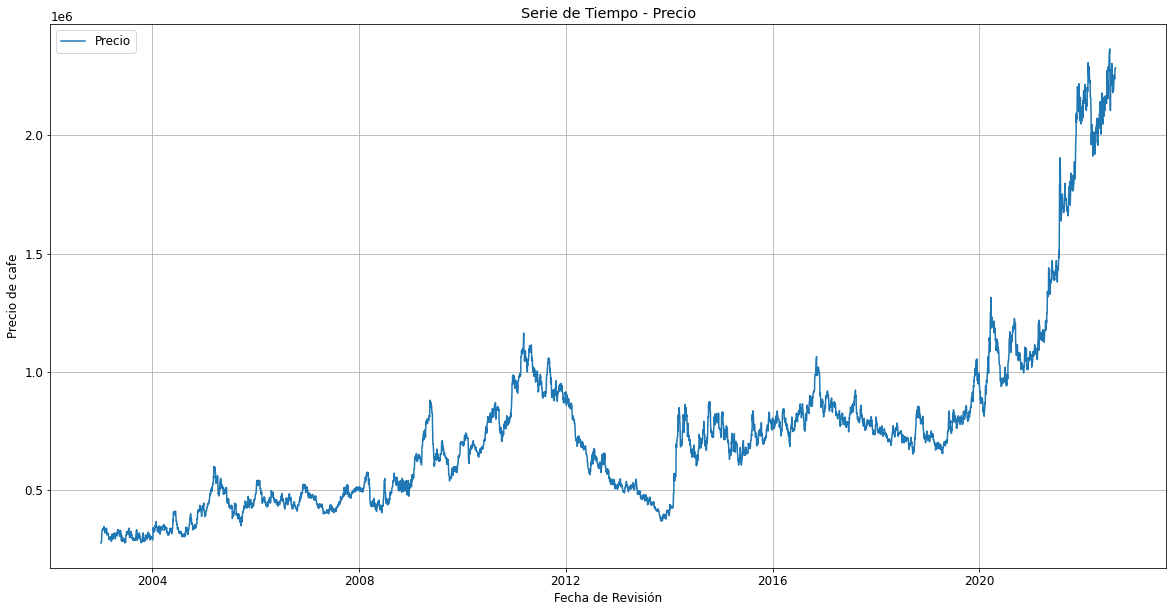

In [ ]:
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(Precio_ts, color = 'tab:blue', label = 'Precio')
ax.set_xlabel('Fecha de Revisión')
ax.set_ylabel('Precio de cafe')
ax.set_title('Serie de Tiempo - Precio')
ax.grid(True)
ax.legend(loc='upper left');

* Gráfico ACF

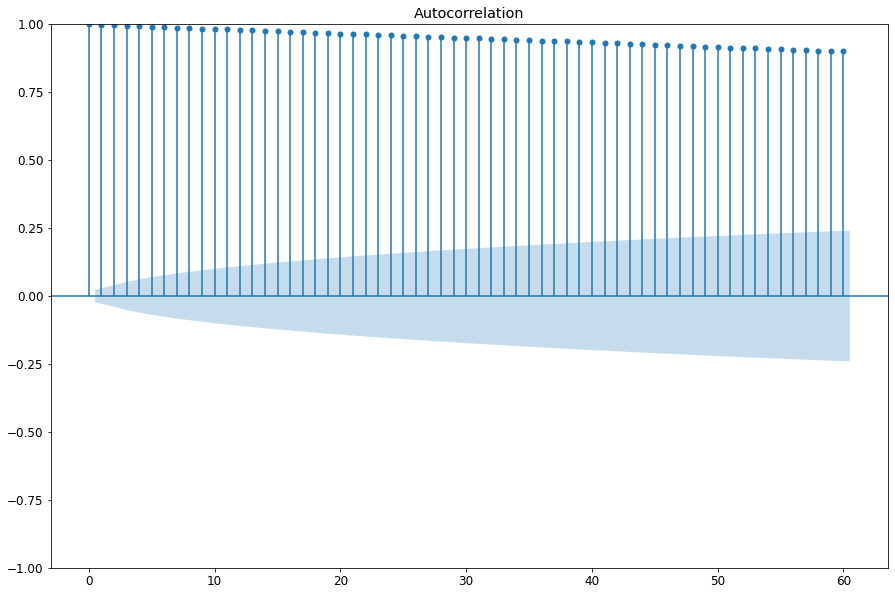

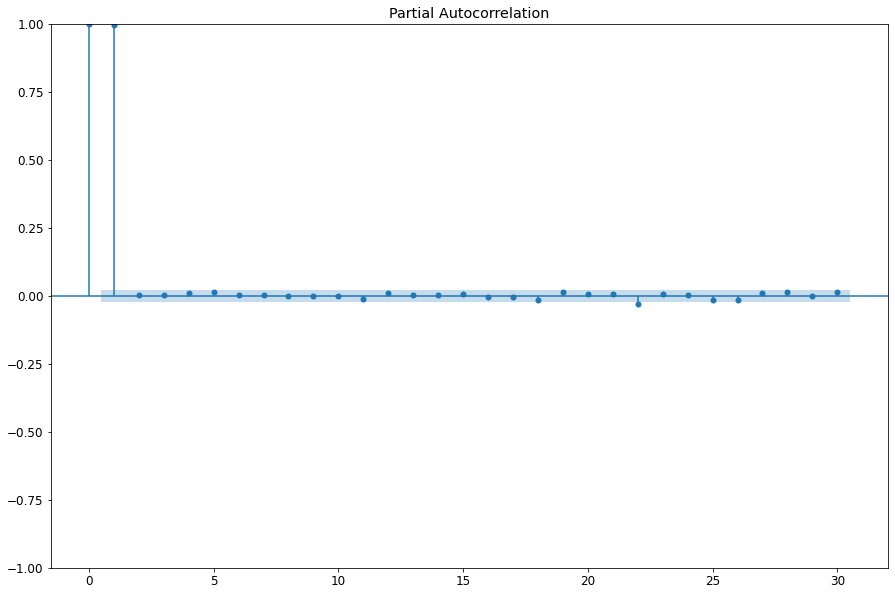

In [ ]:
graph1=plot_acf(Precio,lags=60,adjusted=False)
graph2=plot_pacf(Precio,lags=30,method='ldbiased')

## Grafico de retardos

Gráficos de dispersión para chequear que tipos de relaciones hay entre los retardos de la variable interés.

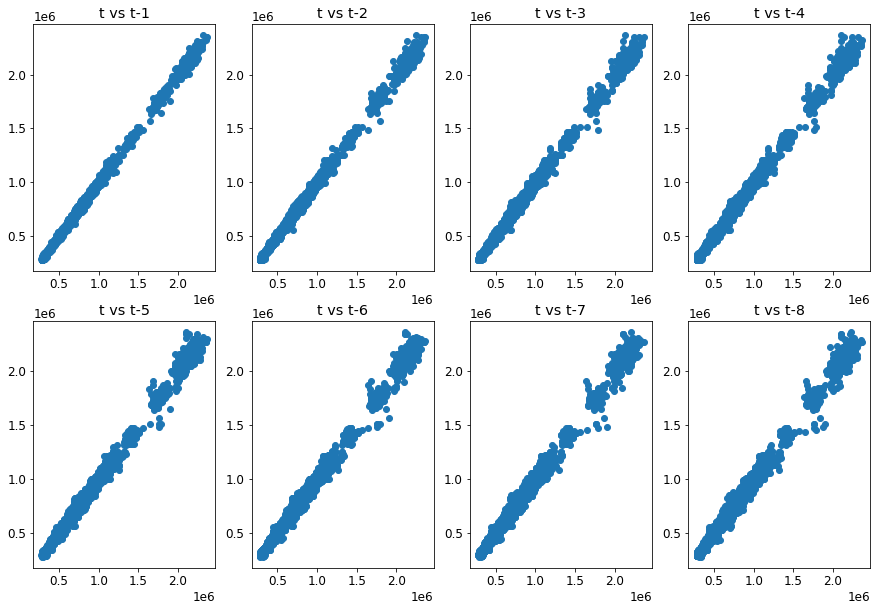

In [ ]:
from pandas.plotting import scatter_matrix
values = pd.DataFrame(Precio_ts.values)
lags = 8
columns = [values]
for i in range(1,(lags + 1)):
	columns.append(values.shift(i))
dataframe = pd.concat(columns, axis=1)
columns = ['t']
for i in range(1,(lags + 1)):
	columns.append('t-' + str(i))
dataframe.columns = columns
plt.figure(1)
for i in range(1,(lags + 1)):
	ax = plt.subplot(240 + i)
	ax.set_title('t vs t-' + str(i))
	plt.scatter(x=dataframe['t'].values, y=dataframe['t-'+str(i)].values)
plt.show()

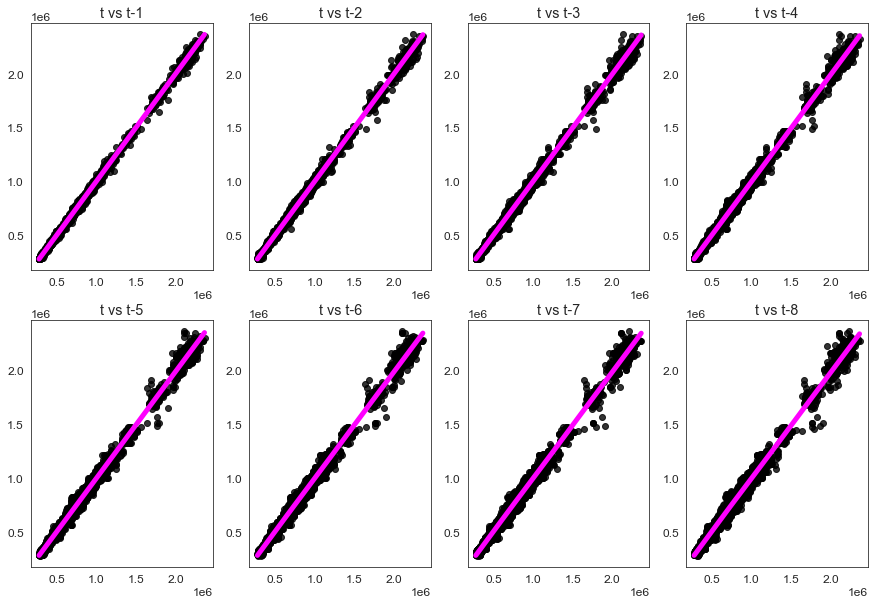

In [ ]:
import seaborn as sns
sns.set_style("white")
from pandas.plotting import scatter_matrix
values = pd.DataFrame(Precio_ts.values)
lags = 8
columns = [values]
for i in range(1,(lags + 1)):
	columns.append(values.shift(i))
dataframe = pd.concat(columns, axis=1)
columns = ['t']
for i in range(1,(lags + 1)):
	columns.append('t-' + str(i))
dataframe.columns = columns
plt.figure(1)
for i in range(1,(lags + 1)):
	ax = plt.subplot(240 + i)
	ax.set_title('t vs t-' + str(i))
	sns.regplot(x=dataframe['t'].values, y=dataframe['t-'+str(i)].values,color="black",lowess=True, 
            line_kws={"color":"magenta", "linewidth":5})
plt.show()

# 3. BOX-COX

La transformación BOX-COX para estabilizar la varianza (marginal) a través de un λ.

In [ ]:
#####Transformación Box-Cox
import scipy as sp
sp.stats.boxcox(Precio['Precio'],alpha=0.05)

(array([2.90324134, 2.903438  , 2.903438  , ..., 2.92461838, 2.92461838,
        2.92461838]),
 -0.33955500197719346,
 (-0.38324789714694246, -0.29609676190177747))

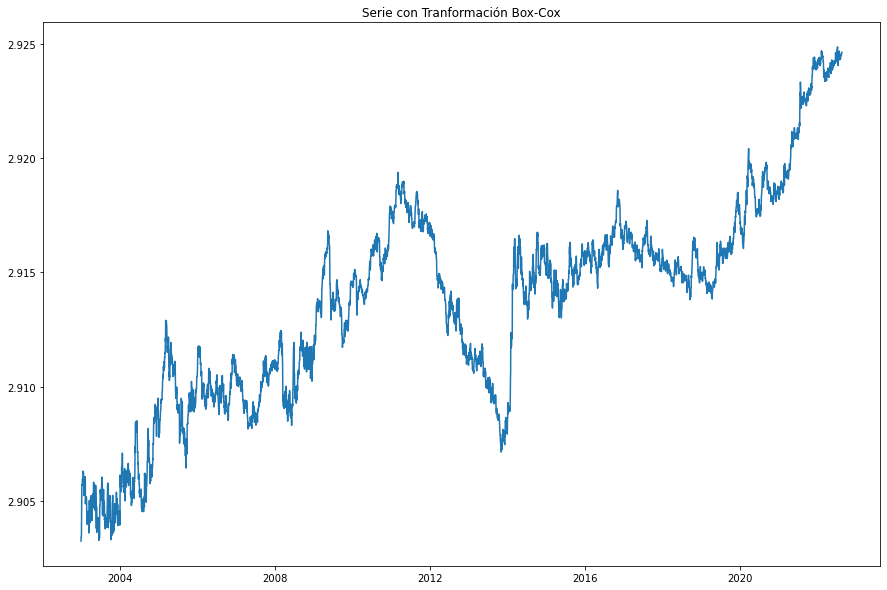

In [ ]:
box=sp.stats.boxcox(Precio['Precio'],lmbda= -0.33955500197719346 )
data = Precio.assign(box=box)  
box_Preciots= data['box'] 

plt.plot(box_Preciots)
plt.title('Serie con Tranformación Box-Cox') 
plt.show() 

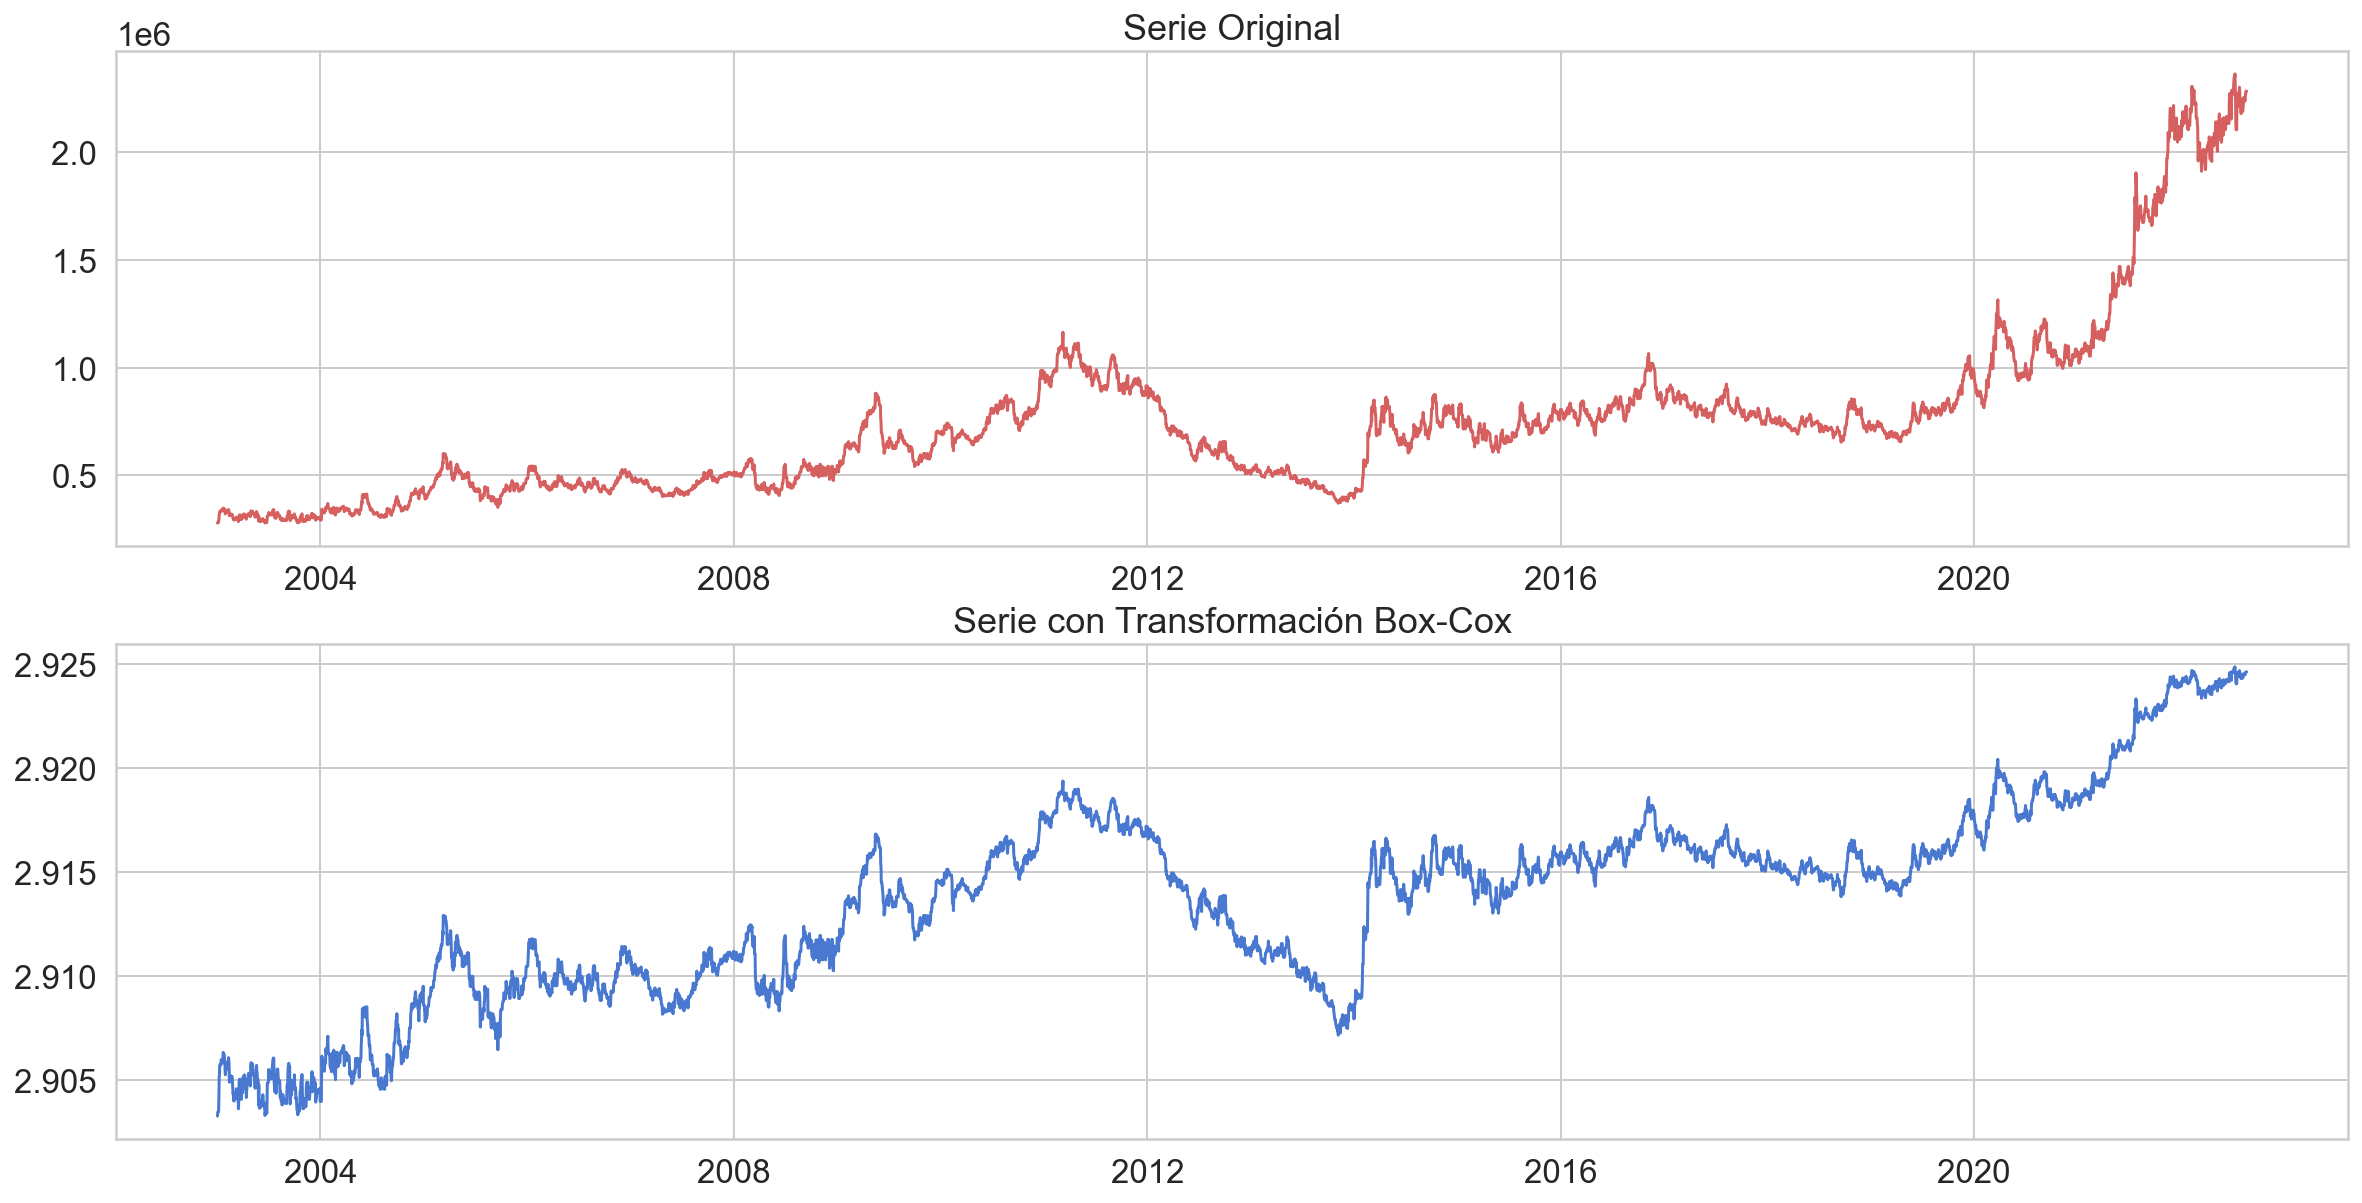

In [ ]:
fig, ax = plt.subplots(2,1,figsize=(20,10)) 
ax[0].plot(Precio_ts,color='r')
ax[0].title.set_text('Serie Original')
ax[1].plot(box_Preciots)
ax[1].title.set_text('Serie con Transformación Box-Cox')
plt.show()

2
0.00027921262041044257


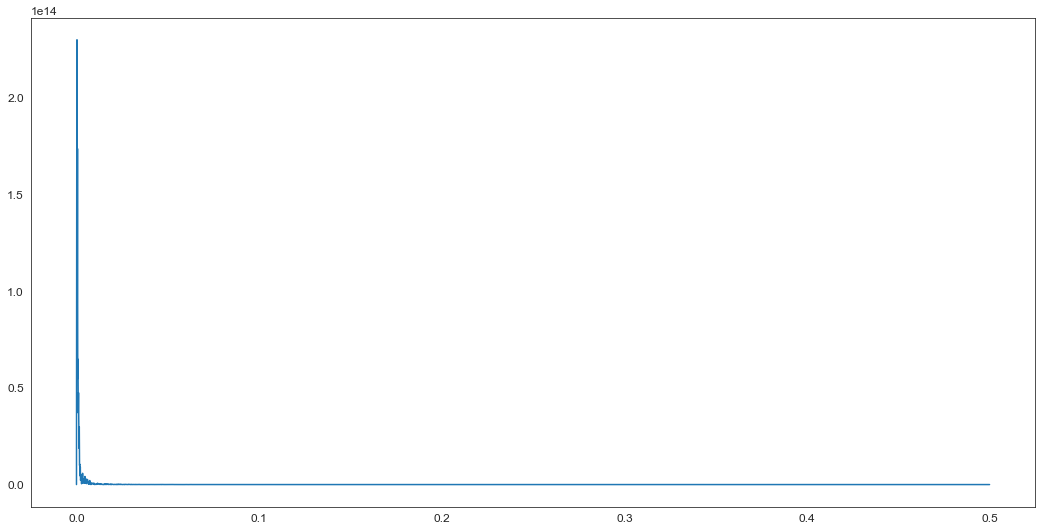

In [ ]:
# Analísis de periodicidad de la serie temporal
f, Pxx_den=sp.signal.periodogram(Precio["Precio"])
plt.figure(figsize=(18, 9))
plt.plot(f, Pxx_den)
#plt.axvline(x=1/6,ls='--',color='red') # Posible ciclo semestral
#plt.axvline(x=1/12,ls='--',color='blue') # Posible ciclo anual
#plt.axvline(x=1/3360,color='blue')
max_index_value = np.argmax(Pxx_den, axis=0)
print(max_index_value)
frecuencia_max=f[max_index_value]
print(frecuencia_max)

No hay componente estacional 

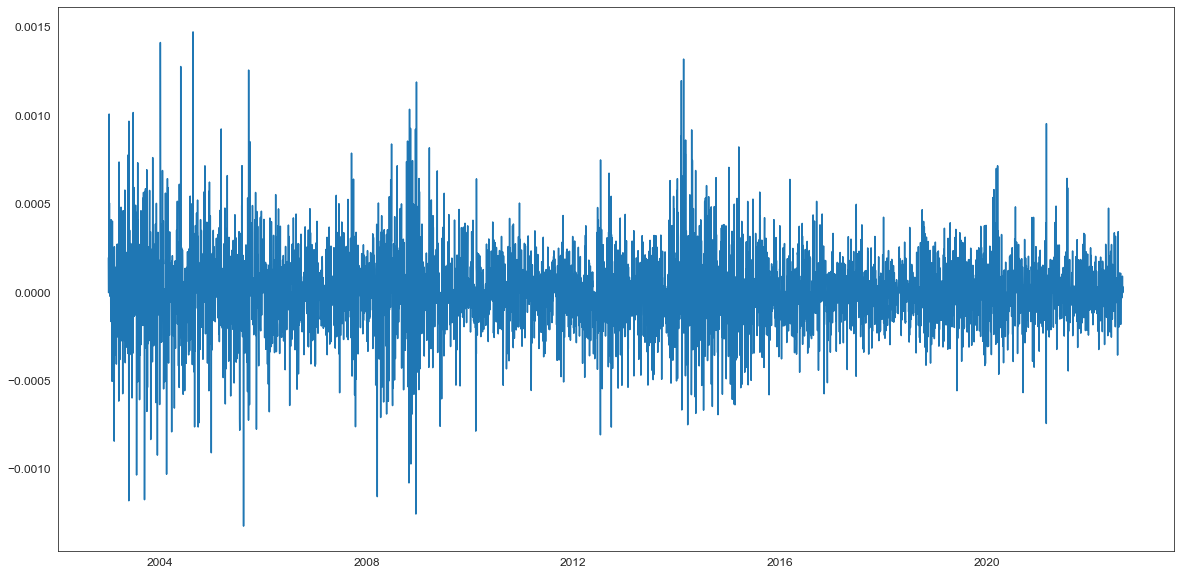

In [ ]:
#box-cox diferenciada
dif_Precio_BX=box_Preciots.diff(periods=1)
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(dif_Precio_BX, '-', label="Serie BOX-COX Diferenciada")



In [ ]:
ind = pd.date_range(start='1/2/2003', end='8/12/2022', freq='D')
Precio_ts11=pd.Series(dif_Precio_BX.values,index=ind)
Precio_ts11=Precio_ts11[1:]
print(Precio_ts11)

2003-01-03    0.000197
2003-01-04    0.000000
2003-01-05    0.000000
2003-01-06    0.000031
2003-01-07    0.000650
                ...   
2022-08-08    0.000092
2022-08-09    0.000003
2022-08-10    0.000033
2022-08-11    0.000000
2022-08-12    0.000000
Freq: D, Length: 7162, dtype: float64


comentar

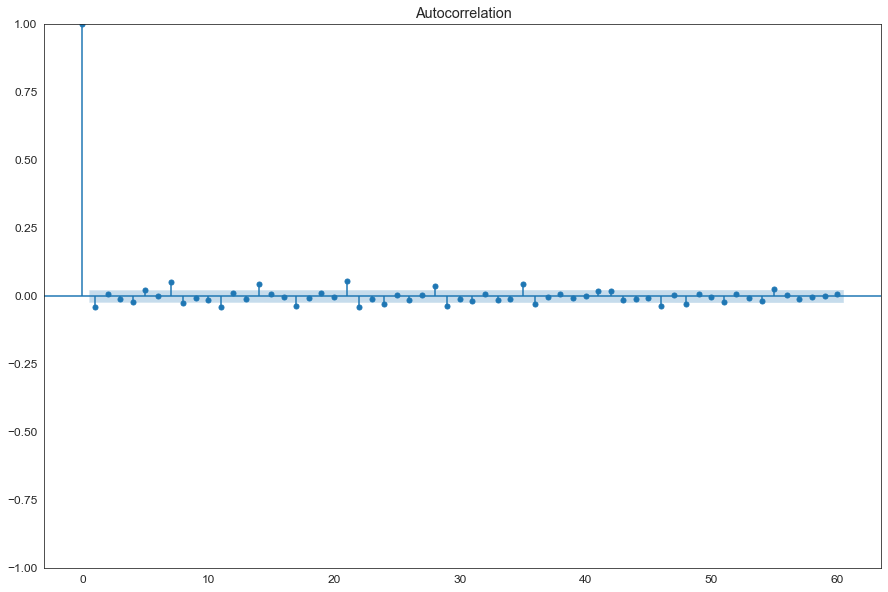

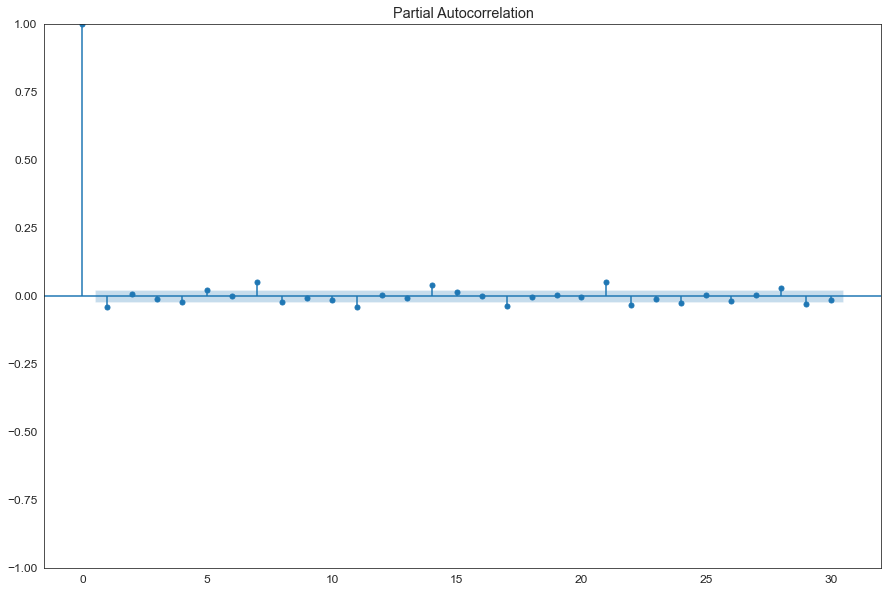

In [ ]:
#a=plot_acf(Precio_ts,adjusted=False,lags=200,title='ACF Serie Produccion Orginal') #-Original
#b=plot_acf(dif_Precio_BX.dropna(),adjusted=False,lags=200,title='ACF Serie Produccion Box-Cox Diferenciada') #-BOC-COX Diferenciada

graph3=plot_acf(Precio_ts11,lags=60,adjusted=False)
graph4=plot_pacf(Precio_ts11,lags=30,method='ldbiased')

# 4.MODELOS

## Tendencia lineal


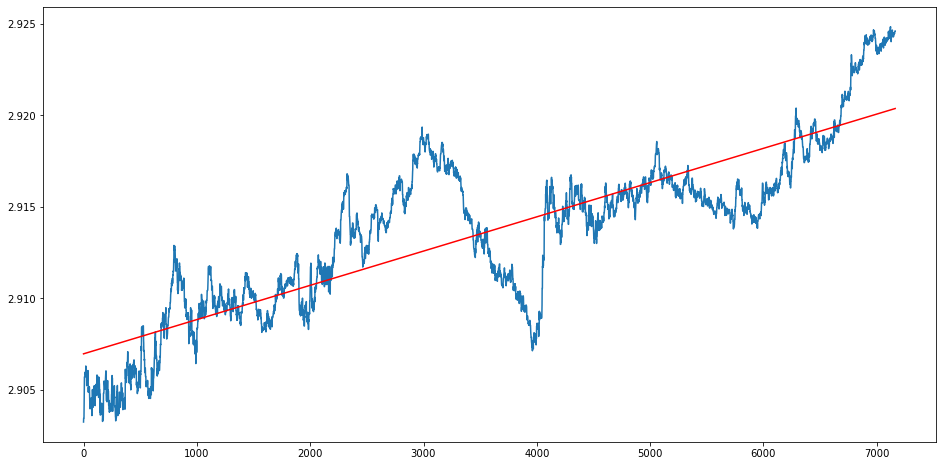

El coeficiente para el modelo planteado es de [0.00068347].
El intercepto del modelo planteado es 1.537974032309777.


In [ ]:
from sklearn.linear_model import LinearRegression
X1=np.arange(2003+1/365,2022+228/365,1/365) # Donde comienza la serie, donde termina y la frecuencia que tiene
X=X1
X = np.reshape(X, (len(X), 1))
y = box_Preciots.values
model = LinearRegression()
model.fit(X, y)
trend = model.predict(X)
plt.figure(figsize=(16,8))
plt.plot(y)
plt.plot(trend, color='red')
plt.show()
print('El coeficiente para el modelo planteado es de {}.'.format(model.coef_))
print('El intercepto del modelo planteado es {}.'.format(model.intercept_))

In [ ]:
# Realizamos un modelo para revisar 
X = sm.add_constant(X)
linmodel = sm.OLS(y, X)
results = linmodel.fit()
print(results.summary())
ypred = results.predict(X)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                 1.742e+04
Date:                Tue, 29 Nov 2022   Prob (F-statistic):               0.00
Time:                        01:00:09   Log-Likelihood:                 32803.
No. Observations:                7163   AIC:                        -6.560e+04
Df Residuals:                    7161   BIC:                        -6.559e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5380      0.010    147.545      0.0

Estimación significativa.

Fecha
2003-01-02   -0.003729
2003-01-03   -0.003534
2003-01-04   -0.003536
2003-01-05   -0.003538
2003-01-06   -0.003508
                ...   
2022-08-17    0.004208
2022-08-18    0.004210
2022-08-19    0.004241
2022-08-20    0.004239
2022-08-21    0.004237
Length: 7163, dtype: float64
<class 'pandas.core.series.Series'>


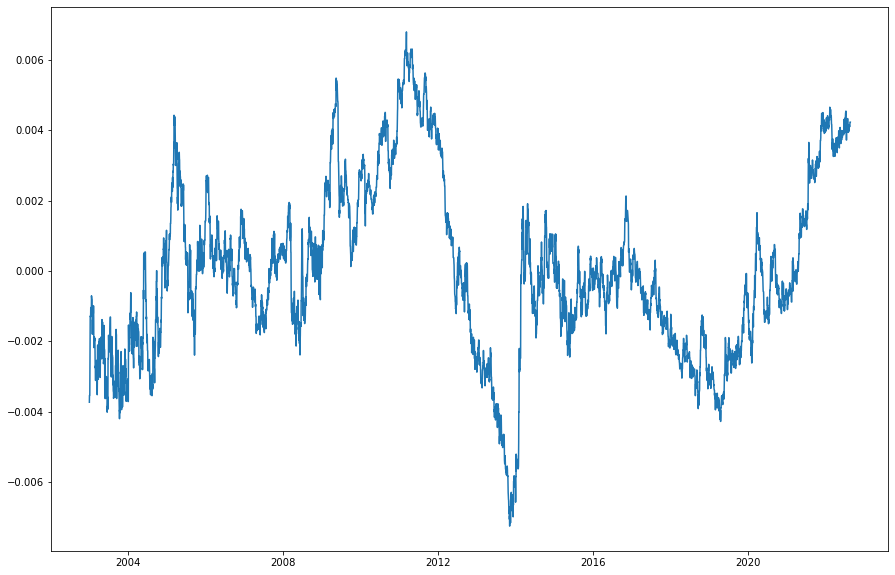

In [ ]:
# Gráfico de la serie con la tendencia eliminada
# Gráfica detrend
detrended = [y[i]-trend[i] for i in range(0, len(box_Preciots))]
Precio_detrend = pd.Series(detrended, index = box_Preciots.index)
print(Precio_detrend)
print(type(Precio_detrend))
# plot detrended
plt.plot(Precio_detrend)
plt.show()

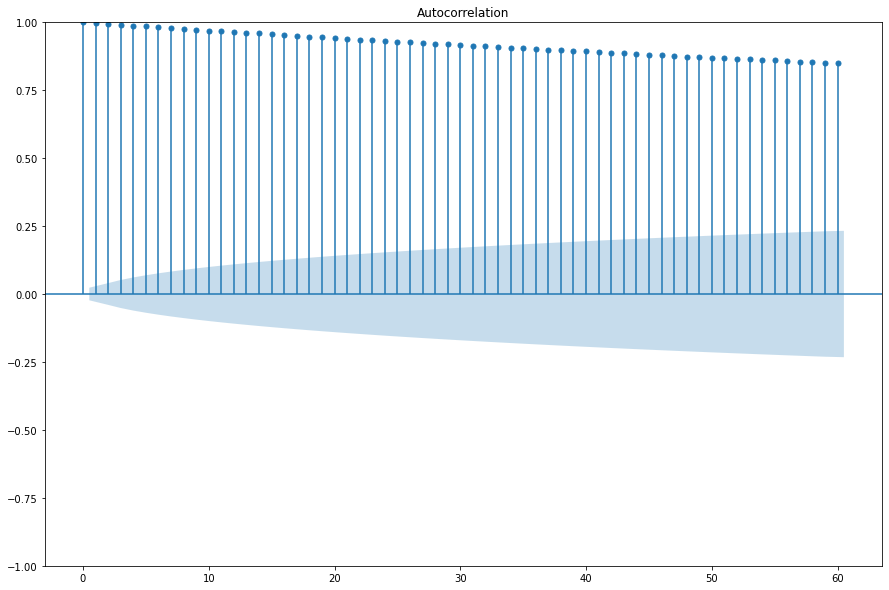

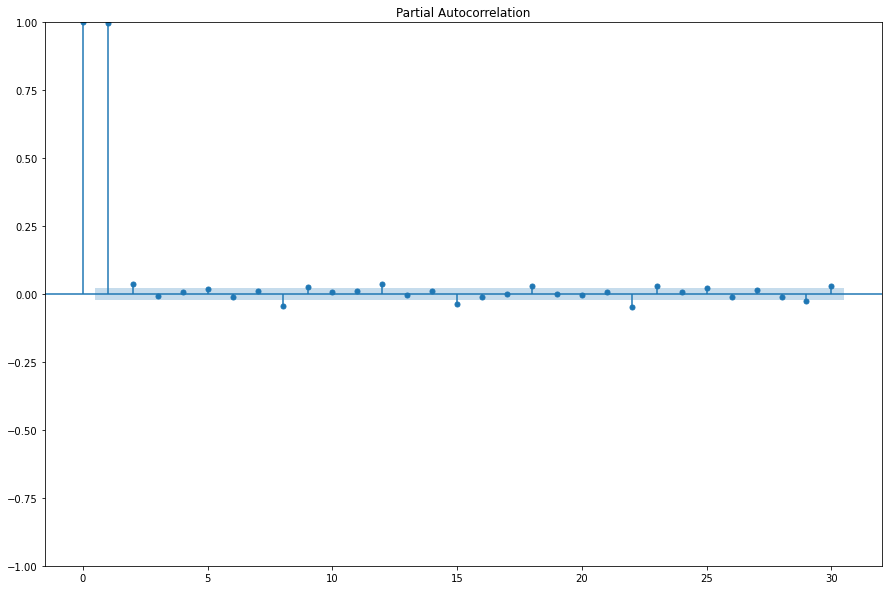

In [ ]:
graph3=plot_acf(Precio_detrend,lags=60,adjusted=False)
graph4=plot_pacf(Precio_detrend,lags=30,method='ldbiased')

## - Suavizamiento Exponencial -

In [ ]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt  # Importación para suavizamiento exponencial

X = box_Preciots.values
size = int(len(X) * 0.8)
train, test = X[1:size], X[size:len(X)]
modelo = ExponentialSmoothing(train,seasonal_periods = None, trend = 'add', initialization_method = "estimated", use_boxcox=False).fit() 
modelo.params_formatted

name     param  optimized
smoothing_level  alpha  0.947856       True
smoothing_trend   beta  0.023065       True
initial_level      l.0  2.903401       True
initial_trend      b.0  0.000039       True

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
## Rolling

X = box_Preciots.values
size = int(len(X) * 0.8)
train, test = X[1:size], X[size:len(X)]
history = [x for x in train]
predicciones = list()
for t in range(len(test)):
	modelo = ExponentialSmoothing(history,seasonal_periods = None, trend = 'add', initialization_method = "estimated", use_boxcox=False).fit(smoothing_level=0.947856,smoothing_trend=0.025654)  
	output = modelo.forecast()
	yhat = output[0]
	predicciones.append(yhat)
	obs = test[t]
	history.append(obs)
	#print('Predicción=%f, Esperado=%f' % (yhat, obs))
error = mean_squared_error(test, predicciones)
print('ECM: %f' % error)

ECM: 0.000000


In [ ]:
#Error cuadratico medio 
print(error)

2.1016516741000877e-08


In [ ]:
train=sp.special.inv_boxcox(np.array(train[0:]),-0.339555001977193460)
test=sp.special.inv_boxcox(np.array(test[0:]),-0.339555001977193460)
predicciones=sp.special.inv_boxcox(np.array(predicciones[0:]),-0.339555001977193460)

In [ ]:
#Error cuadratico medio escala original
error = mean_squared_error(test, predicciones)
print(error)
import statistics as stats
stats.mean((test - predicciones)**2)

524669305.7962678


524669305.79626775

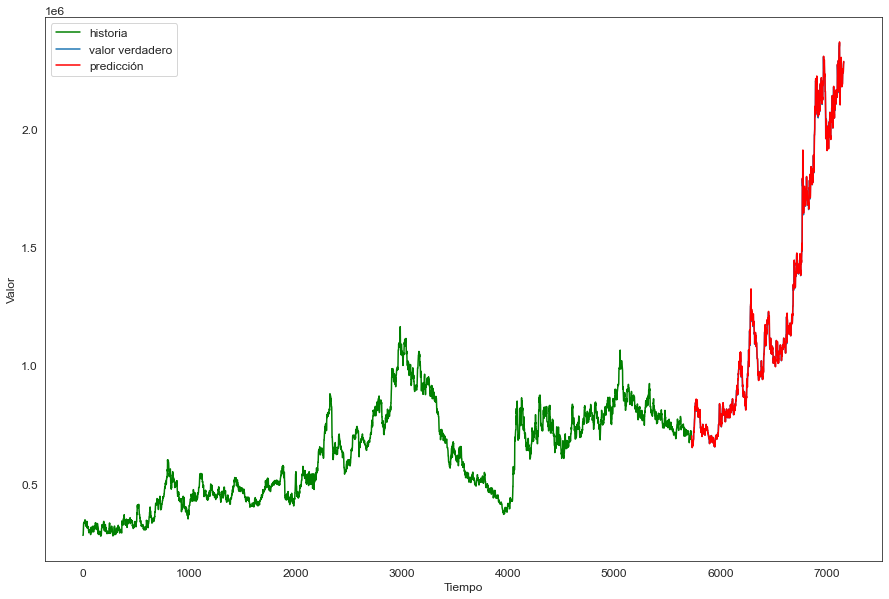

In [ ]:
plt.plot(np.arange(0, len(train)), train, 'g', label="historia")
plt.plot(np.arange(len(train), len(train) + len(test)), test, label="valor verdadero")
plt.plot(np.arange(len(train), len(train) + len(test)), predicciones, 'r', label="predicción")
plt.ylabel('Valor')
plt.xlabel('Tiempo')
plt.legend()
plt.show();

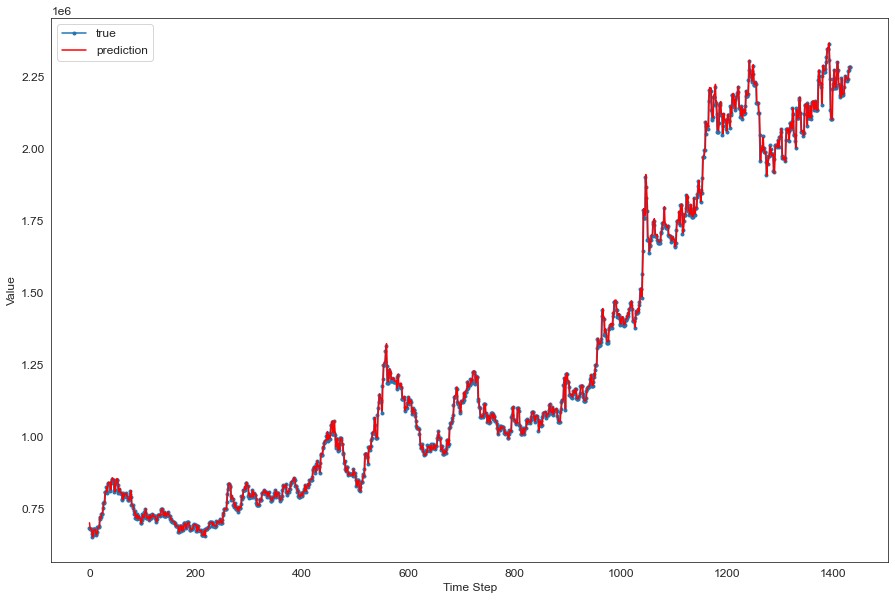

In [ ]:
plt.plot(test, marker='.', label="true")
plt.plot(predicciones, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

## - Arboles de decisión -

In [ ]:
import scipy as sp
import sklearn

In [ ]:
Precio_detrend

Fecha
2003-01-02   -0.003729
2003-01-03   -0.003534
2003-01-04   -0.003536
2003-01-05   -0.003538
2003-01-06   -0.003508
                ...   
2022-08-17    0.004208
2022-08-18    0.004210
2022-08-19    0.004241
2022-08-20    0.004239
2022-08-21    0.004237
Length: 7163, dtype: float64

### Creación de variables rezagadas

In [ ]:
from pandas import DataFrame
# Se crea un nuevo dataframe
df1 = DataFrame()
print(df1)

Empty DataFrame
Columns: []
Index: []


In [ ]:
#2003-01-02
#2022-08-21
ind = pd.date_range(start='1/2/2003', end='8/12/2022', freq='D')
Pre_df = pd.DataFrame(Precio_detrend.values, index = ind)
print(type(Pre_df))
print(Pre_df)

<class 'pandas.core.frame.DataFrame'>
                   0
2003-01-02 -0.003729
2003-01-03 -0.003534
2003-01-04 -0.003536
2003-01-05 -0.003538
2003-01-06 -0.003508
...              ...
2022-08-08  0.004208
2022-08-09  0.004210
2022-08-10  0.004241
2022-08-11  0.004239
2022-08-12  0.004237

[7163 rows x 1 columns]


In [ ]:
for i in range(100,0,-1):
    df1[['t-'+str(i)]] = Pre_df.shift(i)

In [ ]:
print(df1)

               t-100      t-99      t-98      t-97      t-96      t-95  \
2003-01-02       NaN       NaN       NaN       NaN       NaN       NaN   
2003-01-03       NaN       NaN       NaN       NaN       NaN       NaN   
2003-01-04       NaN       NaN       NaN       NaN       NaN       NaN   
2003-01-05       NaN       NaN       NaN       NaN       NaN       NaN   
2003-01-06       NaN       NaN       NaN       NaN       NaN       NaN   
...              ...       ...       ...       ...       ...       ...   
2022-08-08  0.003595  0.003504  0.003979  0.003894  0.003855  0.003853   
2022-08-09  0.003504  0.003979  0.003894  0.003855  0.003853  0.003851   
2022-08-10  0.003979  0.003894  0.003855  0.003853  0.003851  0.004058   
2022-08-11  0.003894  0.003855  0.003853  0.003851  0.004058  0.004085   
2022-08-12  0.003855  0.003853  0.003851  0.004058  0.004085  0.003906   

                t-94      t-93      t-92      t-91  ...      t-10       t-9  \
2003-01-02       NaN       NaN  

In [ ]:
df1['t'] = Pre_df.values

C:\Users\SEBASTIAN\AppData\Local\Temp\ipykernel_6592\3592327620.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1['t'] = Pre_df.values


In [ ]:
df1_Precio = df1[100:]
print(df1_Precio)
print(Pre_df)
Pre_df.size

               t-100      t-99      t-98      t-97      t-96      t-95  \
2003-04-12 -0.003729 -0.003534 -0.003536 -0.003538 -0.003508 -0.002860   
2003-04-13 -0.003534 -0.003536 -0.003538 -0.003508 -0.002860 -0.001853   
2003-04-14 -0.003536 -0.003538 -0.003508 -0.002860 -0.001853 -0.001780   
2003-04-15 -0.003538 -0.003508 -0.002860 -0.001853 -0.001780 -0.001276   
2003-04-16 -0.003508 -0.002860 -0.001853 -0.001780 -0.001276 -0.001278   
...              ...       ...       ...       ...       ...       ...   
2022-08-08  0.003595  0.003504  0.003979  0.003894  0.003855  0.003853   
2022-08-09  0.003504  0.003979  0.003894  0.003855  0.003853  0.003851   
2022-08-10  0.003979  0.003894  0.003855  0.003853  0.003851  0.004058   
2022-08-11  0.003894  0.003855  0.003853  0.003851  0.004058  0.004085   
2022-08-12  0.003855  0.003853  0.003851  0.004058  0.004085  0.003906   

                t-94      t-93      t-92      t-91  ...       t-9       t-8  \
2003-04-12 -0.001853 -0.001780 -

7163

### División de los datos 

In [ ]:
# Split data
Preciosplit = df1_Precio.values
# split into lagged variables and original time series
X1= Preciosplit[:, 0:-1]  # slice all rows and start with column 0 and go up to but not including the last column
y1 =Preciosplit[:,-1]  # slice all rows and last column, essentially separating out 't' column

In [ ]:
print(X1[0])
print(y1[0])

[-0.0037286  -0.00353381 -0.00353568 -0.00353756 -0.00350805 -0.00285997
 -0.00185299 -0.00178043 -0.00127613 -0.001278   -0.00127988 -0.00130192
 -0.00126852 -0.0010368  -0.00104358 -0.00103563 -0.00103751 -0.00103938
 -0.00120461 -0.0011121  -0.00070242 -0.00073279 -0.00080626 -0.00080813
 -0.00081    -0.00119279 -0.00112026 -0.00162376 -0.0017933  -0.00139129
 -0.00139316 -0.00139504 -0.00121088 -0.00127772 -0.00152834 -0.00138225
 -0.00119846 -0.00120034 -0.00120221 -0.00098773 -0.00112673 -0.00133289
 -0.00217437 -0.00191694 -0.00191881 -0.00192069 -0.00201364 -0.00187124
 -0.00199051 -0.00190687 -0.00191406 -0.00191593 -0.00191781 -0.00222237
 -0.00257586 -0.00274951 -0.00269955 -0.00310562 -0.00310749 -0.00310936
 -0.00284003 -0.00304167 -0.00304354 -0.00299806 -0.00272603 -0.0027279
 -0.00272977 -0.00253794 -0.00279119 -0.00299749 -0.00299937 -0.0028956
 -0.00289747 -0.00289934 -0.00351453 -0.00322329 -0.00248728 -0.00212565
 -0.00210051 -0.00210238 -0.00210425 -0.00238512 -0.0

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
#Entrenamiento, validacion y prueba
X_trainF, X_test, y_trainF, y_test = train_test_split(X1,y1,test_size=0.2, train_size=0.8, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_trainF,y_trainF, test_size = 0.225, train_size = 0.775, shuffle=False)

In [ ]:
# Decision Tree Regresion Model
from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regression model with default arguments
decision_tree_Precio = DecisionTreeRegressor()  # max-depth not set
# The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
# Fit the model to the training features(covariables) and targets(respuestas)
decision_tree_Precio.fit(X_train, y_train)

# Check the score on train and test
print("Coeficiente R2 sobre el conjunto de entrenamiento:",decision_tree_Precio.score(X_train, y_train))
print("Coeficiente R2 sobre el conjunto de Validación:",decision_tree_Precio.score(X_val,y_val))  # predictions are horrible if negative value, no relationship if 0

print("el RECM es:",(((decision_tree_Precio.predict(X_val)-y_val)**2).sum())**0.5)

Coeficiente R2 sobre el conjunto de entrenamiento: 0.999999999999969
Coeficiente R2 sobre el conjunto de Validación: 0.9419562263382181
el RECM es: 0.00953255577744516


In [ ]:
for d in [2, 3, 4, 5,6,7,8,9,10]:
    # Create the tree and fit it
    decision_tree_Precio = DecisionTreeRegressor(max_depth=d)
    decision_tree_Precio.fit(X_train, y_train)

    # Print out the scores on train and test
    print('max_depth=', str(d))
    print("Coeficiente R2 sobre el conjunto de entrenamiento:",decision_tree_Precio.score(X_train, y_train))
    print("Coeficiente R2 sobre el conjunto de Validación:",decision_tree_Precio.score(X_val, y_val), '\n')  # You want the test score to be positive and high
    print("el RECM sobre el conjunto de prueba es:",sklearn.metrics.mean_squared_error(decision_tree_Precio.predict(X_val),y_val, squared=False))

max_depth= 2
Coeficiente R2 sobre el conjunto de entrenamiento: 0.8781786727449288
Coeficiente R2 sobre el conjunto de Validación: 0.5186103490799938 

el RECM sobre el conjunto de prueba es: 0.0007697263503892505
max_depth= 3
Coeficiente R2 sobre el conjunto de entrenamiento: 0.9673236823663243
Coeficiente R2 sobre el conjunto de Validación: 0.8444571365169135 

el RECM sobre el conjunto de prueba es: 0.0004375352265919661
max_depth= 4
Coeficiente R2 sobre el conjunto de entrenamiento: 0.9870762727934521
Coeficiente R2 sobre el conjunto de Validación: 0.9437786273931068 

el RECM sobre el conjunto de prueba es: 0.0002630502395947271
max_depth= 5
Coeficiente R2 sobre el conjunto de entrenamiento: 0.992558988378979
Coeficiente R2 sobre el conjunto de Validación: 0.9730618034023469 

el RECM sobre el conjunto de prueba es: 0.00018208419001353716
max_depth= 6
Coeficiente R2 sobre el conjunto de entrenamiento: 0.9939412120109838
Coeficiente R2 sobre el conjunto de Validación: 0.97959162373

max_depth=6 vemos una mejoría en el valor de ambos coeficientes sin embargo cuando llegamos a max_depth=7 el coeficiente para los datos de prueba vuelven a disminuir, al igual que el RECM va en aumento hasta el max_depth=6, por tanto lo más optimos sería quedarse con max_depth=6

### Usando la Penalización

In [ ]:
path=decision_tree_Precio.cost_complexity_pruning_path(X_train, y_train)
alphas=path['ccp_alphas']
#print(alphas)
print(alphas.min())
print(alphas.max())
div=25

0.0
4.275551109177385e-06


In [ ]:
accuracy_train,accuracy_test=[],[]
for i in alphas:
    tree=DecisionTreeRegressor(ccp_alpha=i)

    tree.fit(X_train, y_train)
    y_train_pred=tree.predict(X_train)
    y_test_pred=tree.predict(X_val)


    accuracy_train.append(sklearn.metrics.mean_squared_error(y_train_pred, y_train, squared=False))
    accuracy_test.append(sklearn.metrics.mean_squared_error(y_test_pred, y_val,squared=False))

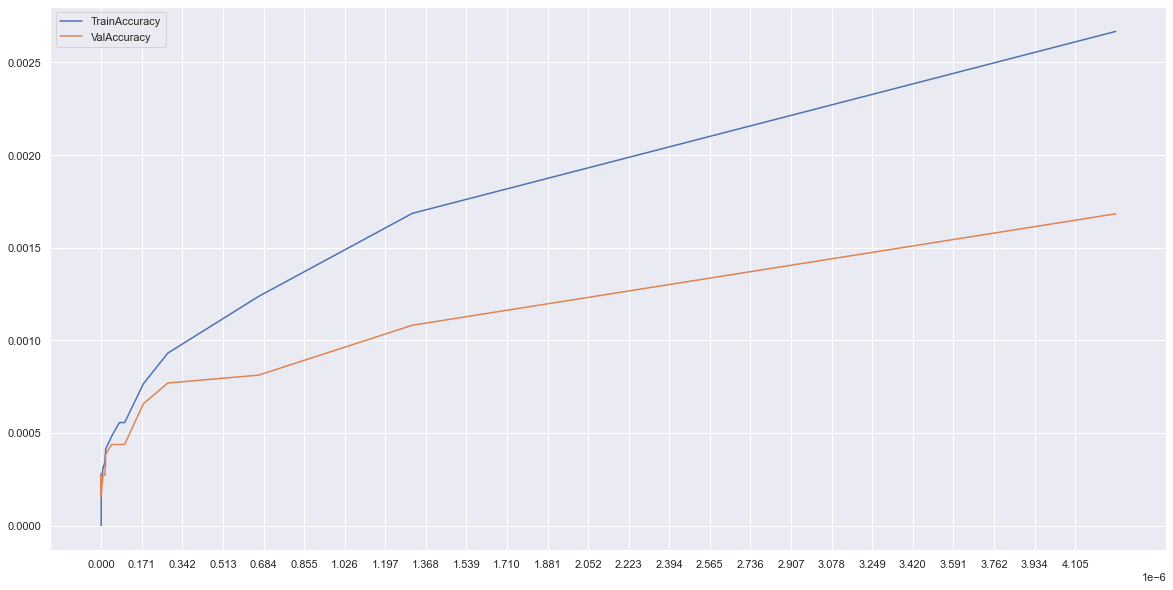

In [ ]:
import seaborn as sns
sns.set()
rcParams['figure.figsize'] = 30,10
plt.figure(figsize=(20,10))

sns.lineplot(y=accuracy_train,x=alphas,label="TrainAccuracy")

sns.lineplot(y=accuracy_test,x=alphas,label="ValAccuracy")

plt.xticks(ticks=np.arange(0.00,alphas.max(),(alphas.max()-alphas.min())/div
))
plt.show()

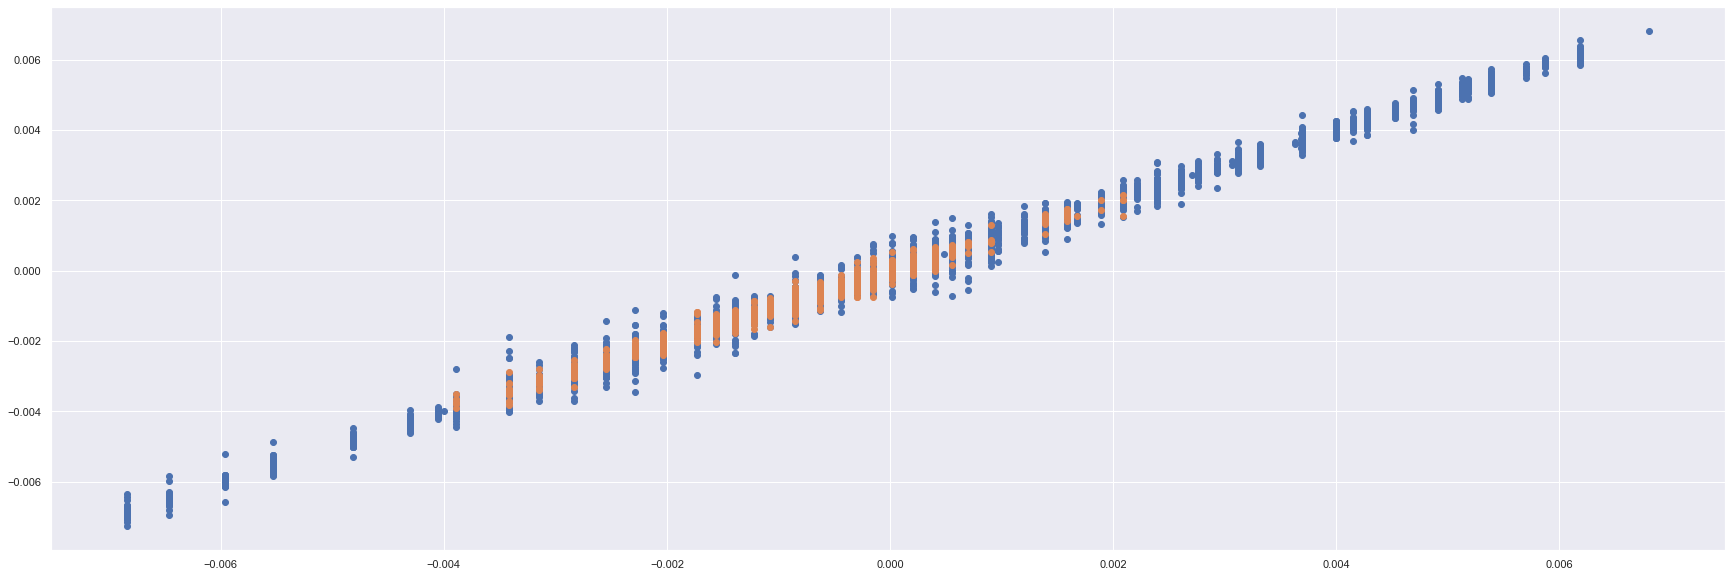

Raíz de la Pérdida cuadrática Entrenamiento: 0.00020920514412173726
Raíz de la Pérdida cuadrática Validacion: 0.00014815940095288808


In [ ]:
####entrenamiento y validacion y_trainF.size
# Plot predicted against actual values

from matplotlib import pyplot as plt

# Use the best max_depth 
decision_tree_Precio = DecisionTreeRegressor(max_depth=6)  # fill in best max depth here
decision_tree_Precio.fit(X_trainF, y_trainF)

# Predict values for train and test
train_prediction = decision_tree_Precio.predict(X_train)
test_prediction = decision_tree_Precio.predict(X_val)

# Scatter the predictions vs actual values
plt.scatter(train_prediction, y_train, label='train')  # blue
plt.scatter(test_prediction, y_val, label='test')  # orange
plt.show()

#print("Raíz de la Pérdida cuadrática Entrenamiento:",sklearn.metrics.mean_squared_error( y_train_pred, y_train,squared=False))
#print("Raíz de la Pérdida cuadrática Validacion:",sklearn.metrics.mean_squared_error(y_test_pred, y_val,squared=False))

print("Raíz de la Pérdida cuadrática Entrenamiento:",sklearn.metrics.mean_squared_error( train_prediction, y_train,squared=False))
print("Raíz de la Pérdida cuadrática Validacion:",sklearn.metrics.mean_squared_error(test_prediction, y_val,squared=False))

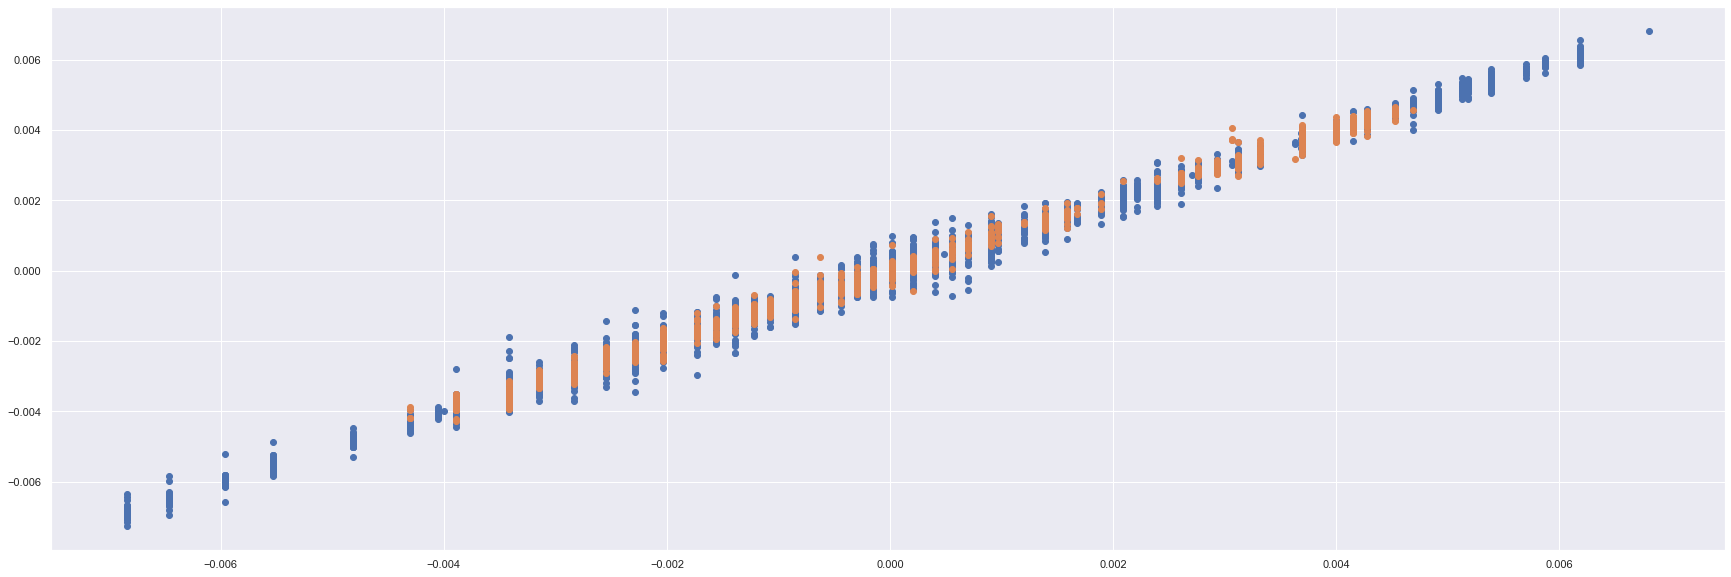

In [ ]:
# Plot predicted against actual values

from matplotlib import pyplot as plt

# Use the best max_depth 
decision_tree_Precio_prun_mincost = DecisionTreeRegressor(ccp_alpha=0.162)  # fill in best max depth here
decision_tree_Precio_prun_mincost.fit(X_trainF, y_trainF)

# Predict values for train and test
train_prediction_prun_mincost = decision_tree_Precio.predict(X_trainF)
test_prediction_prun_mincost = decision_tree_Precio.predict(X_test)

# Scatter the predictions vs actual values
plt.scatter(train_prediction_prun_mincost, y_trainF, label='train')  # blue
plt.scatter(test_prediction_prun_mincost, y_test, label='test')  # orange
plt.show()

In [ ]:
from sklearn import tree

listacaract=list(df1_Precio.columns.values)
respuesta=listacaract.pop()
text_representation = tree.export_text(decision_tree_Precio)
print(text_representation)

|--- feature_99 <= 0.00
|   |--- feature_99 <= -0.00
|   |   |--- feature_99 <= -0.00
|   |   |   |--- feature_99 <= -0.01
|   |   |   |   |--- feature_99 <= -0.01
|   |   |   |   |   |--- feature_99 <= -0.01
|   |   |   |   |   |   |--- value: [-0.01]
|   |   |   |   |   |--- feature_99 >  -0.01
|   |   |   |   |   |   |--- value: [-0.01]
|   |   |   |   |--- feature_99 >  -0.01
|   |   |   |   |   |--- feature_99 <= -0.01
|   |   |   |   |   |   |--- value: [-0.01]
|   |   |   |   |   |--- feature_99 >  -0.01
|   |   |   |   |   |   |--- value: [-0.01]
|   |   |   |--- feature_99 >  -0.01
|   |   |   |   |--- feature_99 <= -0.00
|   |   |   |   |   |--- feature_2 <= -0.01
|   |   |   |   |   |   |--- value: [-0.00]
|   |   |   |   |   |--- feature_2 >  -0.01
|   |   |   |   |   |   |--- value: [-0.00]
|   |   |   |   |--- feature_99 >  -0.00
|   |   |   |   |   |--- feature_51 <= -0.00
|   |   |   |   |   |   |--- value: [-0.00]
|   |   |   |   |   |--- feature_51 >  -0.00
|   |   | 

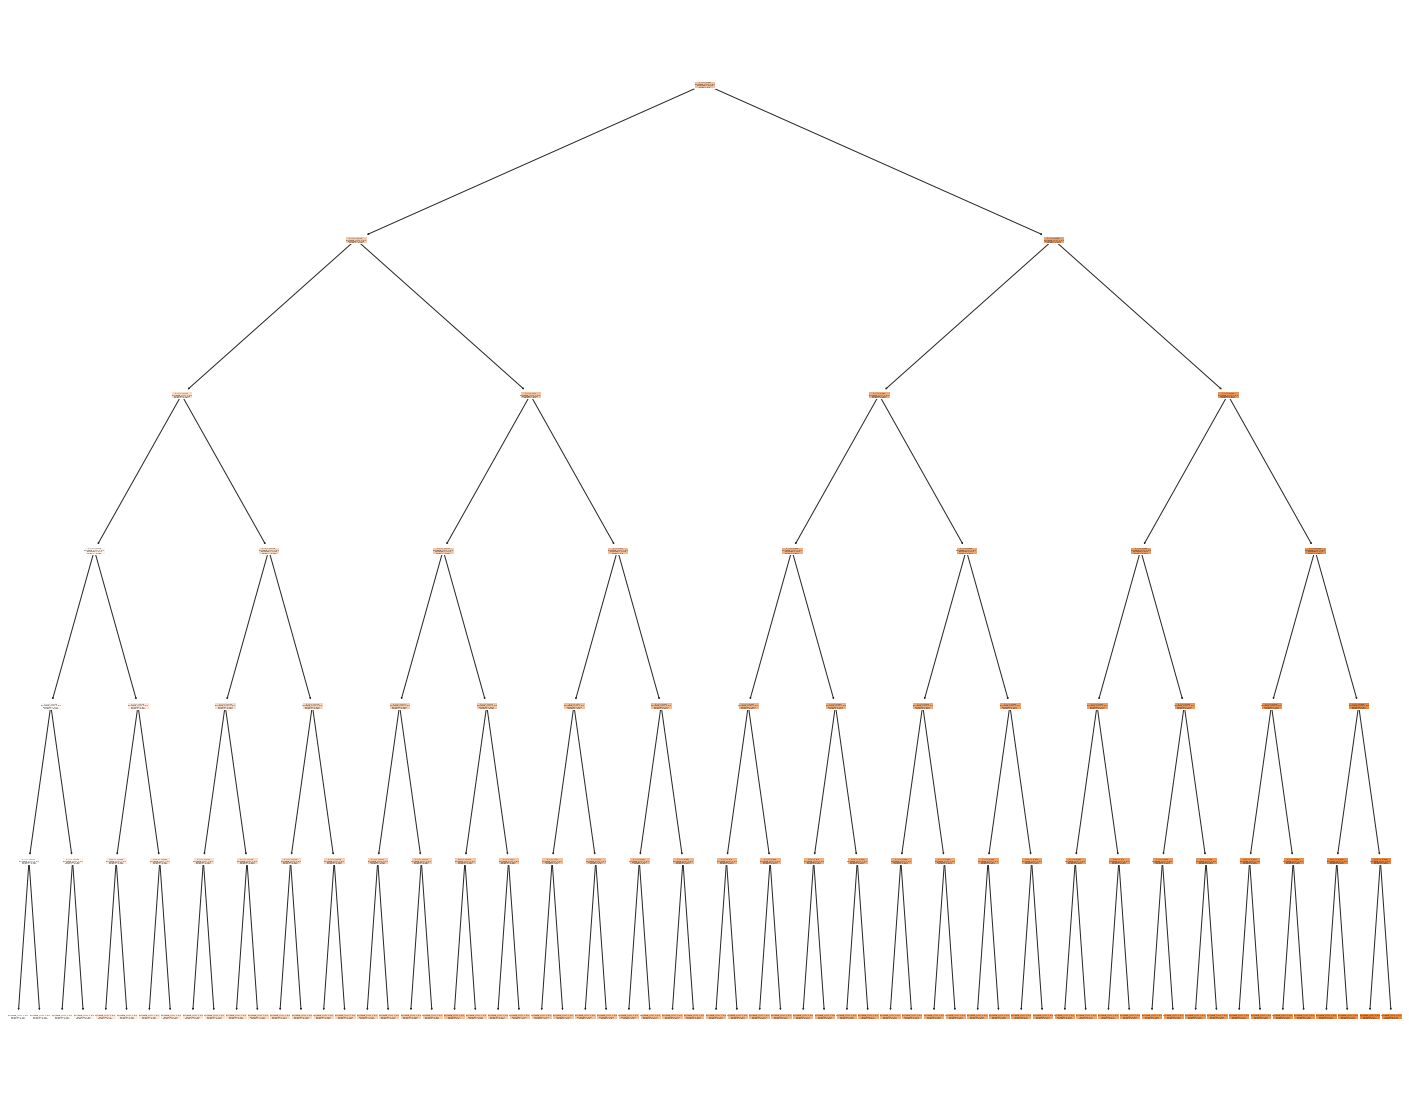

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(decision_tree_Precio, 
                   feature_names=listacaract,  
                   class_names=respuesta,
                   filled=True)
#el rezago mas importante es el 9

In [ ]:
print(train_prediction_prun_mincost.size)
print(X_train.size)

print(test_prediction_prun_mincost.size)
print(y_test.size)

5650
437800
1413
1413


In [ ]:
indicetrian_test=df1_Precio.index
print(indicetrian_test.size)  ###Tamaño del índice
indicetrain=indicetrian_test[0:5650]
indicetest=indicetrian_test[5650:7063]

7063


In [ ]:
print(indicetrain.size)
print(indicetest.size)

5650
1413


In [ ]:
targetjoint=np.concatenate((y_trainF,y_test))
predictionjoint=np.concatenate((train_prediction_prun_mincost,test_prediction_prun_mincost))
print(targetjoint.size)
print(predictionjoint.size)

7063
7063


In [ ]:
d = {'observado': targetjoint, 'Predicción': predictionjoint}
ObsvsPred=pd.DataFrame(data=d,index=indicetrian_test)
#ObsvsPred

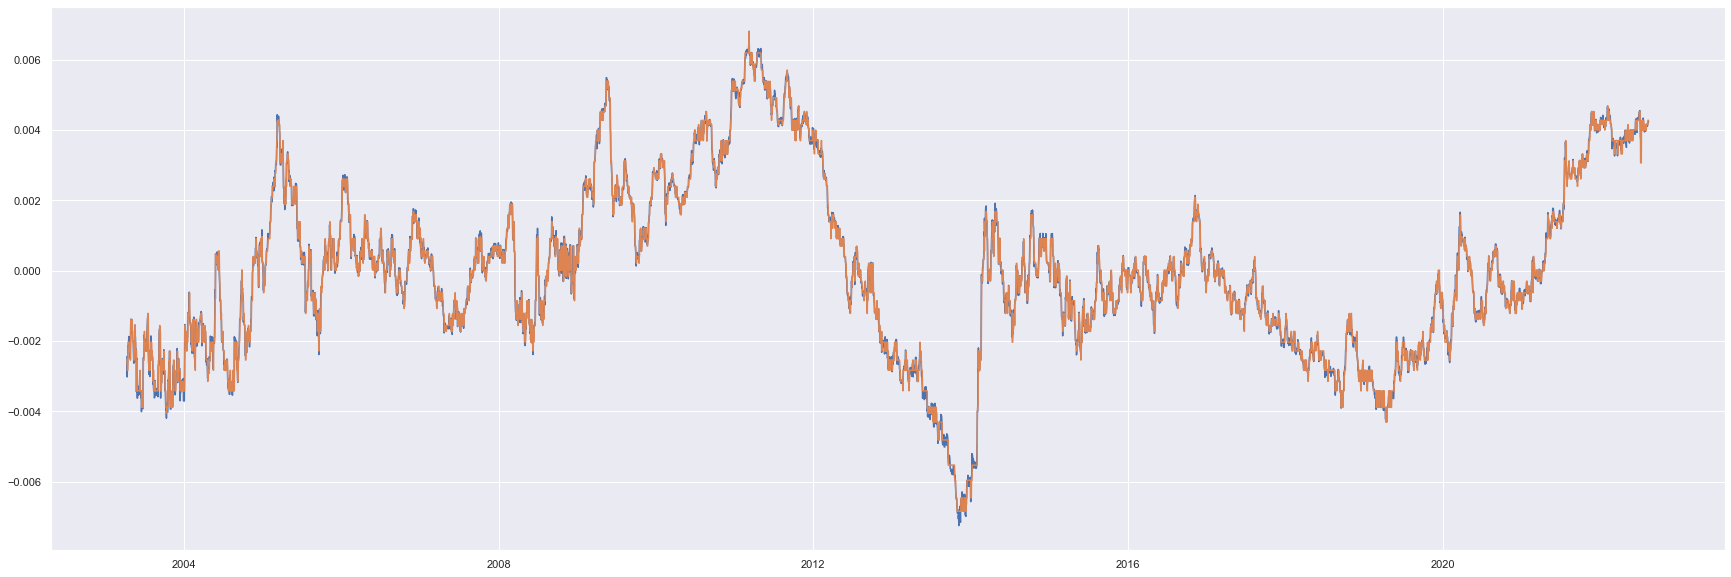

In [ ]:
plt.plot(ObsvsPred)

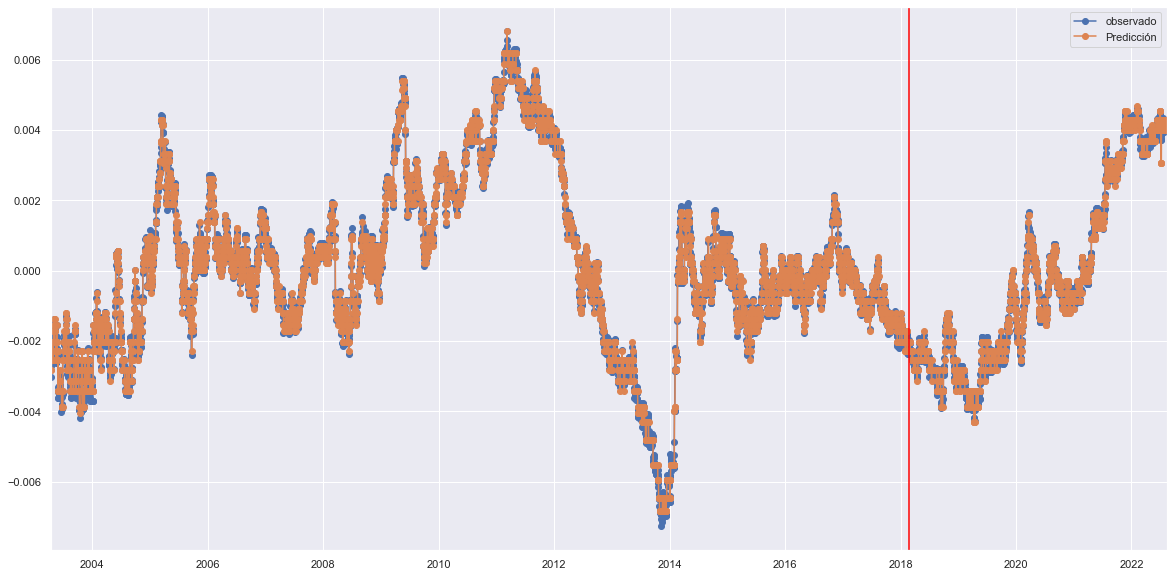

In [ ]:
ax = ObsvsPred.plot( marker="o", figsize=(20,10))
ax.axvline(x=indicetrian_test[5433].date(),color='red')

In [ ]:
## Error cuadratico medio de predicción árbol de decisión
import statistics as stats
stats.mean((ObsvsPred["observado"][5650:] - ObsvsPred["Predicción"][5650:])**2)

2.89616466398815e-08

### Escala original 

In [ ]:
print(len(targetjoint))
print(len(ObsvsPred))

7063
7063


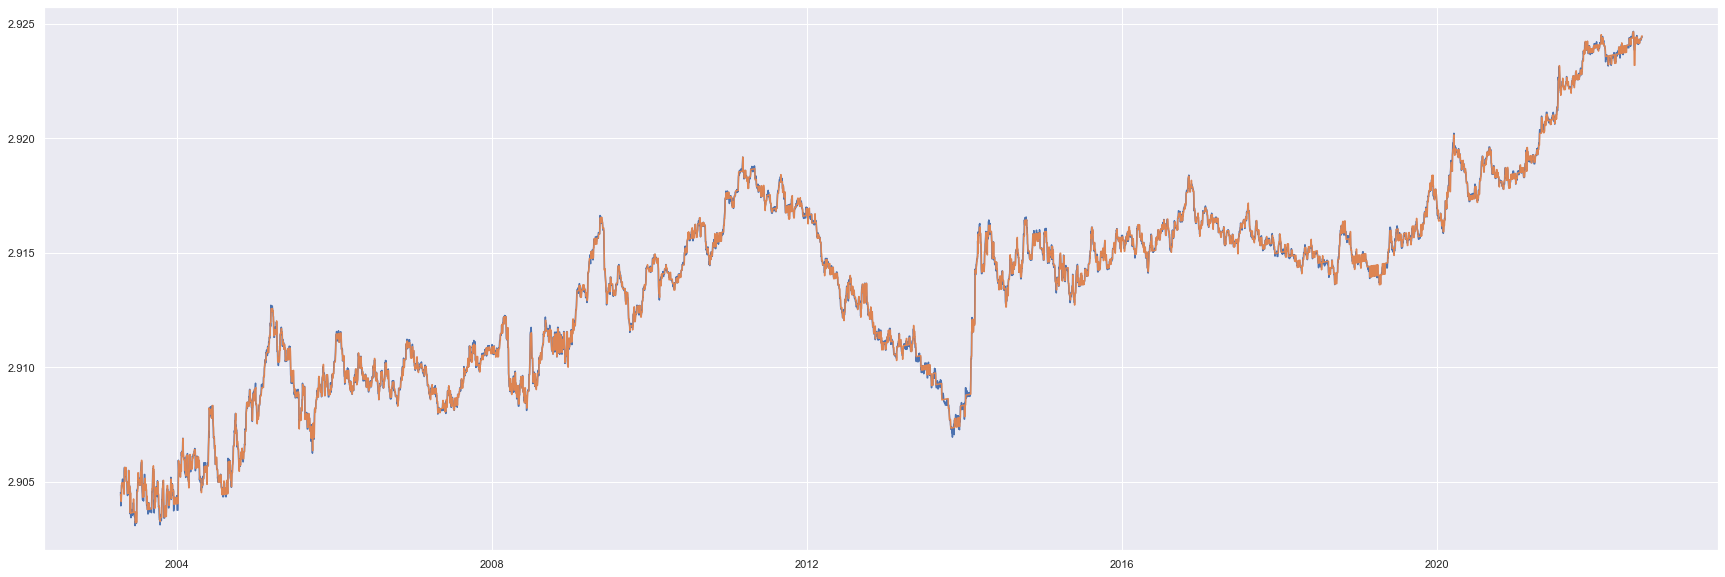

In [ ]:
#trend
trend1 = [targetjoint[i]+trend[i] for i in range(0, len(targetjoint))]
Precio_trend = pd.Series(trend1, index = ObsvsPred.index)

trend2 = [predictionjoint[i]+trend[i] for i in range(0, len(predictionjoint))]
Prediccion_trend = pd.Series(trend2, index = ObsvsPred.index)

plt.plot(Precio_trend)
plt.plot(Prediccion_trend)
plt.show()

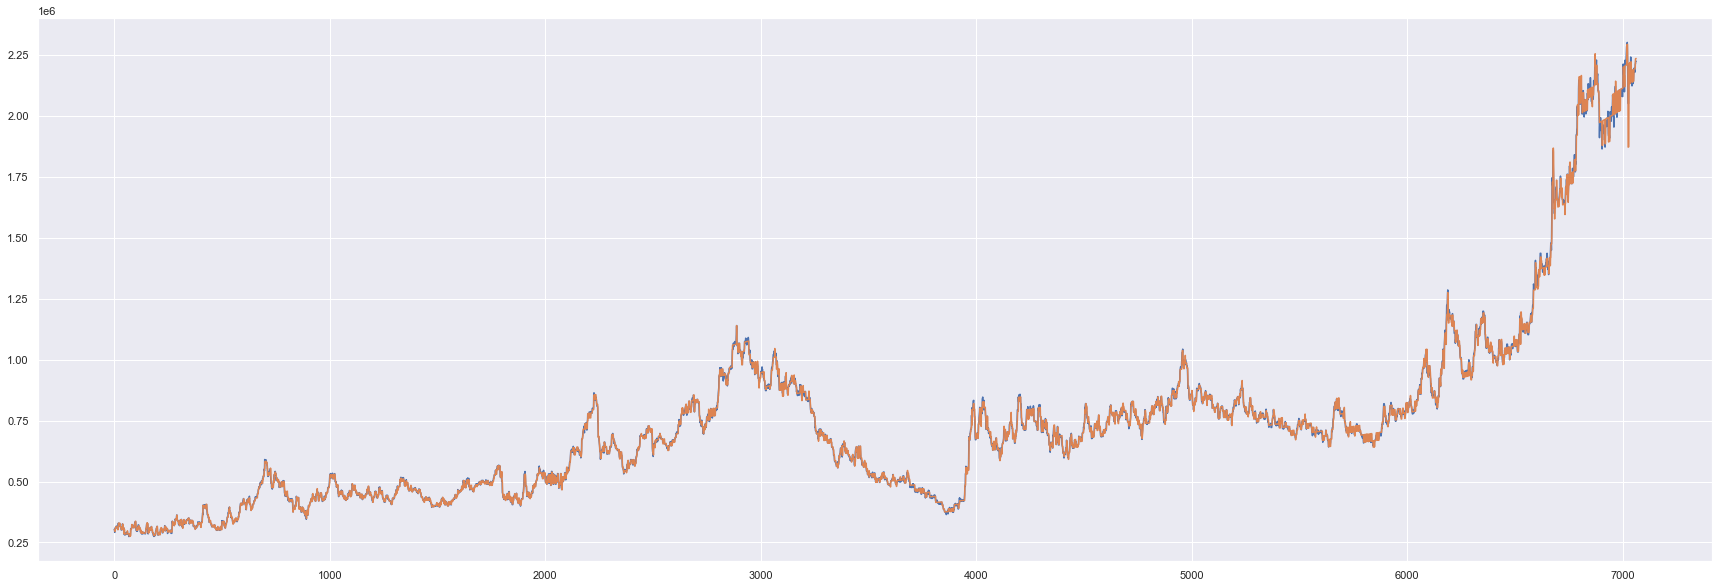

In [ ]:
Precio_trend_bxi=sp.special.inv_boxcox(np.array(Precio_trend[0:]),-0.339555001977193460)
Prediccion_trend_bxi=sp.special.inv_boxcox(np.array(Prediccion_trend[0:]),-0.33955500197719346)

plt.plot(Precio_trend_bxi)
plt.plot(Prediccion_trend_bxi)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
error2 = mean_squared_error(Precio_trend_bxi[5650:], Prediccion_trend_bxi[5650:])
print(error2)

import statistics as stats
#stats.mean((Precio_trend_bxi - Prediccion_trend_bxi)**2)
stats.mean((Precio_trend_bxi[5650:] - Prediccion_trend_bxi[5650:])**2)

757206833.7446839


757206833.7446839

## - Redes neuronales -

### Red Nueronal con una sola Capa oculta(MLP)

In [ ]:
#Precio_detrend1=pd.DataFrame(Precio_detrend)
#Precio_detrend1
Precio.head(5)
Precio.shape
#Precio_detrend1.head(5)
#Precio_detrend1.shape

(7163, 1)

In [ ]:
Producciondf =box_Precio


In [ ]:
from pandas import DataFrame #Nuevo dataframe
df1 = DataFrame()
print(df1)

Empty DataFrame
Columns: []
Index: []


In [ ]:
for i in range(100,0,-1):
    df1[['t-'+str(i)]] = Precio.shift(i)

In [ ]:
print(df1)

                t-100       t-99       t-98       t-97       t-96       t-95  \
Fecha                                                                          
2003-01-02        NaN        NaN        NaN        NaN        NaN        NaN   
2003-01-03        NaN        NaN        NaN        NaN        NaN        NaN   
2003-01-04        NaN        NaN        NaN        NaN        NaN        NaN   
2003-01-05        NaN        NaN        NaN        NaN        NaN        NaN   
2003-01-06        NaN        NaN        NaN        NaN        NaN        NaN   
...               ...        ...        ...        ...        ...        ...   
2022-08-17  2030000.0  2005000.0  2143000.0  2118000.0  2107000.0  2107000.0   
2022-08-18  2005000.0  2143000.0  2118000.0  2107000.0  2107000.0  2107000.0   
2022-08-19  2143000.0  2118000.0  2107000.0  2107000.0  2107000.0  2170000.0   
2022-08-20  2118000.0  2107000.0  2107000.0  2107000.0  2170000.0  2179000.0   
2022-08-21  2107000.0  2107000.0  210700

In [ ]:
df1['t'] = Precio.values

C:\Users\SEBASTIAN\AppData\Local\Temp\ipykernel_4952\4027410742.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



In [ ]:
df1_Precio = df1[100:]
print(df1_Precio)
print(Precio)
Precio.size

                t-100       t-99       t-98       t-97       t-96       t-95  \
Fecha                                                                          
2003-04-12   277000.0   280875.0   280875.0   280875.0   281500.0   294875.0   
2003-04-13   280875.0   280875.0   280875.0   281500.0   294875.0   317375.0   
2003-04-14   280875.0   280875.0   281500.0   294875.0   317375.0   319125.0   
2003-04-15   280875.0   281500.0   294875.0   317375.0   319125.0   331375.0   
2003-04-16   281500.0   294875.0   317375.0   319125.0   331375.0   331375.0   
...               ...        ...        ...        ...        ...        ...   
2022-08-17  2030000.0  2005000.0  2143000.0  2118000.0  2107000.0  2107000.0   
2022-08-18  2005000.0  2143000.0  2118000.0  2107000.0  2107000.0  2107000.0   
2022-08-19  2143000.0  2118000.0  2107000.0  2107000.0  2107000.0  2170000.0   
2022-08-20  2118000.0  2107000.0  2107000.0  2107000.0  2170000.0  2179000.0   
2022-08-21  2107000.0  2107000.0  210700

7163

In [ ]:
# Split data
Preciosplit = df1_Precio.values
# split into lagged variables and original time series
X1= Preciosplit[:, 0:-1]  # slice all rows and start with column 0 and go up to but not including the last column
y1 =Preciosplit[:,-1]  # slice all rows and last column, essentially separating out 't' column

In [ ]:
#Comprobar la division de la data
print(X1[0])
print(y1[0])

[277000. 280875. 280875. 280875. 281500. 294875. 317375. 319125. 331375.
 331375. 331375. 330875. 331750. 337625. 337500. 337750. 337750. 337750.
 333625. 336000. 346625. 345875. 344000. 344000. 344000. 334250. 336125.
 323750. 319750. 329500. 329500. 329500. 334125. 332500. 326375. 330000.
 334625. 334625. 334625. 340125. 336625. 331500. 311500. 317500. 317500.
 317500. 315375. 318750. 316000. 318000. 317875. 317875. 317875. 310875.
 303000. 299250. 300375. 291750. 291750. 291750. 297500. 293250. 293250.
 294250. 300125. 300125. 300125. 304375. 298875. 294500. 294500. 296750.
 296750. 296750. 284000. 290000. 305875. 314125. 314750. 314750. 314750.
 308375. 300000. 300000. 293375. 300000. 300000. 300000. 302750. 300500.
 311250. 317625. 312125. 312125. 312125. 319750. 313375. 309750. 304750.
 307750.]
307750.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
#agegar
#Entrenamiento, validacion y prueba
X_trainF, X_test, y_trainF, y_test = train_test_split(X1,y1,test_size=0.2, train_size=0.8, shuffle=False)

X_train, X_val, y_train, y_val = train_test_split(X_trainF,y_trainF, test_size = 0.225, train_size = 0.775, shuffle=False)

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras

model = keras.models.Sequential([keras.layers.Dense(64, activation = "relu", input_shape = X_train.shape[1:]), keras.layers.Dense(1)])
#primera capa oculta con 64 unidades, fun. tanh y dimensión de entrada    
#capa de salida con una de salida
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 64)                6464      
                                                                 
 dense_36 (Dense)            (None, 1)                 65        
                                                                 
Total params: 6,529
Trainable params: 6,529
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss = "mean_squared_error", optimizer = "adam")
history = model.fit(X_train, y_train, epochs = 150, validation_data = (X_val,y_val))

Epoch 1/150
137/137 [==============================] - 2s 6ms/step - loss: 7165835264.0000 - val_loss: 2609915648.0000
Epoch 2/150
137/137 [==============================] - 1s 4ms/step - loss: 1869449088.0000 - val_loss: 1909228160.0000
Epoch 3/150
137/137 [==============================] - 1s 4ms/step - loss: 1325497728.0000 - val_loss: 1758731904.0000
Epoch 4/150
137/137 [==============================] - 1s 4ms/step - loss: 953241920.0000 - val_loss: 792039040.0000
Epoch 5/150
137/137 [==============================] - 1s 4ms/step - loss: 733747520.0000 - val_loss: 779312192.0000
Epoch 6/150
137/137 [==============================] - 1s 4ms/step - loss: 652470208.0000 - val_loss: 587685632.0000
Epoch 7/150
137/137 [==============================] - 1s 4ms/step - loss: 550126400.0000 - val_loss: 498432000.0000
Epoch 8/150
137/137 [==============================] - 1s 4ms/step - loss: 463293600.0000 - val_loss: 469279392.0000
Epoch 9/150
137/137 [==============================] - 1s 

<AxesSubplot:>

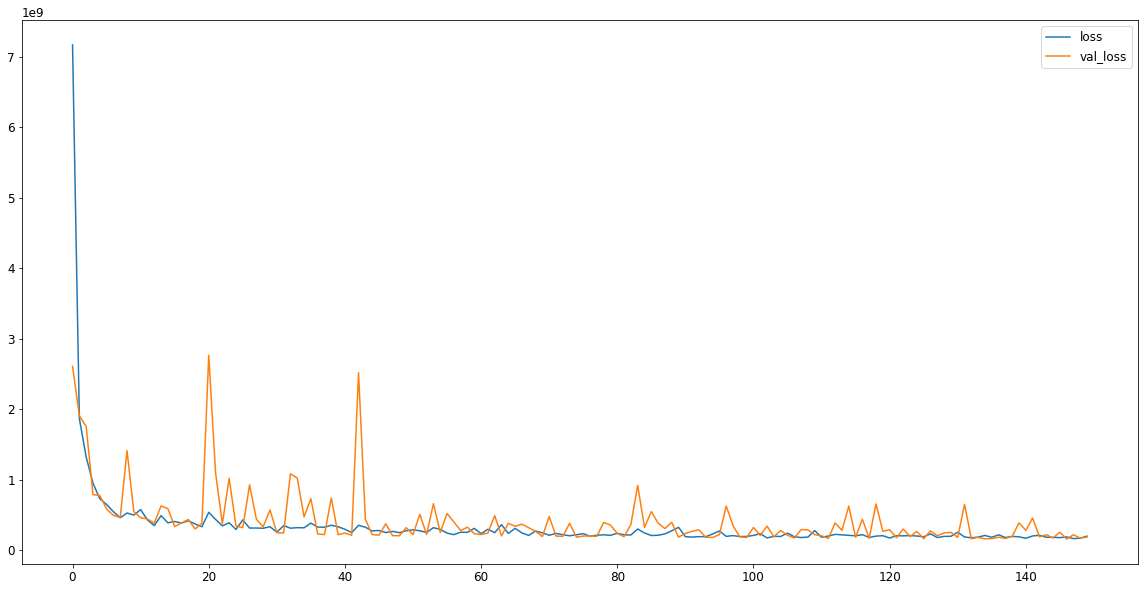

In [ ]:
pd.DataFrame(history.history).plot(figsize=(20,10))

In [ ]:
mse_test = model.evaluate(X_test,y_test)
print(mse_test)

45/45 [==============================] - 0s 3ms/step - loss: 720702336.0000
720702336.0


In [ ]:
ypred = model.predict(X_test)

45/45 [==============================] - 0s 3ms/step


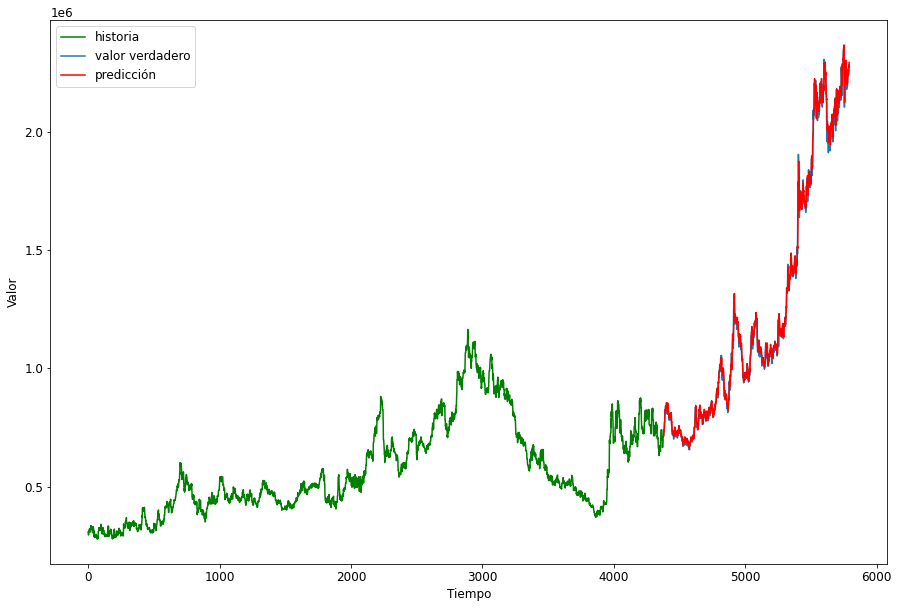

In [ ]:
plt.plot(np.arange(0, len(y_train)), y_train, 'g', label="historia")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, label="valor verdadero")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), ypred, 'r', label="predicción")
plt.ylabel('Valor')
plt.xlabel('Tiempo')
plt.legend()
plt.show();

Text(0.5, 0, 'Index')

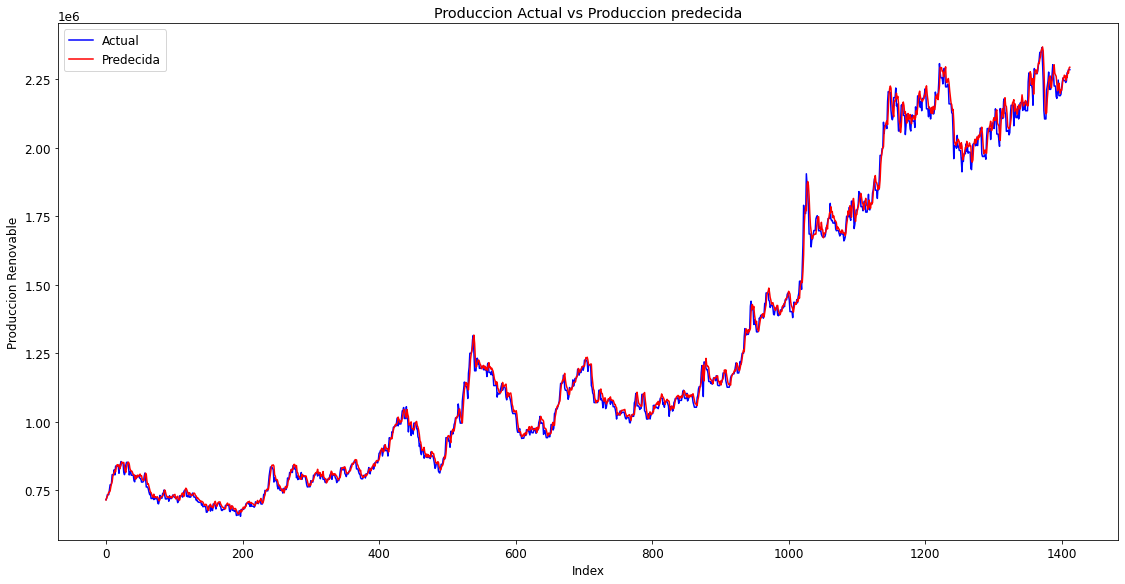

In [ ]:
plt.figure(figsize=(19, 9.5))
plt.plot(range(y_test.size), y_test, linestyle='-', color='b')
plt.plot(range(ypred.size), ypred, linestyle='-',  color='r') 
plt.legend(['Actual','Predecida'], loc=2)
plt.title('Produccion Actual vs Produccion predecida')
plt.ylabel('Produccion Renovable')
plt.xlabel('Index')

In [ ]:
error_MLP = sklearn.metrics.mean_squared_error(y_test, ypred)
print(error_MLP)

720702259.8692249


### Calculo de los hiperparámetros

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
X_train_scaled = X_train
X_test_scaled = y_train

In [ ]:
# This returns a multi-layer-perceptron model in Keras.
def get_keras_model(num_hidden_layers, 
                    num_neurons_per_layer, 
                    dropout_rate, 
                    activation):
    # create the MLP model.
    
    # define the layers.
    inputs = tf.keras.Input(shape=(X_train_scaled.shape[1],))  # input layer.
    x = layers.Dropout(dropout_rate)(inputs) # dropout on the weights.
    
    # Add the hidden layers.
    for i in range(num_hidden_layers):
        x = layers.Dense(num_neurons_per_layer, 
                         activation=activation)(x)
        x = layers.Dropout(dropout_rate)(x)
    
    # output layer.
    outputs = layers.Dense(1, activation='linear')(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model
    

# This function takes in the hyperparameters and returns a score (Cross validation).
def keras_mlp_cv_score(parameterization, weight=None):
    
    model = get_keras_model(parameterization.get('num_hidden_layers'),
                            parameterization.get('neurons_per_layer'),
                            parameterization.get('dropout_rate'),
                            parameterization.get('activation'))
    
    opt = parameterization.get('optimizer')
    opt = opt.lower()
    
    learning_rate = parameterization.get('learning_rate')
    
    if opt == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif opt == 'rms':
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    
    NUM_EPOCHS = 20
    
    # Specify the training configuration.
    model.compile(optimizer=optimizer,
                  loss=tf.keras.losses.MeanSquaredError(),
                  metrics=['mse'])

    data = X_train_scaled
    labels = y_train
    
    # fit the model using validation_data=(X_val,y_val) validation set.
    res = model.fit(data, labels, epochs=NUM_EPOCHS, batch_size=parameterization.get('batch_size'),
                    validation_data=(X_val,y_val))
    
    # look at the last 10 epochs. Get the mean and standard deviation of the validation score.
    last10_scores = np.array(res.history['val_loss'][-10:])
    mean = last10_scores.mean()
    sem = last10_scores.std()
    
    # If the model didn't converge then set a high loss.
    if np.isnan(mean):
        return 9999.0, 0.0
    
    return mean, sem

In [ ]:
# Define the search space.
parameters=[
    {
        "name": "learning_rate",
        "type": "range",
        "bounds": [0.001, 0.002],
        "log_scale": True,
    },
    {
        "name": "dropout_rate",
        "type": "range",
        "bounds": [0.01, 0.02],
        "log_scale": True,
    },
    {
        "name": "num_hidden_layers",
        "type": "range",
        "bounds": [1, 2],
        "value_type": "int"
    },
    {
        "name": "neurons_per_layer",
        "type": "range",
        "bounds": [16, 32],
        "value_type": "int"
    },
    {
        "name": "batch_size",
        "type": "choice",
        "values": [16, 32],
    },
    
    {
        "name": "activation",
        "type": "choice",
        "values": ['tanh', 'sigmoid', 'relu'],
    },
    {
        "name": "optimizer",
        "type": "choice",
        "values": ['adam', 'rms'],
    },
]

In [ ]:
# import more packages
from ax.service.ax_client import AxClient
from ax.utils.notebook.plotting import render, init_notebook_plotting

init_notebook_plotting()

ax_client = AxClient()

# create the experiment.
ax_client.create_experiment(
    name="keras_experiment",
    parameters=parameters,
    objective_name='keras_cv',
    minimize=True)

def evaluate(parameters):
    return {"keras_cv": keras_mlp_cv_score(parameters)}

[INFO 11-29 06:45:48] ax.utils.notebook.plotting: Injecting Plotly library into cell. Do not overwrite or delete cell.


[INFO 11-29 06:45:48] ax.service.ax_client: Starting optimization with verbose logging. To disable logging, set the `verbose_logging` argument to `False`. Note that float values in the logs are rounded to 6 decimal points.
[INFO 11-29 06:45:48] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter learning_rate. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 11-29 06:45:48] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter dropout_rate. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 11-29 06:45:48] ax.service.utils.instantiation: Inferred value type of ParameterType.INT for parameter batch_size. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
C:\Users\

In [ ]:
for i in range(10):
    parameters, trial_index = ax_client.get_next_trial()
    ax_client.complete_trial(trial_index=trial_index,raw_data=evaluate(parameters))

[INFO 11-29 06:46:05] ax.service.ax_client: Generated new trial 0 with parameters {'learning_rate': 0.001151, 'dropout_rate': 0.010467, 'num_hidden_layers': 2, 'neurons_per_layer': 32, 'batch_size': 32, 'activation': 'sigmoid', 'optimizer': 'rms'}.


Epoch 1/20
137/137 [==============================] - 5s 7ms/step - loss: 363823726592.0000 - mse: 363823726592.0000 - val_loss: 614183403520.0000 - val_mse: 614183403520.0000
Epoch 2/20
137/137 [==============================] - 1s 5ms/step - loss: 363818254336.0000 - mse: 363818254336.0000 - val_loss: 614176129024.0000 - val_mse: 614176129024.0000
Epoch 3/20
137/137 [==============================] - 1s 5ms/step - loss: 363812880384.0000 - mse: 363812880384.0000 - val_loss: 614168395776.0000 - val_mse: 614168395776.0000
Epoch 4/20
137/137 [==============================] - 1s 5ms/step - loss: 363806883840.0000 - mse: 363806883840.0000 - val_loss: 614159876096.0000 - val_mse: 614159876096.0000
Epoch 5/20
137/137 [==============================] - 1s 5ms/step - loss: 363800461312.0000 - mse: 363800461312.0000 - val_loss: 614151159808.0000 - val_mse: 614151159808.0000
Epoch 6/20
137/137 [==============================] - 1s 5ms/step - loss: 363794202624.0000 - mse: 363794202624.0000 - v

[INFO 11-29 06:46:24] ax.service.ax_client: Completed trial 0 with data: {'keras_cv': (614065949900.8, 23277715.593915)}.
[INFO 11-29 06:46:24] ax.service.ax_client: Generated new trial 1 with parameters {'learning_rate': 0.00115, 'dropout_rate': 0.013283, 'num_hidden_layers': 1, 'neurons_per_layer': 16, 'batch_size': 32, 'activation': 'tanh', 'optimizer': 'rms'}.


Epoch 1/20
137/137 [==============================] - 3s 7ms/step - loss: 363827757056.0000 - mse: 363827757056.0000 - val_loss: 614190743552.0000 - val_mse: 614190743552.0000
Epoch 2/20
137/137 [==============================] - 1s 5ms/step - loss: 363824873472.0000 - mse: 363824873472.0000 - val_loss: 614186745856.0000 - val_mse: 614186745856.0000
Epoch 3/20
137/137 [==============================] - 1s 4ms/step - loss: 363821531136.0000 - mse: 363821531136.0000 - val_loss: 614181961728.0000 - val_mse: 614181961728.0000
Epoch 4/20
137/137 [==============================] - 1s 4ms/step - loss: 363818450944.0000 - mse: 363818450944.0000 - val_loss: 614177701888.0000 - val_mse: 614177701888.0000
Epoch 5/20
137/137 [==============================] - 1s 4ms/step - loss: 363815600128.0000 - mse: 363815600128.0000 - val_loss: 614173704192.0000 - val_mse: 614173704192.0000
Epoch 6/20
137/137 [==============================] - 1s 4ms/step - loss: 363812651008.0000 - mse: 363812651008.0000 - v

[INFO 11-29 06:46:39] ax.service.ax_client: Completed trial 1 with data: {'keras_cv': (614129952358.4, 11965236.882596)}.
[INFO 11-29 06:46:39] ax.service.ax_client: Generated new trial 2 with parameters {'learning_rate': 0.001713, 'dropout_rate': 0.010207, 'num_hidden_layers': 2, 'neurons_per_layer': 23, 'batch_size': 16, 'activation': 'tanh', 'optimizer': 'rms'}.


Epoch 1/20
274/274 [==============================] - 3s 4ms/step - loss: 363816189952.0000 - mse: 363816189952.0000 - val_loss: 614166953984.0000 - val_mse: 614166953984.0000
Epoch 2/20
274/274 [==============================] - 1s 3ms/step - loss: 363802591232.0000 - mse: 363802591232.0000 - val_loss: 614149455872.0000 - val_mse: 614149455872.0000
Epoch 3/20
274/274 [==============================] - 1s 3ms/step - loss: 363789811712.0000 - mse: 363789811712.0000 - val_loss: 614132023296.0000 - val_mse: 614132023296.0000
Epoch 4/20
274/274 [==============================] - 1s 3ms/step - loss: 363776638976.0000 - mse: 363776638976.0000 - val_loss: 614114459648.0000 - val_mse: 614114459648.0000
Epoch 5/20
274/274 [==============================] - 1s 3ms/step - loss: 363763990528.0000 - mse: 363763990528.0000 - val_loss: 614096764928.0000 - val_mse: 614096764928.0000
Epoch 6/20
274/274 [==============================] - 1s 3ms/step - loss: 363751243776.0000 - mse: 363751243776.0000 - v

[INFO 11-29 06:47:01] ax.service.ax_client: Completed trial 2 with data: {'keras_cv': (613913277235.2, 50260709.902782)}.
[INFO 11-29 06:47:01] ax.service.ax_client: Generated new trial 3 with parameters {'learning_rate': 0.001351, 'dropout_rate': 0.017485, 'num_hidden_layers': 1, 'neurons_per_layer': 24, 'batch_size': 16, 'activation': 'sigmoid', 'optimizer': 'rms'}.


Epoch 1/20
274/274 [==============================] - 2s 4ms/step - loss: 363823104000.0000 - mse: 363823104000.0000 - val_loss: 614182813696.0000 - val_mse: 614182813696.0000
Epoch 2/20
274/274 [==============================] - 1s 4ms/step - loss: 363816976384.0000 - mse: 363816976384.0000 - val_loss: 614173900800.0000 - val_mse: 614173900800.0000
Epoch 3/20
274/274 [==============================] - 1s 4ms/step - loss: 363810226176.0000 - mse: 363810226176.0000 - val_loss: 614163677184.0000 - val_mse: 614163677184.0000
Epoch 4/20
274/274 [==============================] - 1s 4ms/step - loss: 363803475968.0000 - mse: 363803475968.0000 - val_loss: 614155026432.0000 - val_mse: 614155026432.0000
Epoch 5/20
274/274 [==============================] - 1s 3ms/step - loss: 363797184512.0000 - mse: 363797184512.0000 - val_loss: 614146375680.0000 - val_mse: 614146375680.0000
Epoch 6/20
274/274 [==============================] - 1s 3ms/step - loss: 363790794752.0000 - mse: 363790794752.0000 - v

[INFO 11-29 06:47:21] ax.service.ax_client: Completed trial 3 with data: {'keras_cv': (614055791820.8, 24751703.945479)}.
[INFO 11-29 06:47:21] ax.service.ax_client: Generated new trial 4 with parameters {'learning_rate': 0.001173, 'dropout_rate': 0.012586, 'num_hidden_layers': 1, 'neurons_per_layer': 22, 'batch_size': 32, 'activation': 'relu', 'optimizer': 'adam'}.


Epoch 1/20
137/137 [==============================] - 2s 5ms/step - loss: 18356996096.0000 - mse: 18356996096.0000 - val_loss: 3575837440.0000 - val_mse: 3575837440.0000
Epoch 2/20
137/137 [==============================] - 1s 4ms/step - loss: 7797857280.0000 - mse: 7797857280.0000 - val_loss: 1522074112.0000 - val_mse: 1522074112.0000
Epoch 3/20
137/137 [==============================] - 1s 4ms/step - loss: 5279972352.0000 - mse: 5279972352.0000 - val_loss: 1526870656.0000 - val_mse: 1526870656.0000
Epoch 4/20
137/137 [==============================] - 1s 5ms/step - loss: 4350652416.0000 - mse: 4350652416.0000 - val_loss: 1107163264.0000 - val_mse: 1107163264.0000
Epoch 5/20
137/137 [==============================] - 1s 7ms/step - loss: 3394841088.0000 - mse: 3394841088.0000 - val_loss: 1085138432.0000 - val_mse: 1085138432.0000
Epoch 6/20
137/137 [==============================] - 1s 4ms/step - loss: 3214557696.0000 - mse: 3214557696.0000 - val_loss: 902098112.0000 - val_mse: 9020981

[INFO 11-29 06:47:34] ax.service.ax_client: Completed trial 4 with data: {'keras_cv': (1080054470.4, 428388347.097959)}.
[INFO 11-29 06:47:34] ax.service.ax_client: Generated new trial 5 with parameters {'learning_rate': 0.001669, 'dropout_rate': 0.011006, 'num_hidden_layers': 1, 'neurons_per_layer': 23, 'batch_size': 16, 'activation': 'tanh', 'optimizer': 'rms'}.


Epoch 1/20
274/274 [==============================] - 2s 4ms/step - loss: 363821498368.0000 - mse: 363821498368.0000 - val_loss: 614175801344.0000 - val_mse: 614175801344.0000
Epoch 2/20
274/274 [==============================] - 1s 3ms/step - loss: 363809275904.0000 - mse: 363809275904.0000 - val_loss: 614158827520.0000 - val_mse: 614158827520.0000
Epoch 3/20
274/274 [==============================] - 1s 3ms/step - loss: 363796922368.0000 - mse: 363796922368.0000 - val_loss: 614141722624.0000 - val_mse: 614141722624.0000
Epoch 4/20
274/274 [==============================] - 1s 3ms/step - loss: 363784863744.0000 - mse: 363784863744.0000 - val_loss: 614124617728.0000 - val_mse: 614124617728.0000
Epoch 5/20
274/274 [==============================] - 1s 3ms/step - loss: 363771985920.0000 - mse: 363771985920.0000 - val_loss: 614107774976.0000 - val_mse: 614107774976.0000
Epoch 6/20
274/274 [==============================] - 1s 4ms/step - loss: 363759796224.0000 - mse: 363759796224.0000 - v

[INFO 11-29 06:47:53] ax.service.ax_client: Completed trial 5 with data: {'keras_cv': (613928769945.6, 48980759.35259)}.
[INFO 11-29 06:47:53] ax.service.ax_client: Generated new trial 6 with parameters {'learning_rate': 0.001275, 'dropout_rate': 0.016369, 'num_hidden_layers': 2, 'neurons_per_layer': 20, 'batch_size': 32, 'activation': 'tanh', 'optimizer': 'adam'}.


Epoch 1/20
137/137 [==============================] - 2s 5ms/step - loss: 363823104000.0000 - mse: 363823104000.0000 - val_loss: 614180716544.0000 - val_mse: 614180716544.0000
Epoch 2/20
137/137 [==============================] - 1s 4ms/step - loss: 363816419328.0000 - mse: 363816419328.0000 - val_loss: 614173966336.0000 - val_mse: 614173966336.0000
Epoch 3/20
137/137 [==============================] - 1s 4ms/step - loss: 363811766272.0000 - mse: 363811766272.0000 - val_loss: 614167740416.0000 - val_mse: 614167740416.0000
Epoch 4/20
137/137 [==============================] - 1s 5ms/step - loss: 363807277056.0000 - mse: 363807277056.0000 - val_loss: 614161776640.0000 - val_mse: 614161776640.0000
Epoch 5/20
137/137 [==============================] - 1s 5ms/step - loss: 363802886144.0000 - mse: 363802886144.0000 - val_loss: 614155943936.0000 - val_mse: 614155943936.0000
Epoch 6/20
137/137 [==============================] - 1s 4ms/step - loss: 363798462464.0000 - mse: 363798462464.0000 - v

[INFO 11-29 06:48:07] ax.service.ax_client: Completed trial 6 with data: {'keras_cv': (614095139635.2, 16505753.896993)}.
[INFO 11-29 06:48:07] ax.service.ax_client: Generated new trial 7 with parameters {'learning_rate': 0.001126, 'dropout_rate': 0.018004, 'num_hidden_layers': 1, 'neurons_per_layer': 32, 'batch_size': 32, 'activation': 'relu', 'optimizer': 'rms'}.


Epoch 1/20
137/137 [==============================] - 2s 7ms/step - loss: 32698183680.0000 - mse: 32698183680.0000 - val_loss: 14926970880.0000 - val_mse: 14926970880.0000
Epoch 2/20
137/137 [==============================] - 1s 4ms/step - loss: 8915221504.0000 - mse: 8915221504.0000 - val_loss: 2631814400.0000 - val_mse: 2631814400.0000
Epoch 3/20
137/137 [==============================] - 1s 4ms/step - loss: 7054659584.0000 - mse: 7054659584.0000 - val_loss: 15681096704.0000 - val_mse: 15681096704.0000
Epoch 4/20
137/137 [==============================] - 1s 4ms/step - loss: 5972411904.0000 - mse: 5972411904.0000 - val_loss: 18012633088.0000 - val_mse: 18012633088.0000
Epoch 5/20
137/137 [==============================] - 1s 4ms/step - loss: 5145627648.0000 - mse: 5145627648.0000 - val_loss: 3546124032.0000 - val_mse: 3546124032.0000
Epoch 6/20
137/137 [==============================] - 1s 5ms/step - loss: 4600580096.0000 - mse: 4600580096.0000 - val_loss: 3919162880.0000 - val_mse: 

[INFO 11-29 06:48:23] ax.service.ax_client: Completed trial 7 with data: {'keras_cv': (2009262483.2, 1378219347.967824)}.
[INFO 11-29 06:48:23] ax.service.ax_client: Generated new trial 8 with parameters {'learning_rate': 0.001105, 'dropout_rate': 0.018244, 'num_hidden_layers': 1, 'neurons_per_layer': 18, 'batch_size': 16, 'activation': 'relu', 'optimizer': 'rms'}.


Epoch 1/20
274/274 [==============================] - 2s 5ms/step - loss: 16083082240.0000 - mse: 16083082240.0000 - val_loss: 1880665344.0000 - val_mse: 1880665344.0000
Epoch 2/20
274/274 [==============================] - 1s 4ms/step - loss: 6409041408.0000 - mse: 6409041408.0000 - val_loss: 3445549056.0000 - val_mse: 3445549056.0000
Epoch 3/20
274/274 [==============================] - 1s 4ms/step - loss: 4940422656.0000 - mse: 4940422656.0000 - val_loss: 2653089536.0000 - val_mse: 2653089536.0000
Epoch 4/20
274/274 [==============================] - 1s 4ms/step - loss: 4567285760.0000 - mse: 4567285760.0000 - val_loss: 718469696.0000 - val_mse: 718469696.0000
Epoch 5/20
274/274 [==============================] - 1s 5ms/step - loss: 4050701824.0000 - mse: 4050701824.0000 - val_loss: 2329334016.0000 - val_mse: 2329334016.0000
Epoch 6/20
274/274 [==============================] - 1s 5ms/step - loss: 3798413824.0000 - mse: 3798413824.0000 - val_loss: 2503117824.0000 - val_mse: 25031178

[INFO 11-29 06:48:47] ax.service.ax_client: Completed trial 8 with data: {'keras_cv': (2269891251.2, 2248447969.444851)}.
[INFO 11-29 06:48:47] ax.service.ax_client: Generated new trial 9 with parameters {'learning_rate': 0.001622, 'dropout_rate': 0.010557, 'num_hidden_layers': 2, 'neurons_per_layer': 32, 'batch_size': 16, 'activation': 'tanh', 'optimizer': 'rms'}.


Epoch 1/20
274/274 [==============================] - 4s 5ms/step - loss: 363813076992.0000 - mse: 363813076992.0000 - val_loss: 614160596992.0000 - val_mse: 614160596992.0000
Epoch 2/20
274/274 [==============================] - 1s 4ms/step - loss: 363795939328.0000 - mse: 363795939328.0000 - val_loss: 614137724928.0000 - val_mse: 614137724928.0000
Epoch 3/20
274/274 [==============================] - 1s 4ms/step - loss: 363779260416.0000 - mse: 363779260416.0000 - val_loss: 614115115008.0000 - val_mse: 614115115008.0000
Epoch 4/20
274/274 [==============================] - 1s 4ms/step - loss: 363762450432.0000 - mse: 363762450432.0000 - val_loss: 614092242944.0000 - val_mse: 614092242944.0000
Epoch 5/20
274/274 [==============================] - 1s 4ms/step - loss: 363745542144.0000 - mse: 363745542144.0000 - val_loss: 614069370880.0000 - val_mse: 614069370880.0000
Epoch 6/20
274/274 [==============================] - 1s 4ms/step - loss: 363728896000.0000 - mse: 363728896000.0000 - v

[INFO 11-29 06:49:15] ax.service.ax_client: Completed trial 9 with data: {'keras_cv': (613830171033.6, 65416723.744658)}.


In [ ]:
ax_client.get_trials_data_frame().sort_values('trial_index')

keras_cv  trial_index arm_name  learning_rate  dropout_rate  \
0  6.140659e+11            0      0_0       0.001151      0.010467   
1  6.141300e+11            1      1_0       0.001150      0.013283   
2  6.139133e+11            2      2_0       0.001713      0.010207   
3  6.140558e+11            3      3_0       0.001351      0.017485   
4  1.080054e+09            4      4_0       0.001173      0.012586   
5  6.139288e+11            5      5_0       0.001669      0.011006   
6  6.140951e+11            6      6_0       0.001275      0.016369   
7  2.009262e+09            7      7_0       0.001126      0.018004   
8  2.269891e+09            8      8_0       0.001105      0.018244   
9  6.138302e+11            9      9_0       0.001622      0.010557   

   num_hidden_layers  neurons_per_layer  batch_size activation optimizer  \
0                  2                 32          32    sigmoid       rms   
1                  1                 16          32       tanh       rms   
2                  2                 23          16       tanh       rms   
3                  1                 24          16    sigmoid       rms   
4                  1                 22          32       relu      adam   
5                  1                 23          16       tanh       rms   
6                  2                 20          32       tanh      adam   
7                  1                 32          32       relu       rms   
8                  1                 18          16       relu       rms   
9                  2                 32          16       tanh       rms   

  trial_status generation_method  
0    COMPLETED             Sobol  
1    COMPLETED             Sobol  
2    COMPLETED             Sobol  
3    COMPLETED             Sobol  
4    COMPLETED             Sobol  
5    COMPLETED             Sobol  
6    COMPLETED             Sobol  
7    COMPLETED             Sobol  
8    COMPLETED             Sobol  
9    COMPLETED             Sobol

In [ ]:
best_parameters, values = ax_client.get_best_parameters()

# the best set of parameters.
for k in best_parameters.items():
  print(k)

print()

# the best score achieved.
means, covariances = values
print(means)

('learning_rate', 0.0011729329305700733)
('dropout_rate', 0.012585785337350355)
('num_hidden_layers', 1)
('neurons_per_layer', 22)
('batch_size', 32)
('activation', 'relu')
('optimizer', 'adam')

{'keras_cv': 1080054470.4}


### Modelos mas complejos

In [ ]:
input_layer = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(24,activation="relu")(input_layer)
hidden2 = keras.layers.Dense(24,activation="relu")(hidden1)
#hidden3 = keras.layers.Dense(8,activation="relu")(hidden2)
#dropout_layer = keras.layers.Dropout(0.2)(hidden3)
#output_layer = keras.layers.Dense(1, activation='linear')(dropout_layer)
output_layer = keras.layers.Dense(1, activation='linear')(hidden2)

In [ ]:
ts_model=keras.Model(inputs=[input_layer],outputs=[output_layer])
ts_model.summary()

Model: "model_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_23 (InputLayer)       [(None, 100)]             0         
                                                                 
 dense_63 (Dense)            (None, 24)                2424      
                                                                 
 dense_64 (Dense)            (None, 24)                600       
                                                                 
 dense_65 (Dense)            (None, 1)                 25        
                                                                 
Total params: 3,049
Trainable params: 3,049
Non-trainable params: 0
_________________________________________________________________


In [ ]:
ts_model.compile(loss="mean_squared_error",optimizer="adam")
history=ts_model.fit(X_train,y_train,epochs=150,batch_size=32,validation_data=(X_val,y_val))

Epoch 1/150
137/137 [==============================] - 3s 9ms/step - loss: 23149924352.0000 - val_loss: 2563357184.0000
Epoch 2/150
137/137 [==============================] - 1s 7ms/step - loss: 3158785024.0000 - val_loss: 1553121536.0000
Epoch 3/150
137/137 [==============================] - 1s 6ms/step - loss: 1590466560.0000 - val_loss: 1200190208.0000
Epoch 4/150
137/137 [==============================] - 1s 7ms/step - loss: 1138757632.0000 - val_loss: 898532480.0000
Epoch 5/150
137/137 [==============================] - 1s 7ms/step - loss: 794888640.0000 - val_loss: 678262464.0000
Epoch 6/150
137/137 [==============================] - 1s 7ms/step - loss: 627149056.0000 - val_loss: 618648256.0000
Epoch 7/150
137/137 [==============================] - 1s 7ms/step - loss: 537690880.0000 - val_loss: 536655072.0000
Epoch 8/150
137/137 [==============================] - 1s 7ms/step - loss: 499497280.0000 - val_loss: 691447488.0000
Epoch 9/150
137/137 [==============================] - 1

<AxesSubplot:>

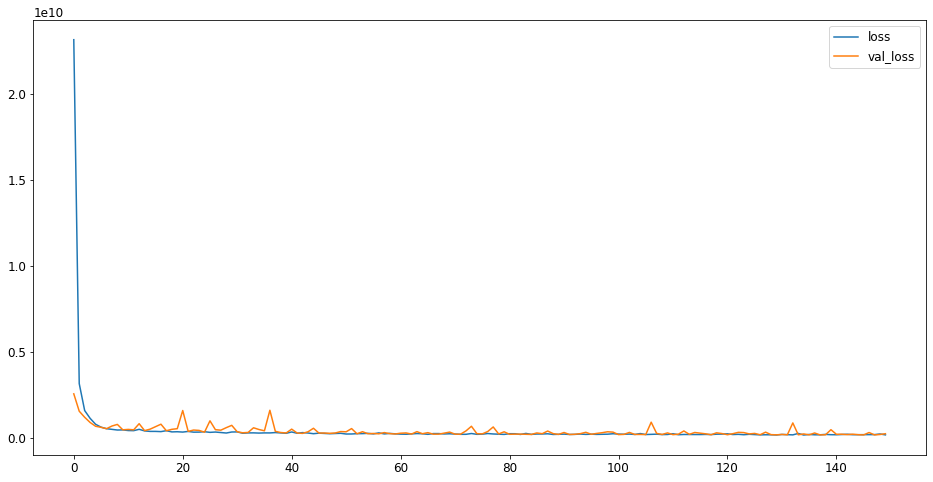

In [ ]:
pd.DataFrame(history.history).plot(figsize=(16,8))

In [ ]:
mse_test1=ts_model.evaluate(X_test,y_test)

45/45 [==============================] - 0s 5ms/step - loss: 960537792.0000


In [ ]:
print(mse_test1)

960537792.0


In [ ]:
preds_ts_model=ts_model.predict(X_test)
#print(preds_ts_model)

45/45 [==============================] - 0s 4ms/step


Text(0.5, 0, 'Index')

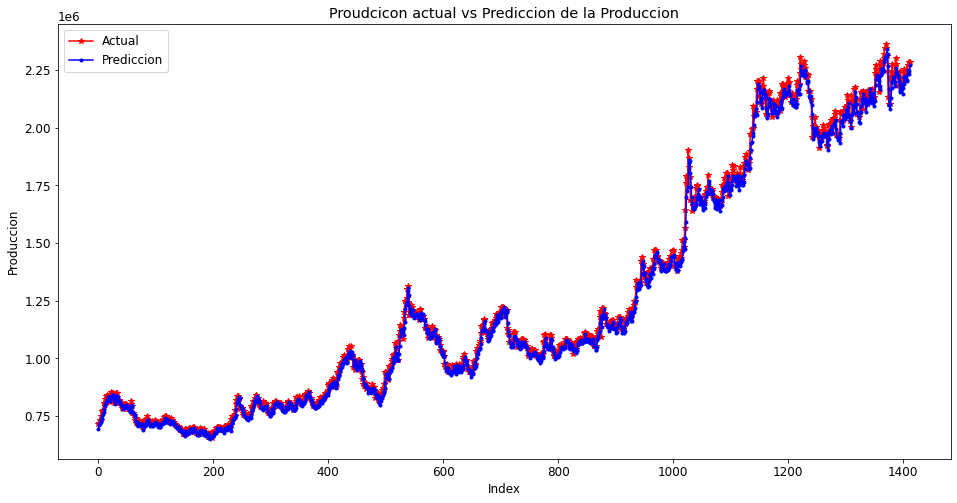

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(range(y_test.size), y_test, linestyle='-', marker='*', color='r')
plt.plot(range(preds_ts_model.size), preds_ts_model, linestyle='-', marker='.', color='b') 
plt.legend(['Actual','Prediccion'], loc=2)
plt.title('Proudcicon actual vs Prediccion de la Produccion')
plt.ylabel('Produccion')
plt.xlabel('Index')

In [ ]:
error_LSTM1 = sklearn.metrics.mean_squared_error(y_test, preds_ts_model)
print(error_LSTM1)


809905822.7199775


## - Redes LSTM -

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
#import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from tensorflow import keras

from tensorflow.keras.layers import Input, LSTM, Dense, GRU
from tensorflow.keras.models import Model

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.utils import plot_model

from sklearn.preprocessing import MinMaxScaler

In [ ]:
Precio.head(5)

Precio
Fecha             
2003-01-02  277000
2003-01-03  280875
2003-01-04  280875
2003-01-05  280875
2003-01-06  281500

In [ ]:
# crea el objeto scaler y escala los datos
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(Precio.values)

Precio_scaled = pd.DataFrame(scaled_data,index=Precio.index, columns=['Precio'])
Precio_scaled.head(5)

Precio
Fecha               
2003-01-02  0.000000
2003-01-03  0.001856
2003-01-04  0.001856
2003-01-05  0.001856
2003-01-06  0.002155

In [ ]:
dataset=Precio_scaled
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset.iloc[0:train_size], dataset.iloc[train_size:len(dataset)]
len_train = len(train)
len_test = len(test)
print(len_train, len_test)

5730 1433


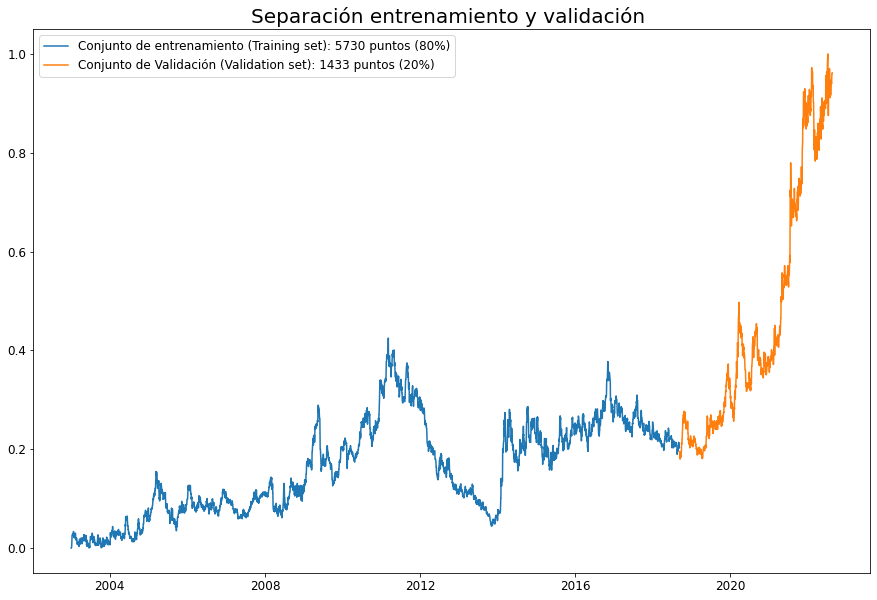

In [ ]:
plt.plot(train, label='Conjunto de entrenamiento (Training set): ' + str(len_train) +' puntos (80%)')
plt.plot(test, label='Conjunto de Validación (Validation set): '  + str(len_test) + ' puntos (20%)') 
plt.title("Separación entrenamiento y validación ", size = 20)
plt.legend()
plt.show()

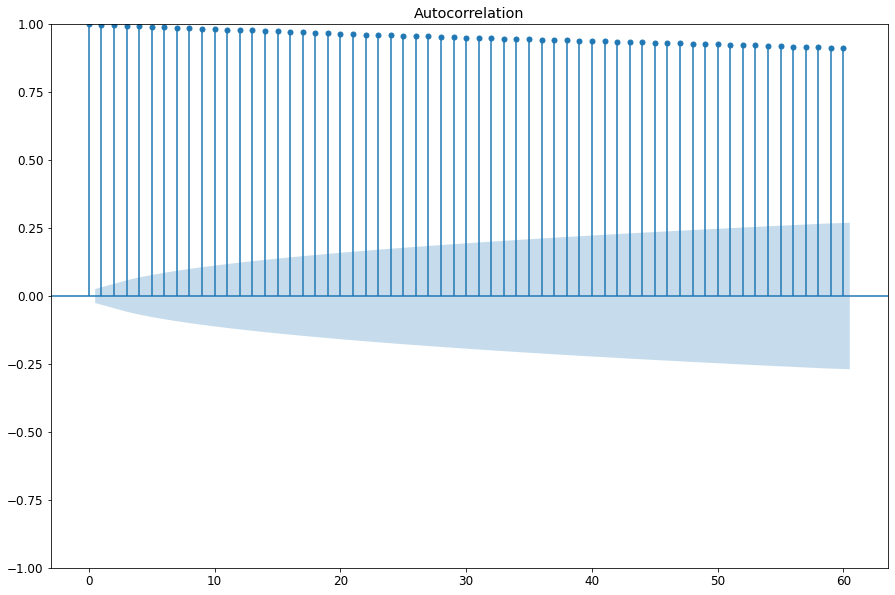

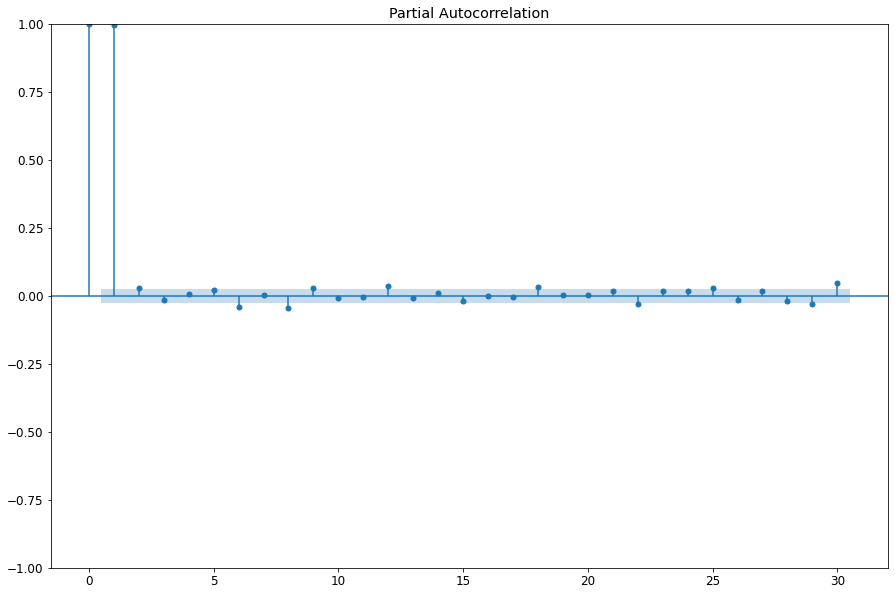

In [ ]:
graph1=plot_acf(train,lags=60,adjusted=False)
graph2=plot_pacf(train,lags=30,method='ldbiased')

In [ ]:
#Configutacion de los datos para aprendisaje automatico de series  
def create_dataset(X, y, time_steps=1):
    # crea dos listas vacias para depositar los datos
    Xs, ys = [], []
    # el primer lote de datos empieza en la primera observación
    # y toma time_steps  datos.
    # Comienza a avanzar hacia adelante.
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [ ]:
time_steps = 365

X_train, y_train = create_dataset(train, train, time_steps)
X_test, y_test = create_dataset(test, test, time_steps)

print(X_train.shape)
print(y_train.shape)

(5365, 365, 1)
(5365, 1)


### Modelo 

In [ ]:
# shapes
inputs_shape = (X_train.shape[1], X_train.shape[2])
lstm_output = 60

# layers
inputs = Input(inputs_shape)
x = LSTM(units=lstm_output, name='LSTM_layer')(inputs)
outputs = Dense(1)(x)

# model
modelo_LSTM = Model(inputs=inputs, outputs=outputs, name='series_LSTM_model')

modelo_LSTM.summary()

Model: "series_LSTM_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 365, 1)]          0         
                                                                 
 LSTM_layer (LSTM)           (None, 60)                14880     
                                                                 
 dense_1 (Dense)             (None, 1)                 61        
                                                                 
Total params: 14,941
Trainable params: 14,941
Non-trainable params: 0
_________________________________________________________________


In [ ]:
modelo_LSTM.compile(loss='mean_squared_error',
  optimizer=Adam(0.001))

### Entrenamiento

In [ ]:
history2 = modelo_LSTM.fit(
    X_train, y_train,
    epochs=30,
    batch_size=16,
    validation_split=0.1,
    verbose=1,
    shuffle=True)

Epoch 1/30
302/302 [==============================] - 65s 203ms/step - loss: 7.6504e-04 - val_loss: 7.3432e-05
Epoch 2/30
302/302 [==============================] - 60s 197ms/step - loss: 1.1384e-04 - val_loss: 6.4811e-05
Epoch 3/30
302/302 [==============================] - 64s 211ms/step - loss: 9.3623e-05 - val_loss: 5.7538e-05
Epoch 4/30
302/302 [==============================] - 65s 215ms/step - loss: 7.9375e-05 - val_loss: 4.6923e-05
Epoch 5/30
302/302 [==============================] - 65s 215ms/step - loss: 7.0763e-05 - val_loss: 4.2885e-05
Epoch 6/30
302/302 [==============================] - 66s 217ms/step - loss: 6.7958e-05 - val_loss: 4.0603e-05
Epoch 7/30
302/302 [==============================] - 65s 215ms/step - loss: 5.9878e-05 - val_loss: 5.2489e-05
Epoch 8/30
302/302 [==============================] - 64s 212ms/step - loss: 5.8570e-05 - val_loss: 6.9438e-05
Epoch 9/30
302/302 [==============================] - 65s 214ms/step - loss: 5.5683e-05 - val_loss: 3.2682e-05
E

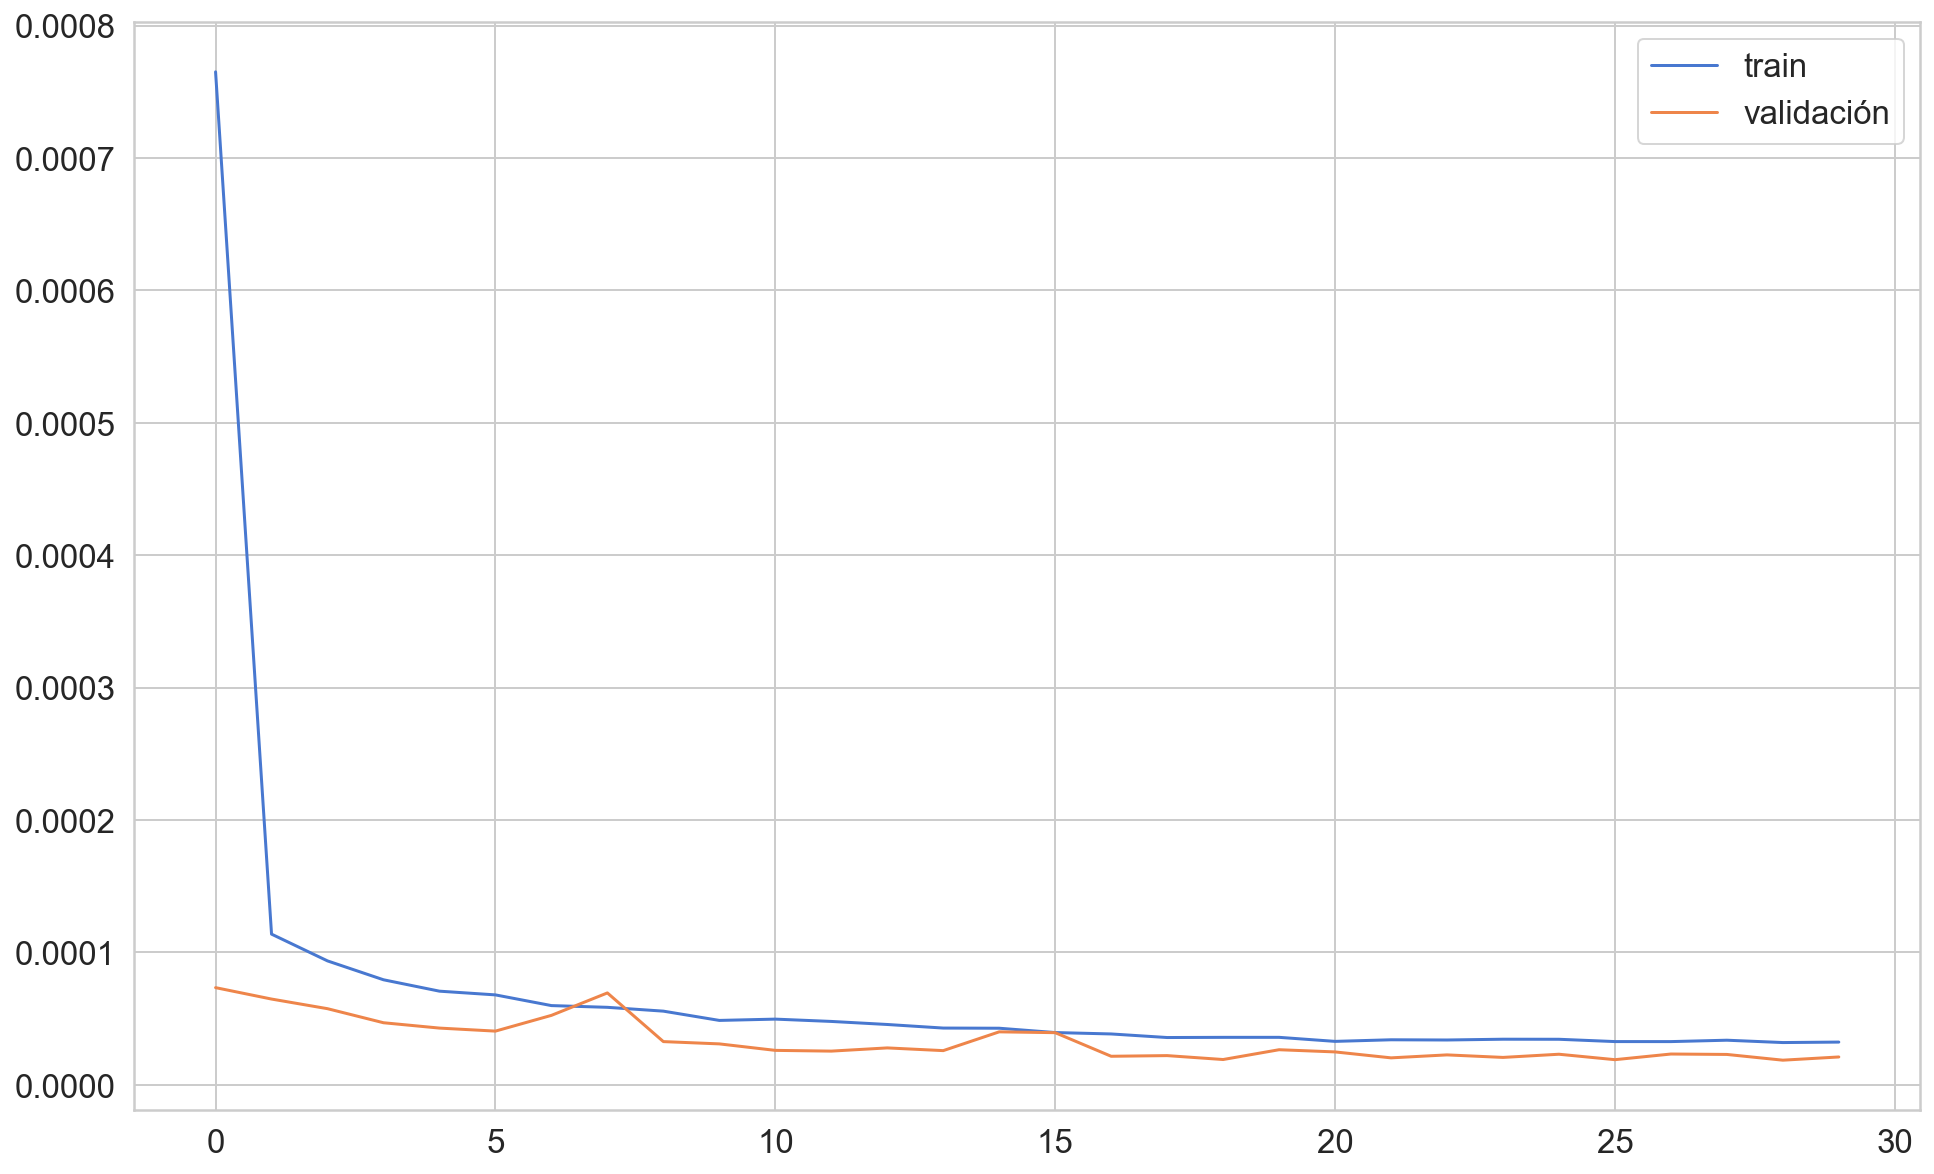

In [ ]:
plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='validación')
plt.legend();

In [ ]:
y_pred_LSTM =modelo_LSTM.predict(X_test)
y_pred_LSTM.shape

34/34 [==============================] - 4s 91ms/step


(1068, 1)

### Escala original

In [ ]:
y_pred_LSTM1 = scaler.inverse_transform(y_pred_LSTM)
y_test1= scaler.inverse_transform(y_test)
y_train1= scaler.inverse_transform(y_train)


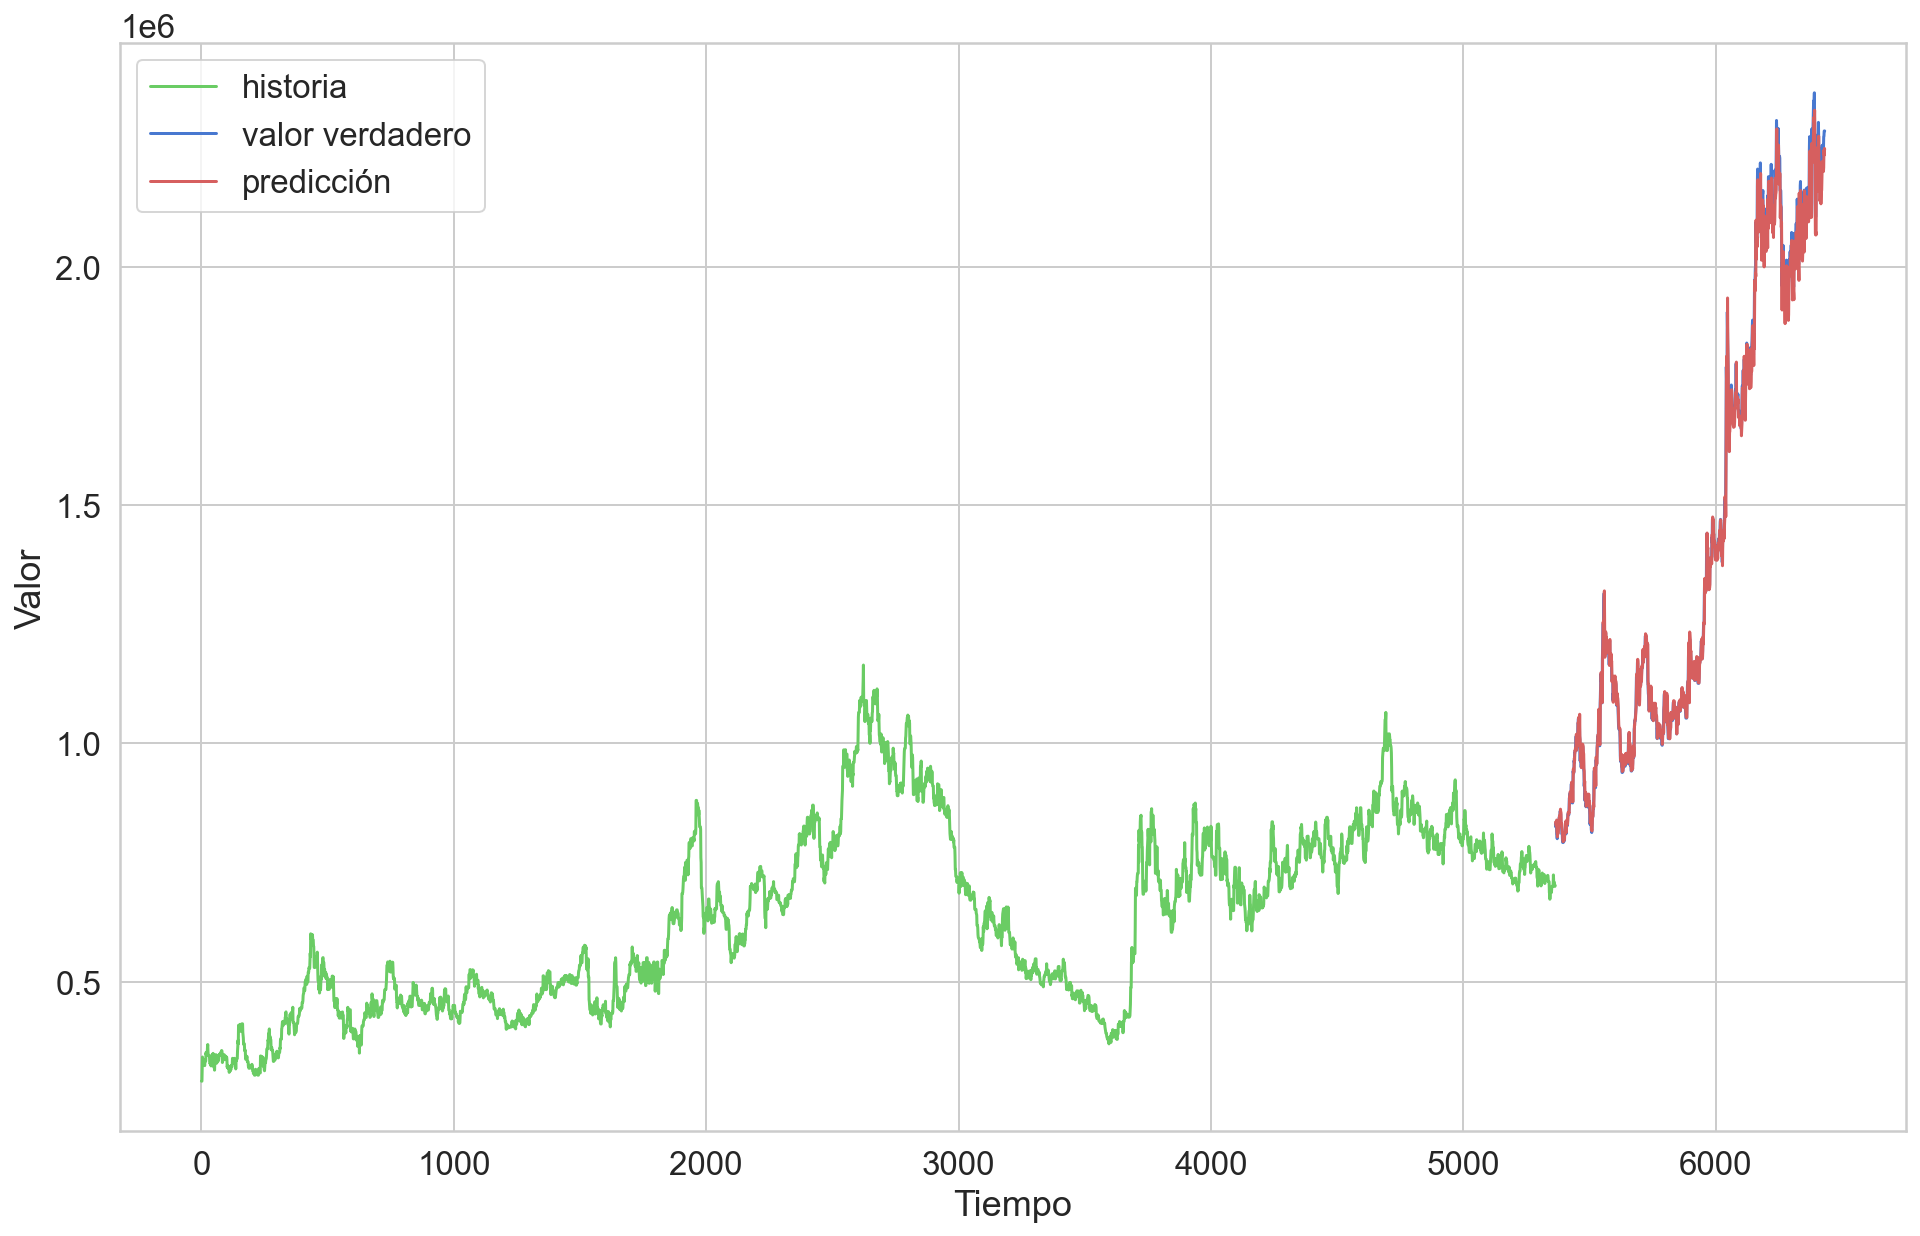

In [ ]:
plt.plot(np.arange(0, len(y_train1)), y_train1, 'g', label="historia")
plt.plot(np.arange(len(y_train1), len(y_train1) + len(y_test1)), y_test1, label="valor verdadero")
plt.plot(np.arange(len(y_train1), len(y_train1) + len(y_test1)), y_pred_LSTM1, 'r', label="predicción")
plt.ylabel('Valor')
plt.xlabel('Tiempo')
plt.legend()
plt.show();

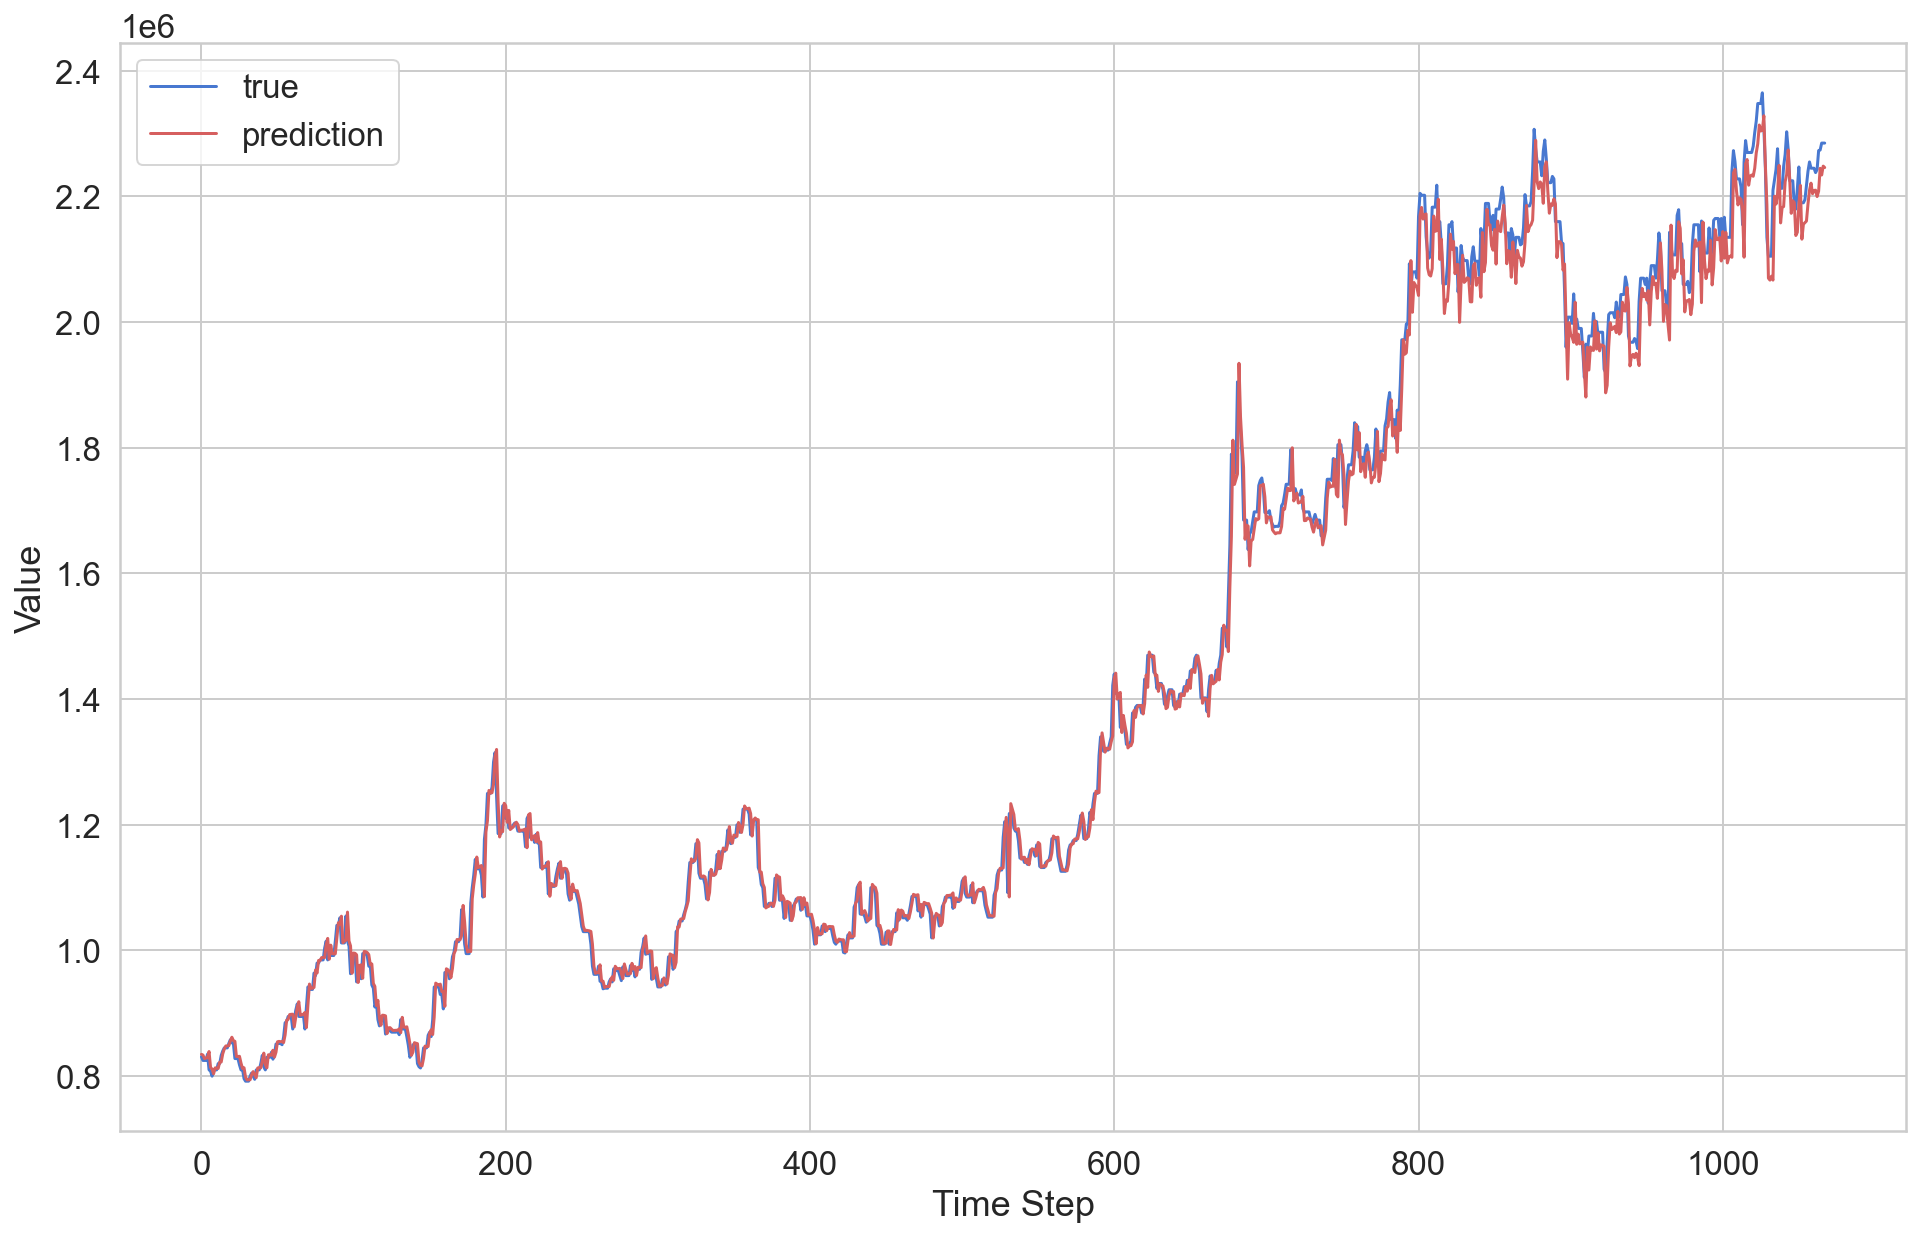

In [ ]:
plt.plot(y_test1, label="true")
plt.plot(y_pred_LSTM1, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

In [ ]:
import sklearn
error_LSTM = sklearn.metrics.mean_squared_error(y_test1, y_pred_LSTM1)
print(error_LSTM)

947173532.8444597


## - Modelo ARIMA

In [ ]:
from statsmodels.tsa.api import STLForecast
from pandas.plotting import scatter_matrix
import statsmodels.api as smapi
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import month_plot,quarter_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import math

In [ ]:
box_Precio.head(5)

box
Fecha               
2003-01-02  2.903241
2003-01-03  2.903438
2003-01-04  2.903438
2003-01-05  2.903438
2003-01-06  2.903469

In [ ]:
dataset=box_Precio
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset.iloc[0:train_size], dataset.iloc[train_size:len(dataset)]
len_train = len(train)
len_test = len(test)
print(len_train, len_test)

5730 1433


### Prueba de Dickey Fuller

In [ ]:
resultadoadf=adfuller(train,regression="nc",autolag=None, maxlag=1)
print('ADF Statistic: %f' % resultadoadf[0])
print('P-value: %f' % resultadoadf[1])
for key, value in resultadoadf[4].items():
    print('\t%s: %.3f' % (key, value))

#adfstat, pvalue, critvalues, resstore=adfuller(dataset,regression="nc",maxlag=1,autolag=None,store=True,regresults=True)####maxlag es importante
#resstore.resols.summary()

ADF Statistic: 0.755894
P-value: 0.877216
	1%: -2.566
	5%: -1.941
	10%: -1.617


C:\Users\SEBASTIAN\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:821: FutureWarning:

trend 'nc' has been renamed to 'n' after 0.14 is released. Use 'n' now to avoid this warning.



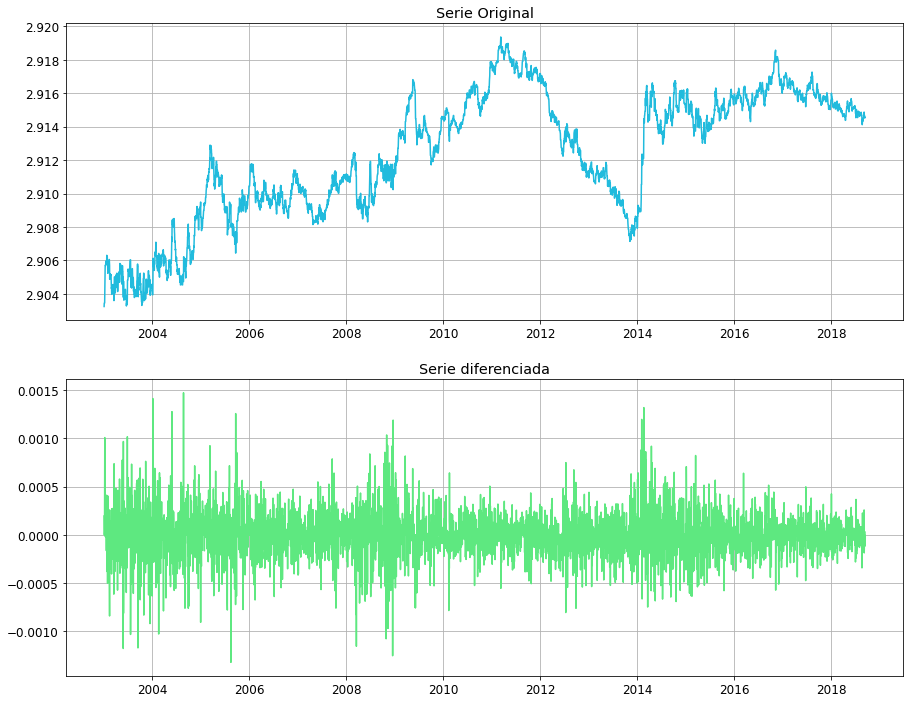

In [ ]:
dif_train=train.diff(periods=1)
dif_train=dif_train[1:]

#InteractiveShell.ast_node_interactivity = "last"
plt.rc('font', size=12)
fig, axes = plt.subplots(2,1,figsize=(15,12)) 
axes[0].plot(train, color='#21BBDD', label='Temperatura promedio')
axes[0].title.set_text('Serie Original')
axes[0].grid(True)
axes[1].plot(dif_train, color='#5EE880')
axes[1].title.set_text('Serie diferenciada')
axes[1].grid(True)
plt.show()

In [ ]:
resultadoadf=adfuller(dif_train,regression="nc",autolag=None, maxlag=1)
print('ADF Statistic: %f' % resultadoadf[0])
print('P-value: %f' % resultadoadf[1])
for key, value in resultadoadf[4].items():
    print('\t%s: %.3f' % (key, value))

#adfstat, pvalue, critvalues, resstore=adfuller(dataset,regression="nc",maxlag=1,autolag=None,store=True,regresults=True)####maxlag es importante
#resstore.resols.summary()

ADF Statistic: -54.124070
P-value: 0.000000
	1%: -2.566
	5%: -1.941
	10%: -1.617


C:\Users\SEBASTIAN\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:821: FutureWarning:

trend 'nc' has been renamed to 'n' after 0.14 is released. Use 'n' now to avoid this warning.



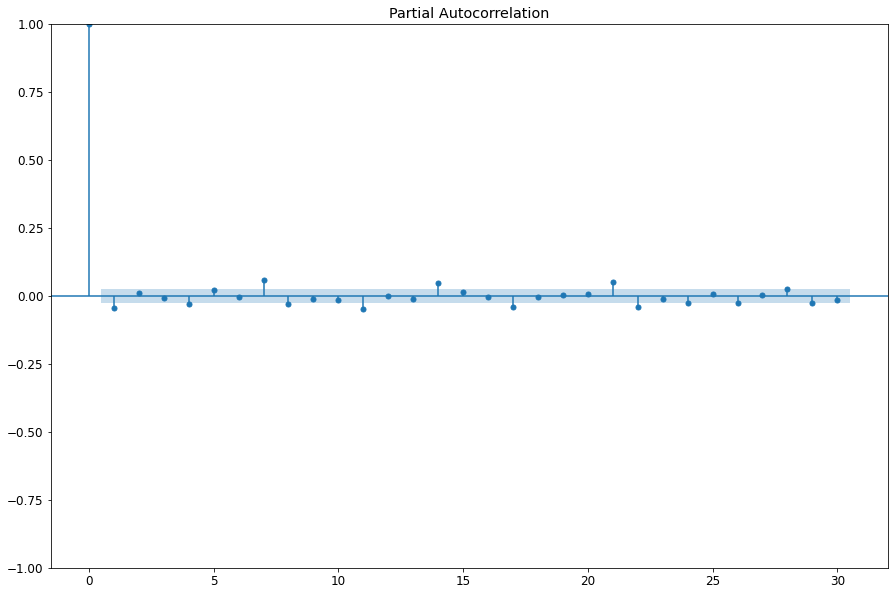

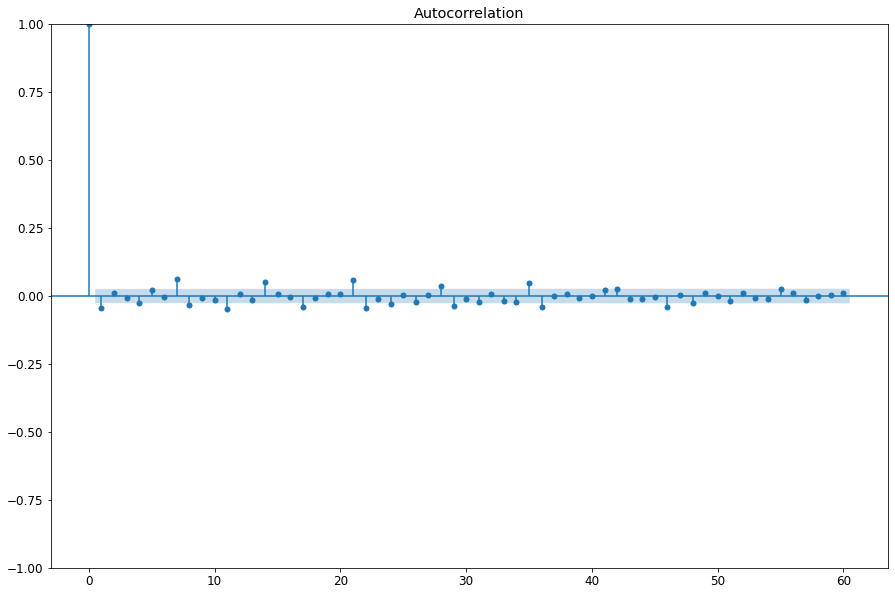

In [ ]:
graph1=plot_pacf(dif_train,lags=30,method='ldbiased')###Note que parece un AR(2) pero con un valor grande de phi_1
graph2=plot_acf(dif_train,lags=60,adjusted=False)

In [ ]:
import statsmodels.api as smapi
modelofinal = smapi.tsa.statespace.SARIMAX(train, trend='n', order=(2,1,2))  
results_final = modelofinal.fit()###Dentro de los parentesis use_boxcox=False
print(results_final.summary())

C:\Users\SEBASTIAN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\SEBASTIAN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\SEBASTIAN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                               SARIMAX Results                                
Dep. Variable:                    box   No. Observations:                 5730
Model:               SARIMAX(2, 1, 2)   Log Likelihood               40612.778
Date:                Tue, 29 Nov 2022   AIC                         -81215.556
Time:                        02:18:59   BIC                         -81182.290
Sample:                             0   HQIC                        -81203.977
                               - 5730                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5757      0.005   -124.697      0.000      -0.585      -0.567
ar.L2         -0.1063      0.006    -18.178      0.000      -0.118      -0.095
ma.L1          0.5307      0.005    111.287      0.0

### Análisis de Residuales

In [ ]:
print(results_final.test_heteroskedasticity(method='breakvar')) #[Est. de prueba, p-valor]
print(results_final.test_normality(method='jarquebera'))

[[6.00533977e-01 1.53294386e-28]]
[[1.03656371e+04 0.00000000e+00 1.73220811e-01 9.58056514e+00]]


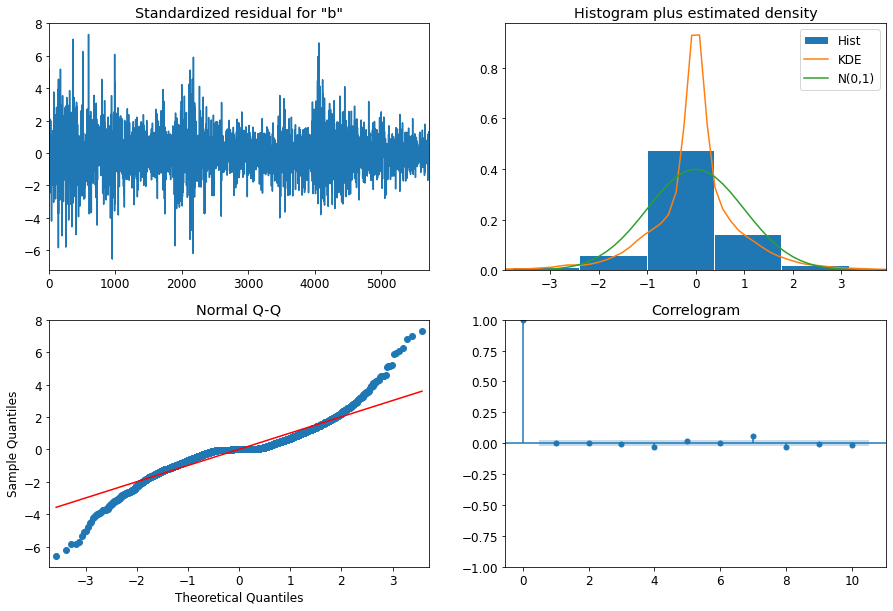

In [ ]:
#####Análisis de Residuales######
residuales=results_final.resid####Residuales no estandarizados

graf_resid=results_final.plot_diagnostics()
#plt.show()
## Hipótesis nula de no heterocedasticidad
#results_final.test_heteroskedasticity(method='breakvar') #[Est. de prueba, p-valor]
## Hipótesis nula de normalidad
#results_final.test_normality(method='jarquebera')
#1. Estadística de prueba
#2. El p valor
#3. Sesgo estimado de los datos
#4. Curtosis estimada
## Hipótesis nula indica que no se presenta correlación serial

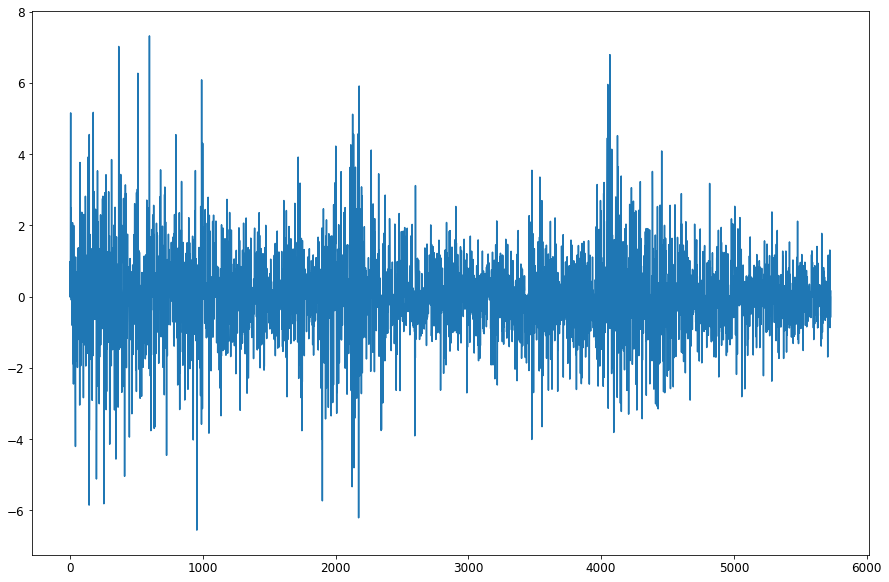

In [ ]:
Res_estand=results_final.standardized_forecasts_error.reshape(5730)
plt.plot(Res_estand)

Text(0.5, 1.0, 'Estadística Cusum')

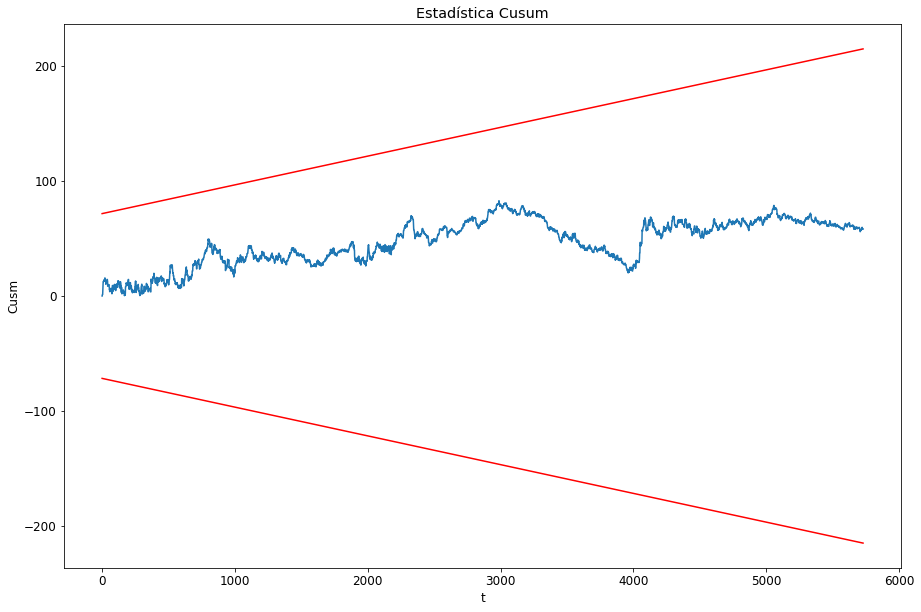

In [ ]:
cum=Res_estand.cumsum()
N=len(Res_estand)
N
Af_cusum=0.948###Cuantil estadística cusum
LS=Af_cusum*math.sqrt(N)+2*Af_cusum*np.arange(1,N+1)/math.sqrt(N)
LI=-LS
plt.plot(cum)
plt.plot(LS,color='red')
plt.plot(LI,color='red')
plt.xlabel("t")
plt.ylabel("Cusm")
plt.title('Estadística Cusum')

Text(0.5, 1.0, 'Estadística Cusumsq')

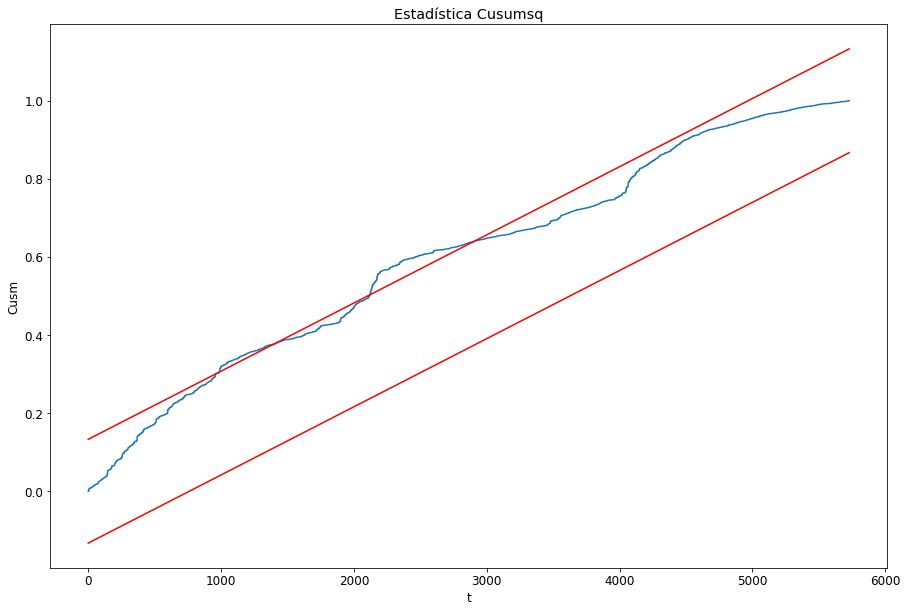

In [ ]:
cumq=(Res_estand**2).cumsum()/sum(Res_estand**2)
co=0.13291####Valor del cuantil aproximado para cusumsq para n/2
LQS=co+np.arange(1,N+1)/N
LQI=-co+np.arange(1,N+1)/N
plt.plot(cumq)
plt.plot(LQS,color='red')
plt.plot(LQI,color='red')
plt.xlabel("t")
plt.ylabel("Cusm")
plt.title('Estadística Cusumsq')

In [ ]:

from sklearn.metrics import mean_squared_error

X = box_Precio.values
size = int(len(X) * 0.8)
train, test = X[1:size], X[size:len(X)]
history = [x for x in train]
predicciones = list()
for t in range(len(test)):
	modelo =smapi.tsa.statespace.SARIMAX(history, trend='n', order=(2,1,2))
	modelo_fit = modelo.fit(disp=0)
	output = modelo_fit.forecast()
	yhat = output[0]
	predicciones.append(yhat)
	obs = test[t]
	history.append(obs)
	#print('Predicción=%f, Esperado=%f' % (yhat, obs))
error_SARIMA = mean_squared_error(test, predicciones)
print(error_SARIMA)

C:\Users\SEBASTIAN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\SEBASTIAN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\SEBASTIAN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\SEBASTIAN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\SEBASTIAN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\SEBASTIAN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge.

2.0758877174811237e-08


In [ ]:
train1=sp.special.inv_boxcox(np.array(train[0:]),-0.33955500197719346)
test1=sp.special.inv_boxcox(np.array(test[0:]),-0.33955500197719346)
predicciones1=sp.special.inv_boxcox(np.array(predicciones[0:]),-0.33955500197719346)

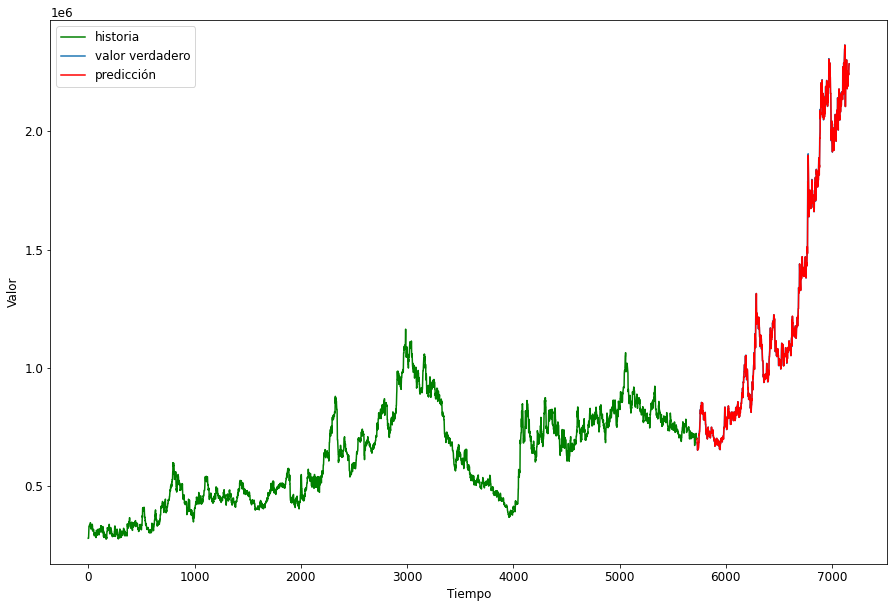

In [ ]:
plt.plot(np.arange(0, len(train1)), train1, 'g', label="historia")
plt.plot(np.arange(len(train1), len(train1) + len(test1)), test1, label="valor verdadero")
plt.plot(np.arange(len(train1), len(train1) + len(test1)), predicciones1, 'r', label="predicción")
plt.ylabel('Valor')
plt.xlabel('Tiempo')
plt.legend()
plt.show();

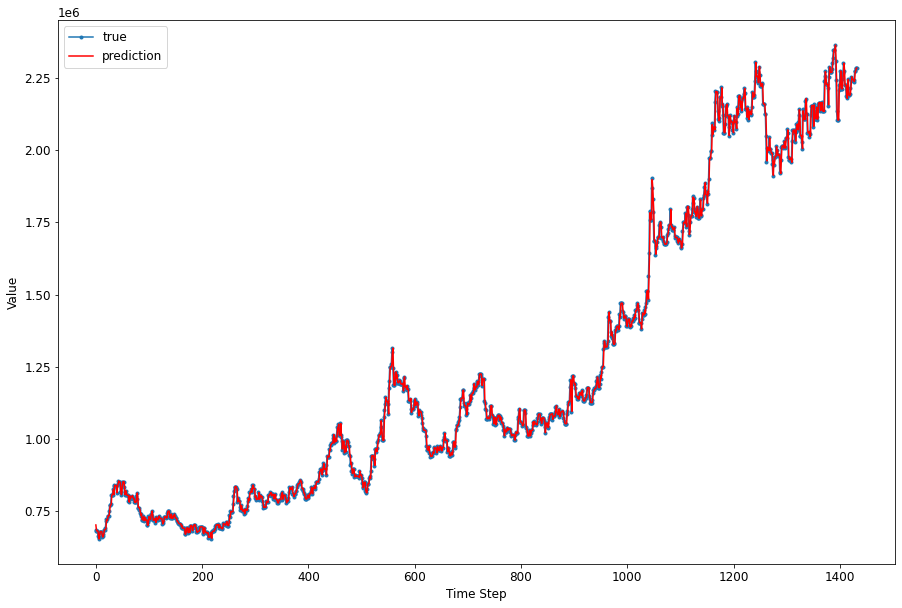

In [ ]:
plt.plot(test1, marker='.', label="true")
plt.plot(predicciones1, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

In [ ]:
from sklearn.metrics import mean_squared_error
error_SARIMA = sklearn.metrics.mean_squared_error(test1,predicciones1)
print(error_SARIMA)

515635409.98130554


# 5. Error cuadratico

### ECM de predicción de suavizamiento exponencial

In [ ]:
#Error cuadratico medio escala original
import statistics as stats
stats.mean((test - predicciones)**2)
524669305.79626775**.5

22905.660998894306

### ECM de predicción de árboles de decisión 

In [ ]:
stats.mean((Precio_trend_bxi[5690:] - Prediccion_trend_bxi[5690:])**2)
773338630.9234362**.5

27808.96673599068

### ECM redes MLP

In [ ]:
error_MLP = sklearn.metrics.mean_squared_error(y_test, ypred)
#print(error_MLP)
720702259.8692249**.5

26845.89838074384

### ECM de redes LSTM

In [ ]:
error_LSTM = sklearn.metrics.mean_squared_error(y_test1, y_pred_LSTM1)
print(error_LSTM)
1608644342.315861**.5

40107.90872528585

### ECM de ARIMA

In [ ]:
from sklearn.metrics import mean_squared_error
error_SARIMA = sklearn.metrics.mean_squared_error(test1,predicciones1)
#print(error_SARIMA)
515635409.98130554**.5

22707.606874818524

# 6. Residuales 

### Suavizamiento exponencial

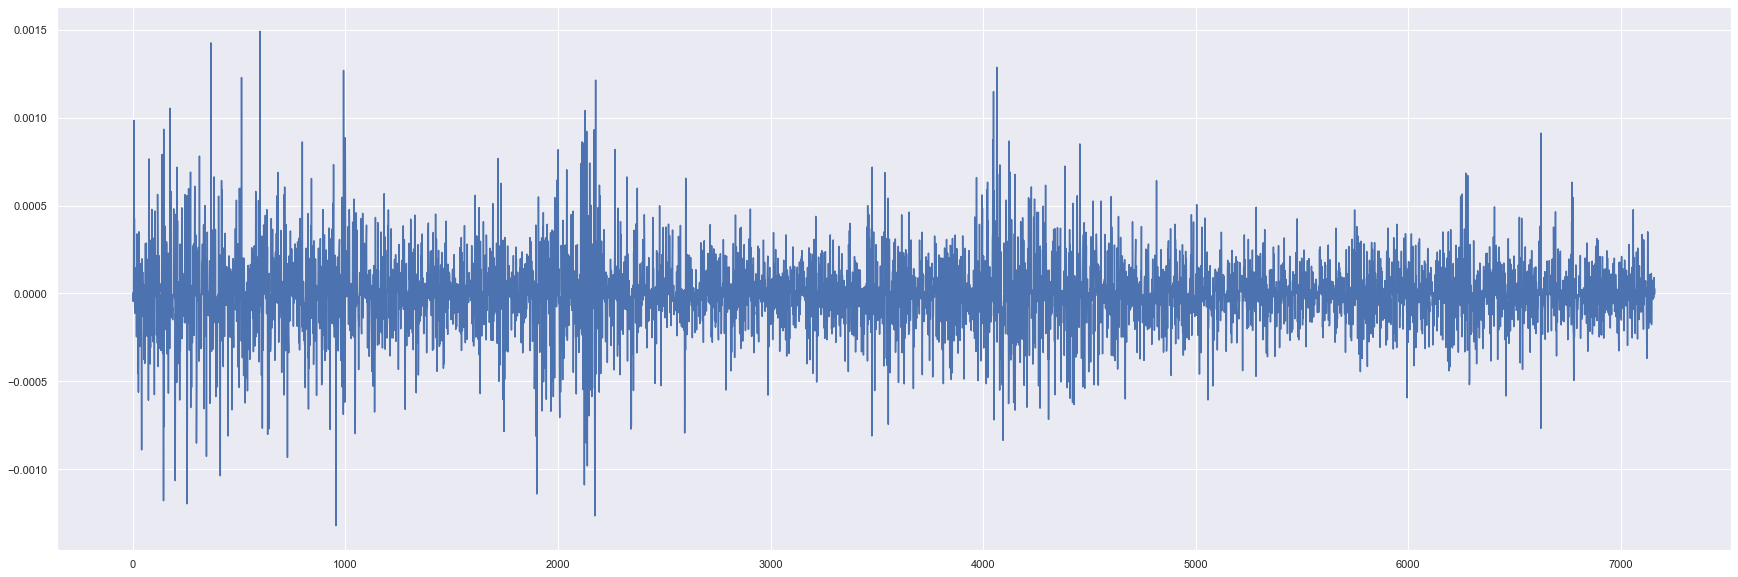

In [ ]:
plt.plot(modelo.resid)

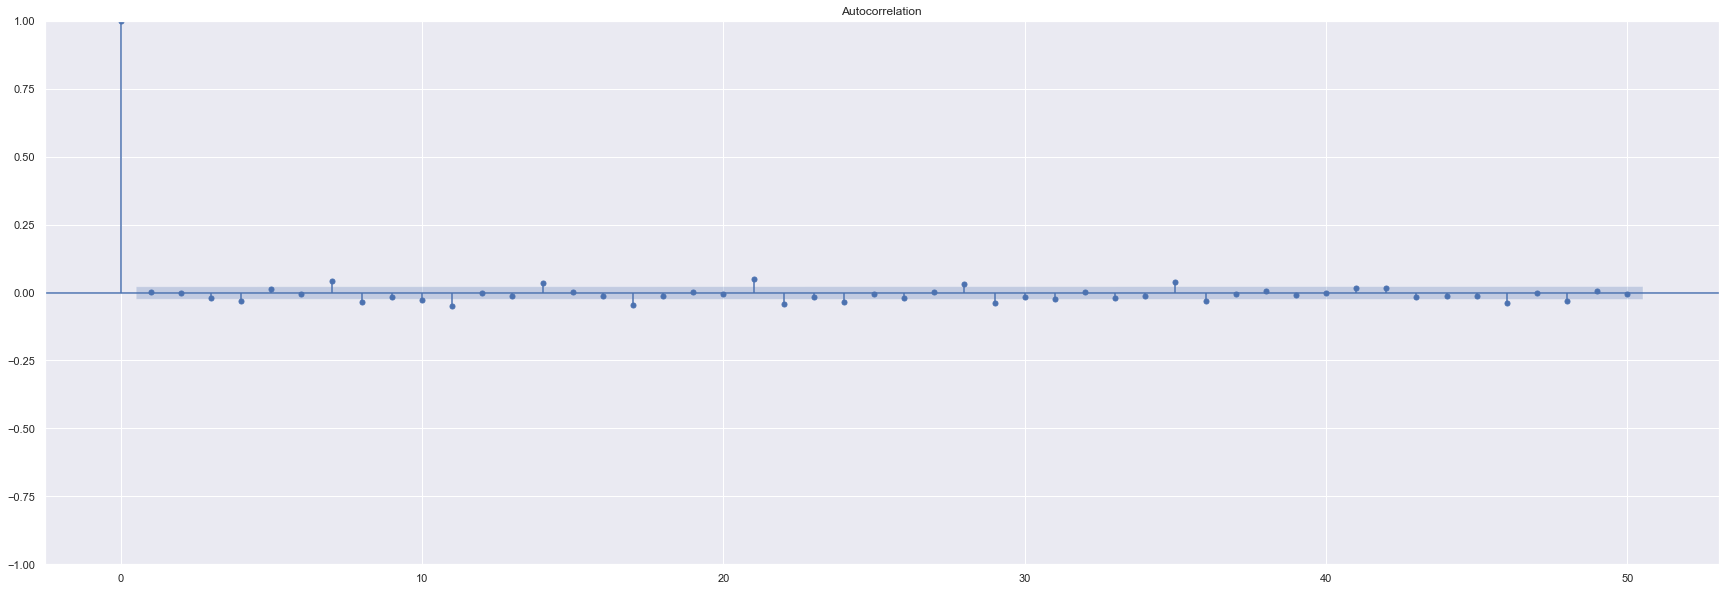

In [ ]:
acfres=plot_acf(modelo.resid, adjusted=False, lags=50)

### Arboles 

In [ ]:
len(Precio_trend_bxi[5650:])

1413

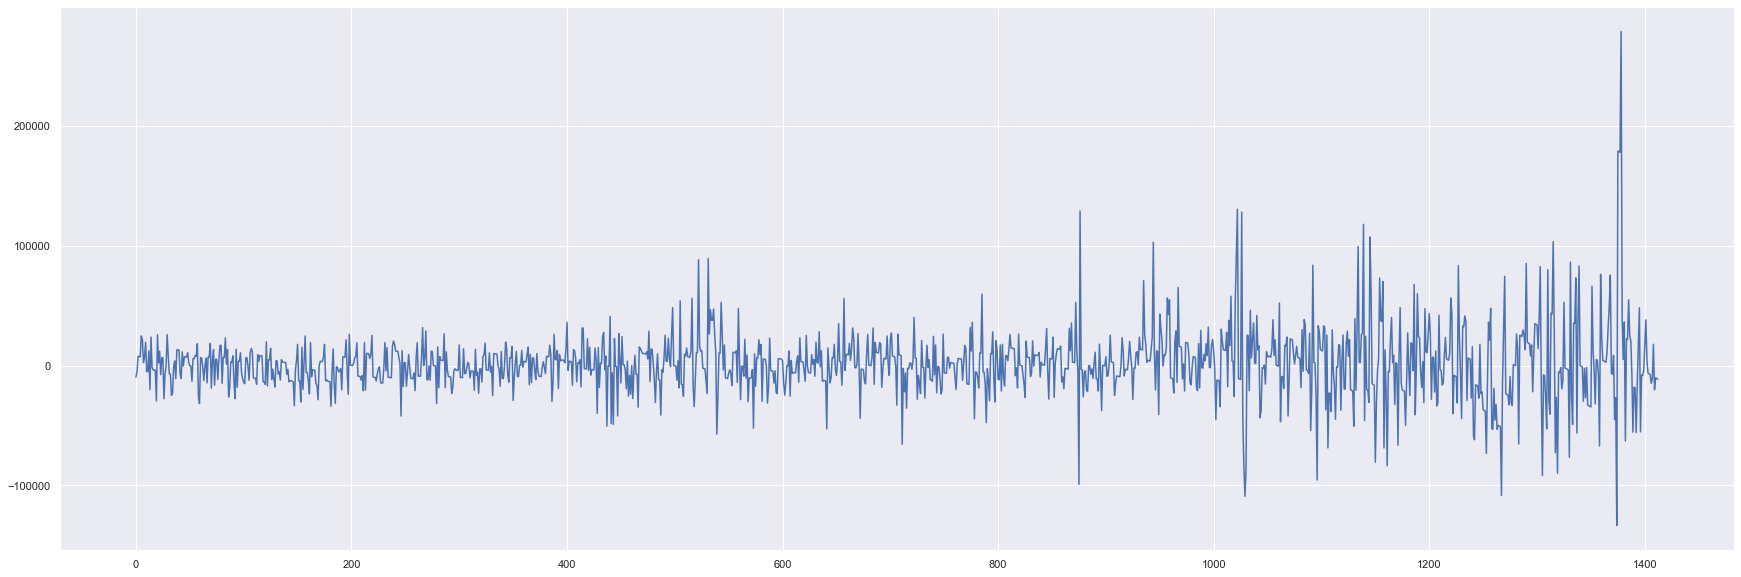

In [ ]:
#Precio_trend_bxi, Prediccion_trend_bxi
ResiArbol=(Precio_trend_bxi[5650:] - Prediccion_trend_bxi[5650:])
plt.plot(ResiArbol)

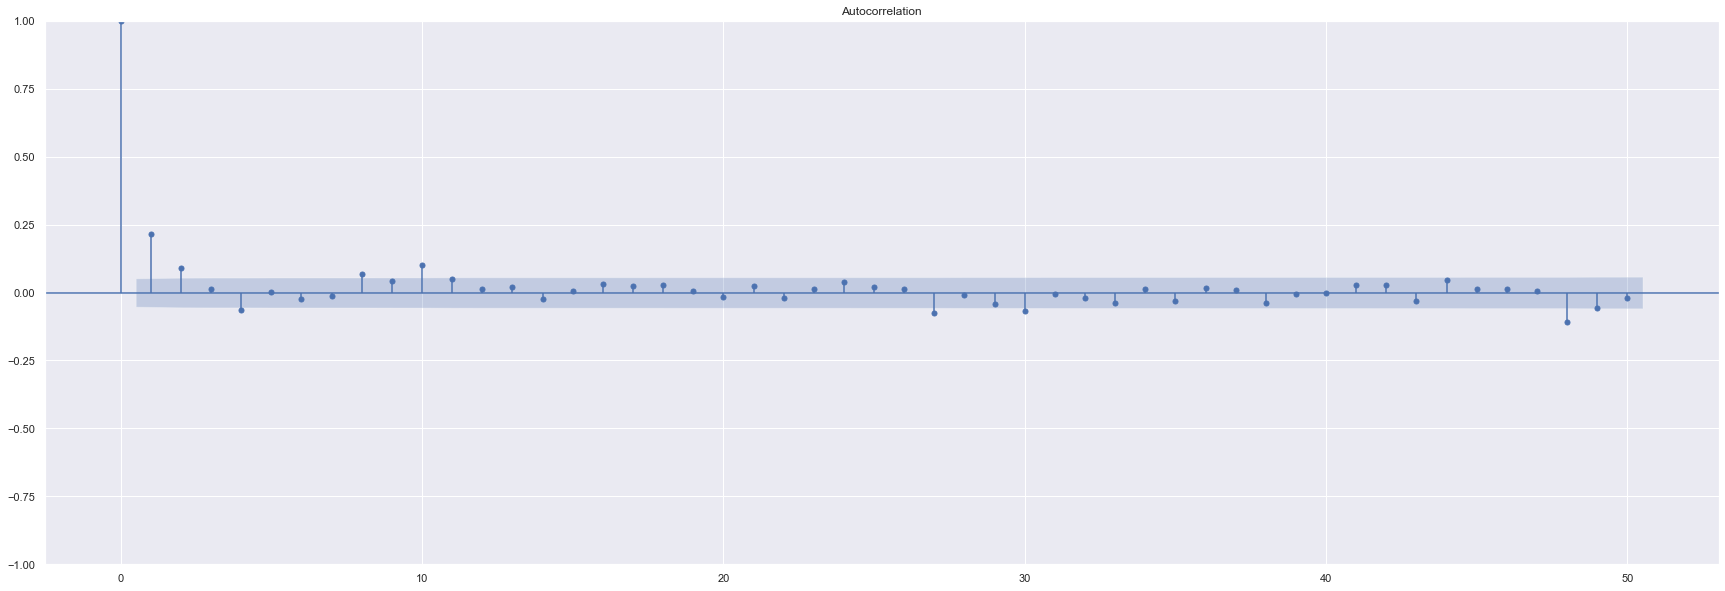

In [ ]:
acfresA=plot_acf(ResiArbol, adjusted=False, lags=50)

### MLP

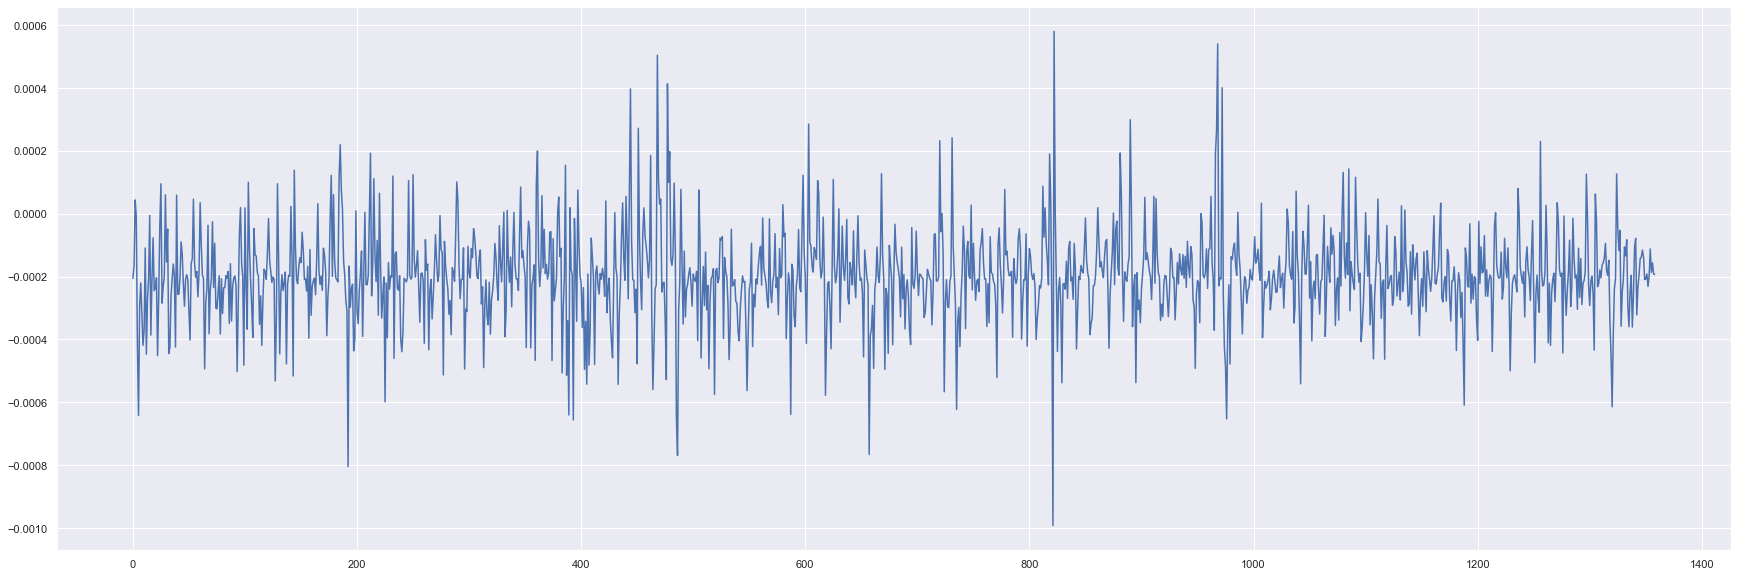

In [ ]:
plt.plot(RMLP)

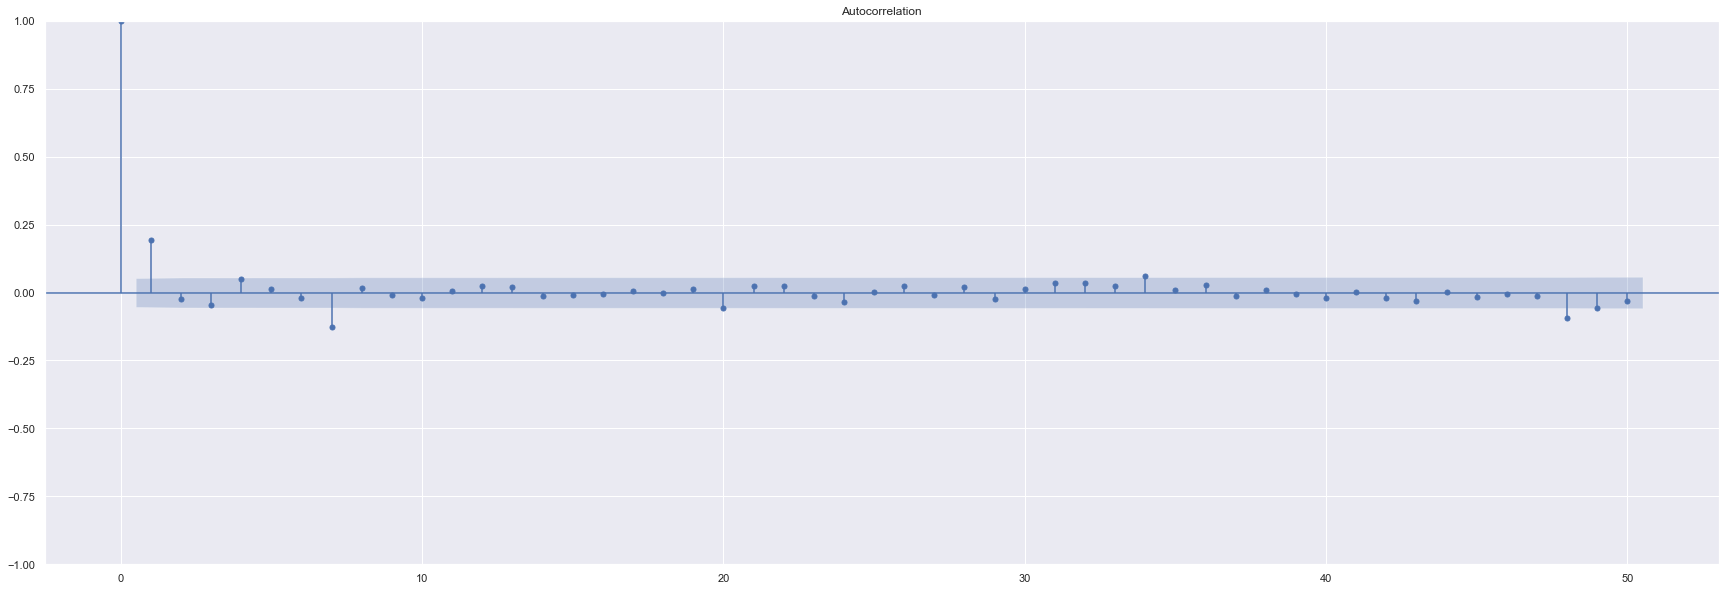

In [ ]:
acfresA=plot_acf(RMLP, adjusted=False, lags=50)

### Redes LSTM

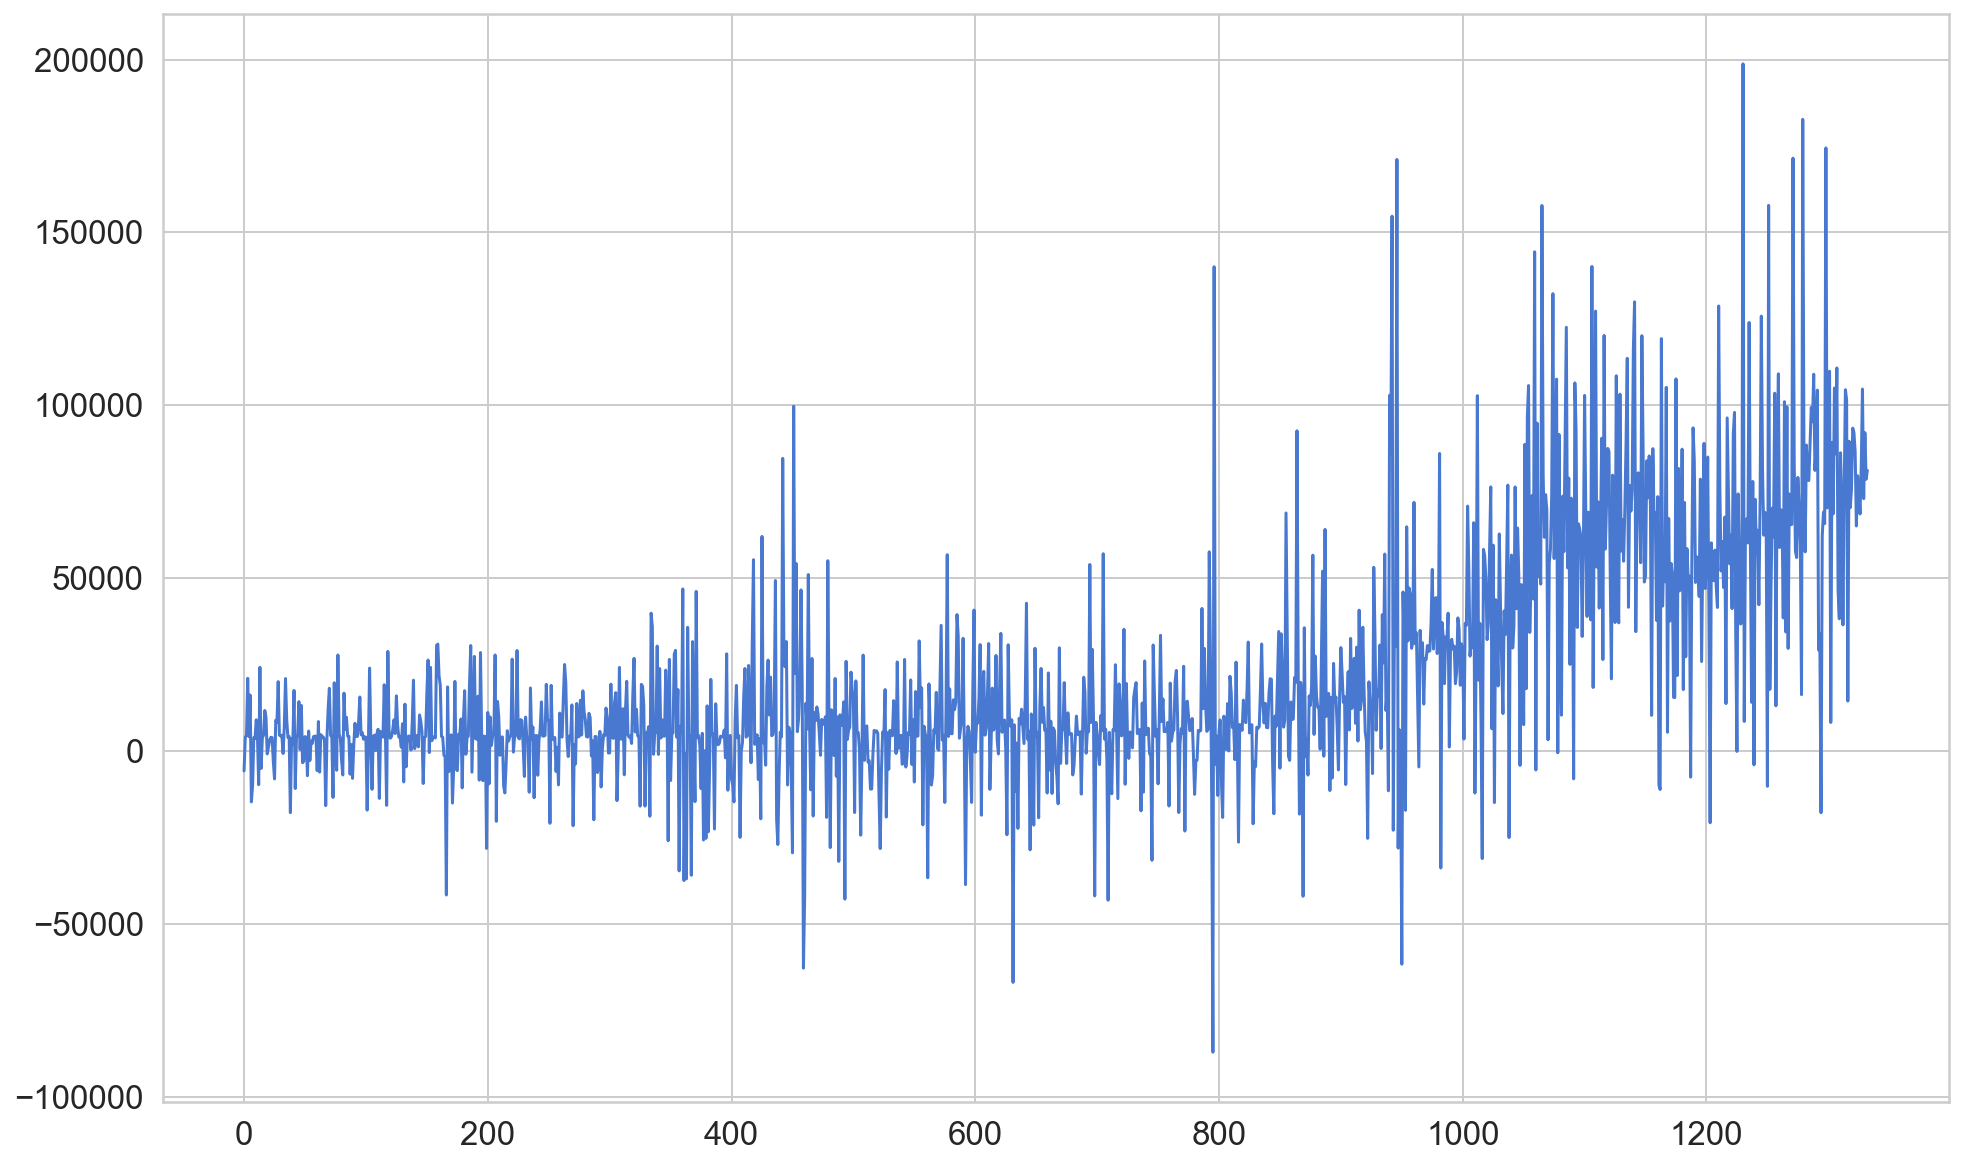

In [ ]:
RLSTM=y_test1-y_pred_LSTM1
plt.plot(RLSTM)

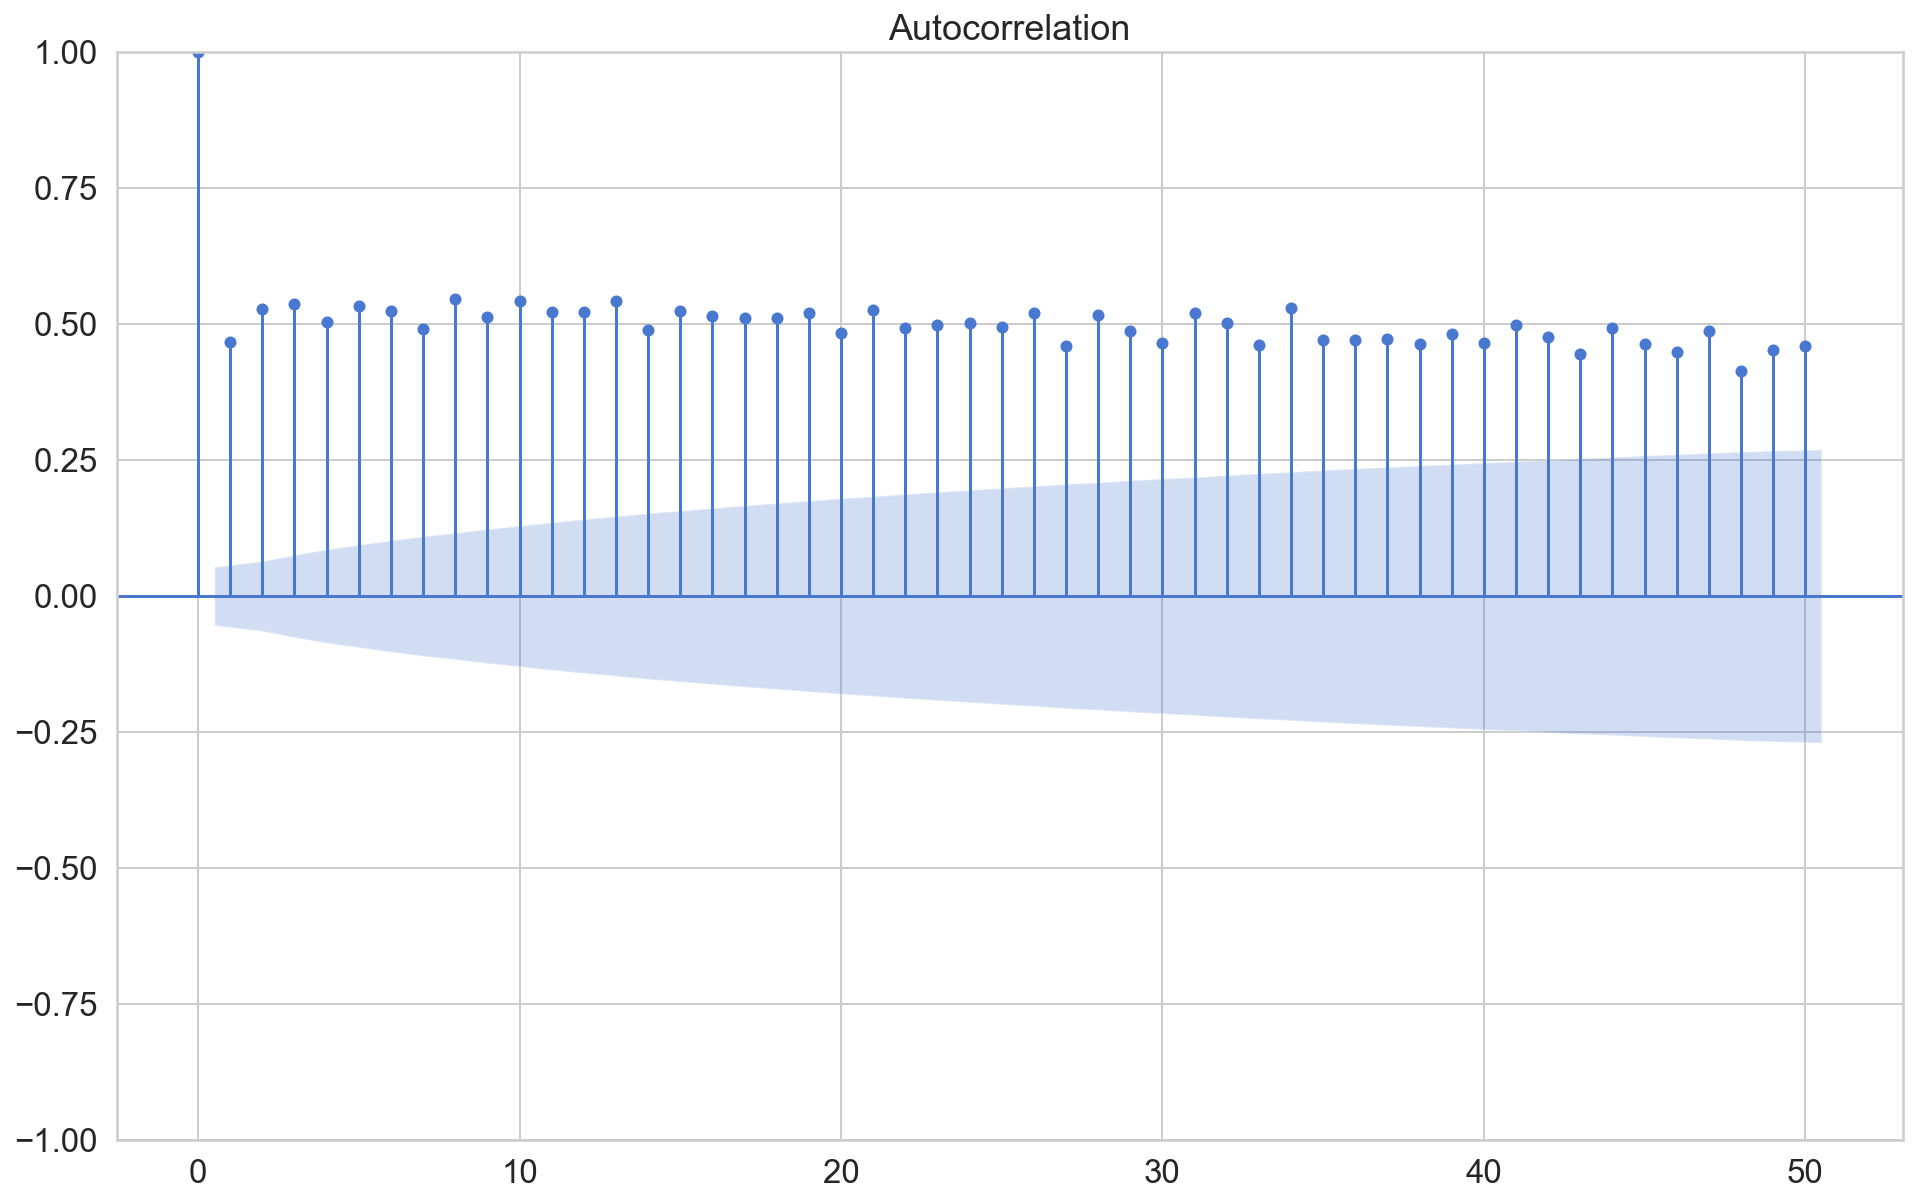

In [ ]:
acflstm=plot_acf(RLSTM, adjusted=False, lags=50)

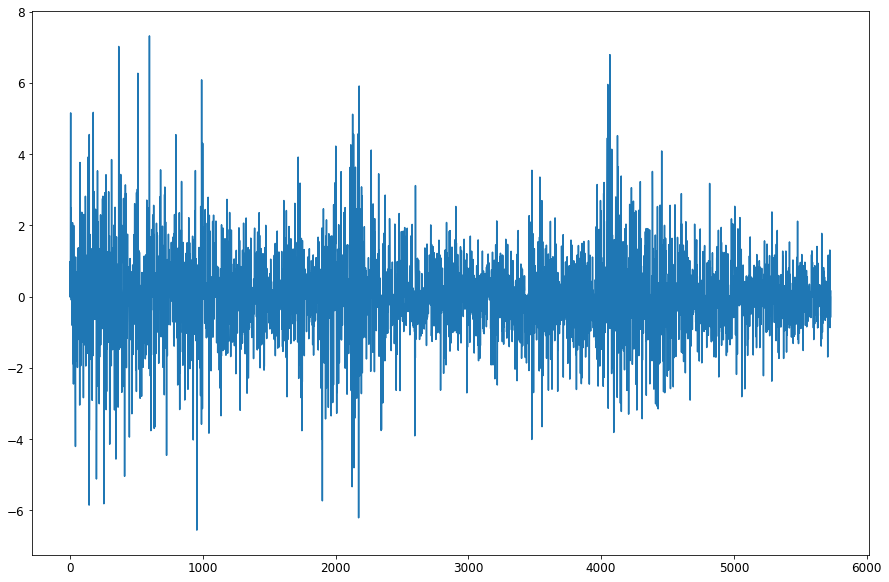

In [ ]:
Res_estand=results_final.standardized_forecasts_error.reshape(5730)
plt.plot(Res_estand)

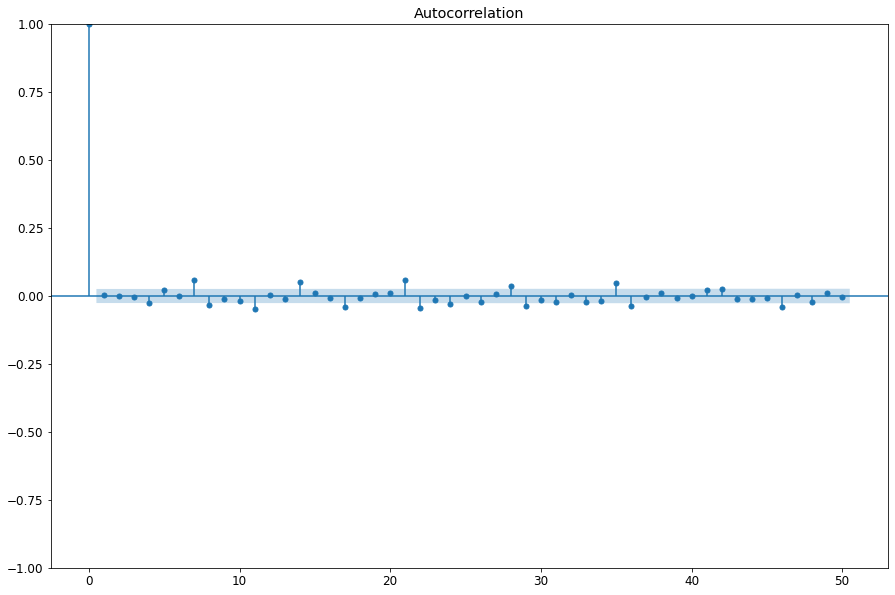

In [ ]:
plot_acf(Res_estand, adjusted=False, lags=50);

# 7. Modelo ARCH

In [ ]:
import arch

In [ ]:
Precio.head(5)

Precio
Fecha             
2003-01-02  277000
2003-01-03  280875
2003-01-04  280875
2003-01-05  280875
2003-01-06  281500

### Retornos logarítmicos  

In [ ]:
Retornos= Precio.pct_change()
Retornos=Retornos[1:]
print(Retornos)
#Retornos=np.log(Precio/Precio.shift(1))
#print(Retornos)

              Precio
Fecha               
2003-01-03  0.013989
2003-01-04  0.000000
2003-01-05  0.000000
2003-01-06  0.002225
2003-01-07  0.047513
...              ...
2022-08-17  0.013375
2022-08-18  0.000440
2022-08-19  0.004837
2022-08-20  0.000000
2022-08-21  0.000000

[7162 rows x 1 columns]


In [ ]:
dataset=Retornos
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset.iloc[0:train_size], dataset.iloc[train_size:len(dataset)]
len_train = len(train)
len_test = len(test)
print(len_train, len_test)

5729 1433


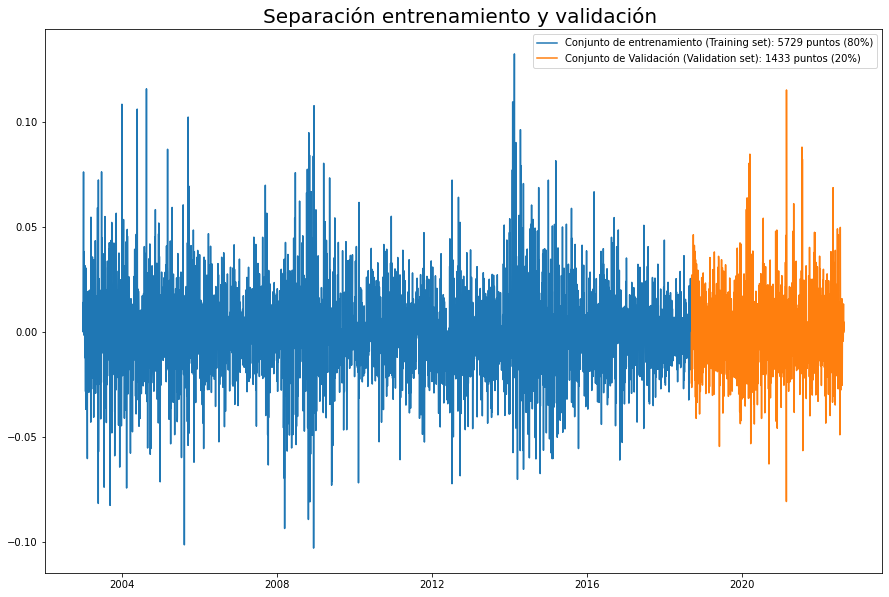

In [ ]:
plt.plot(train, label='Conjunto de entrenamiento (Training set): ' + str(len_train) +' puntos (80%)')
plt.plot(test, label='Conjunto de Validación (Validation set): '  + str(len_test) + ' puntos (20%)') 
plt.title("Separación entrenamiento y validación ", size = 20)
plt.legend()
plt.show()

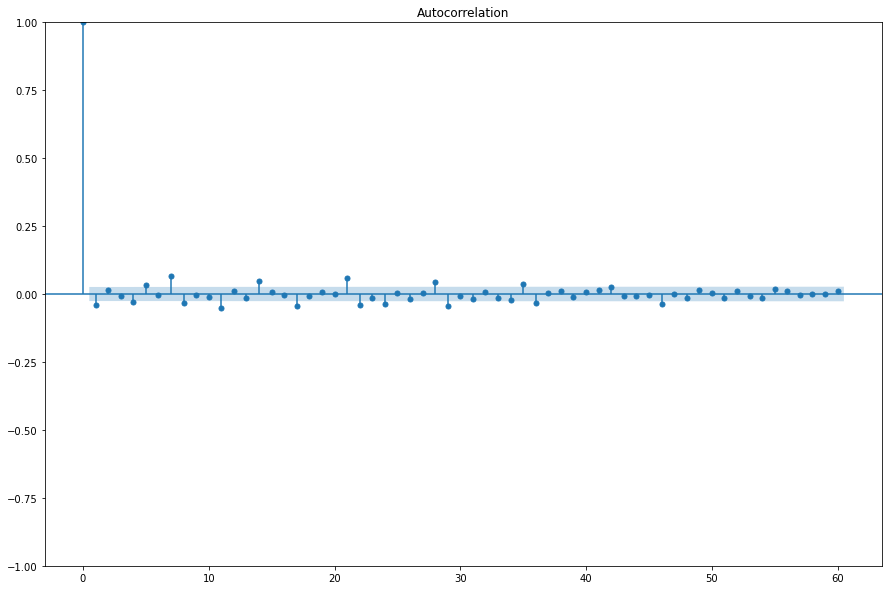

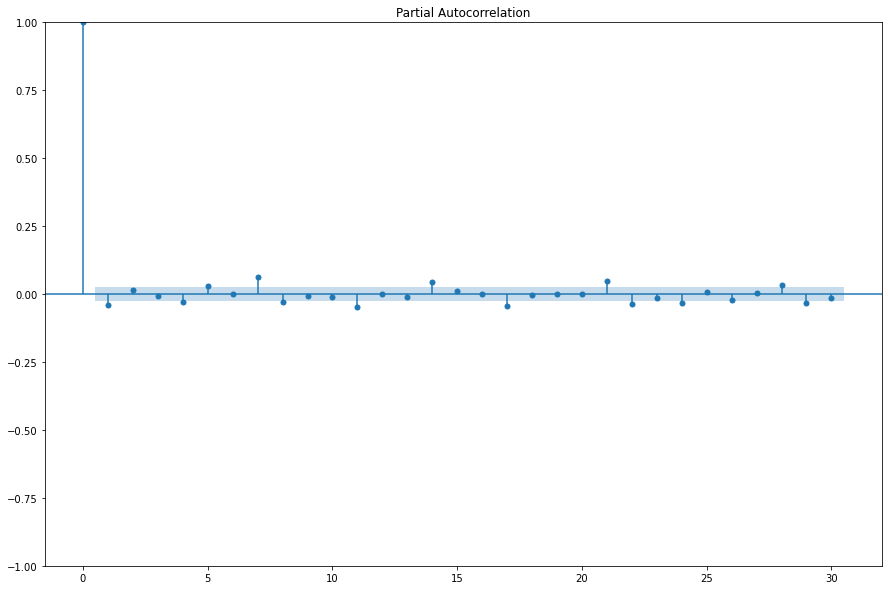

In [ ]:
graph1=plot_acf(train,lags=60,adjusted=False)
graph2=plot_pacf(train,lags=30,method='ldbiased')

In [ ]:
train_2=train**2

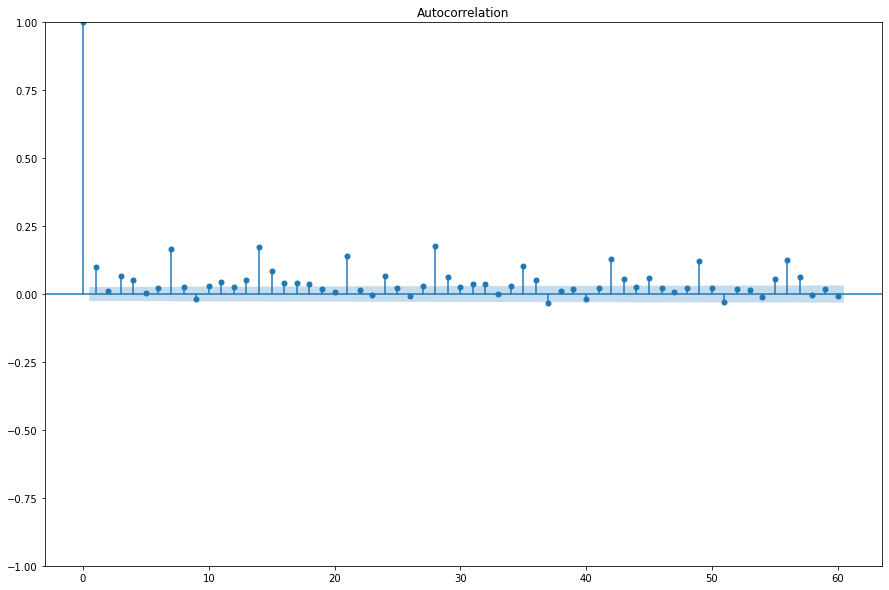

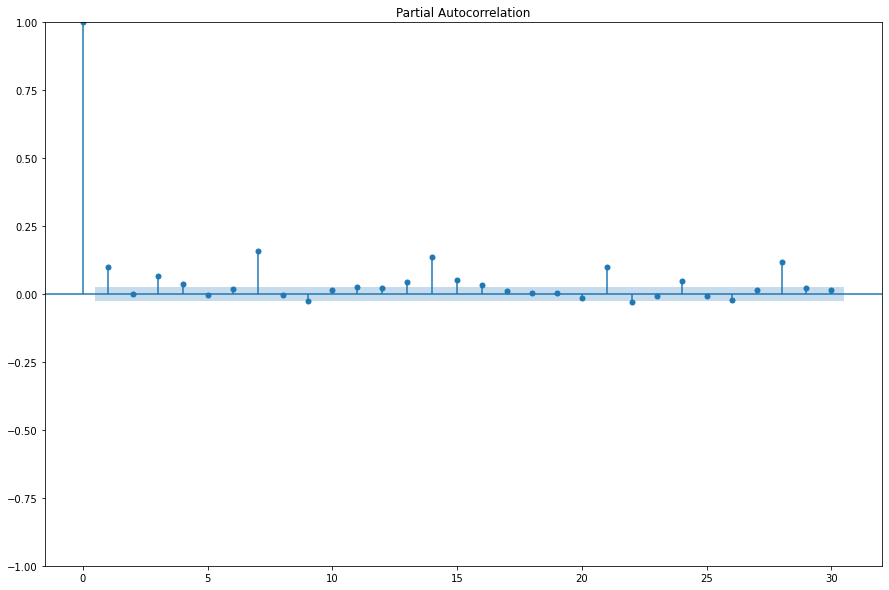

In [ ]:
graph1=plot_acf(train_2,lags=60,adjusted=False)
graph2=plot_pacf(train_2,lags=30,method='ldbiased')

In [ ]:
sm.stats.acorr_ljungbox(train_2, lags=[10,15,20,25], return_df=True)
#la estadistica de Box-Ljung basada en 20 retardos es significativa, 
#luego si hay presencia de autocorrelacion

lb_stat      lb_pvalue
10  271.241219   1.831101e-52
15  510.234131   3.862812e-99
20  538.970673  1.966769e-101
25  683.480940  3.982037e-128

In [ ]:
modeloarima=smapi.tsa.SARIMAX(train, trend='n', order=(4,0,4))
ajustearima=modeloarima.fit()
#print('ARIMA(4,0,4)')
print(ajustearima.summary())

C:\Users\SEBASTIAN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\SEBASTIAN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\SEBASTIAN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                 Precio   No. Observations:                 5729
Model:               SARIMAX(4, 0, 4)   Log Likelihood               14990.975
Date:                Tue, 29 Nov 2022   AIC                         -29963.950
Time:                        15:18:02   BIC                         -29904.071
Sample:                             0   HQIC                        -29943.107
                               - 5729                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4407      0.050     -8.729      0.000      -0.540      -0.342
ar.L2          0.1740      0.054      3.244      0.001       0.069       0.279
ar.L3         -0.5083      0.054     -9.437      0.0

In [ ]:
residuales=ajustearima.resid
residuales_2=residuales**2

sm.stats.acorr_ljungbox(residuales_2, lags=[10,15,20,25,30], return_df=True)
#la estadistica de Box-Ljung basada en diferentes retardos es significativa, 
#luego si hay presencia de autocorrelacion



lb_stat      lb_pvalue
10  205.692545   1.047197e-38
15  397.599139   2.209903e-75
20  419.782752   1.593894e-76
25  525.469673   4.011427e-95
30  706.874606  1.809652e-129

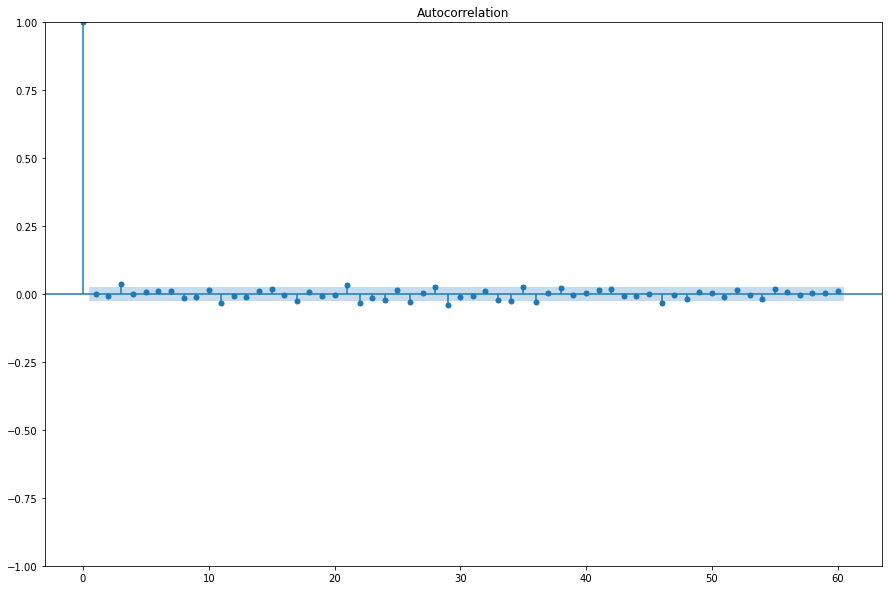

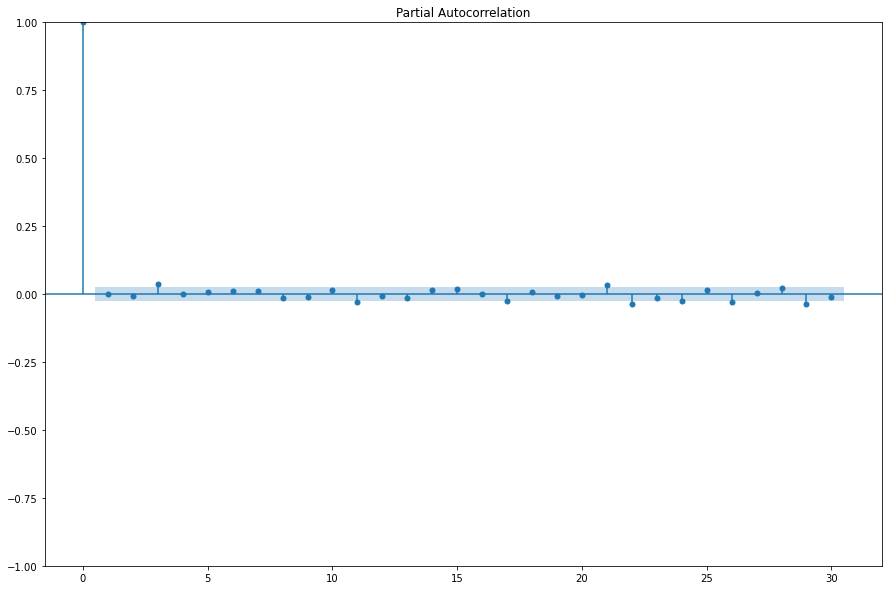

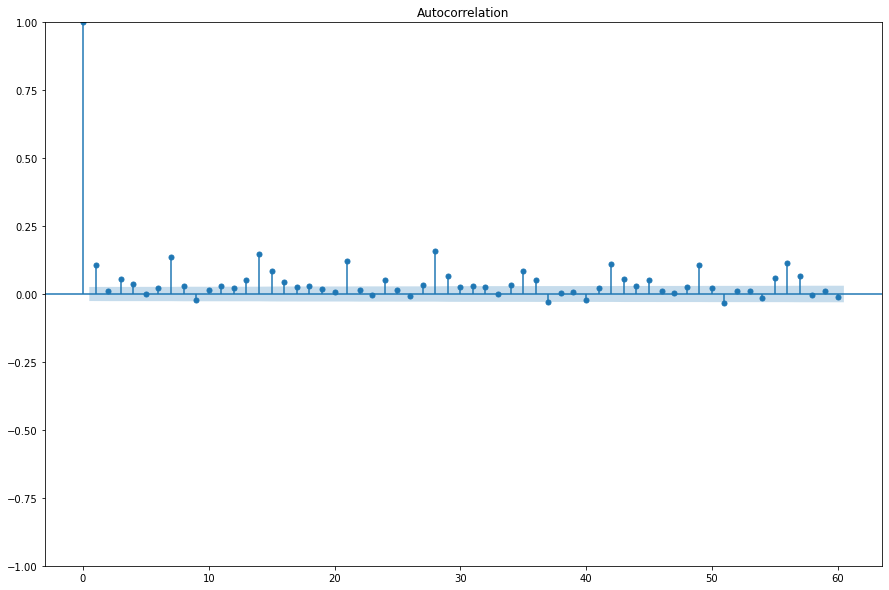

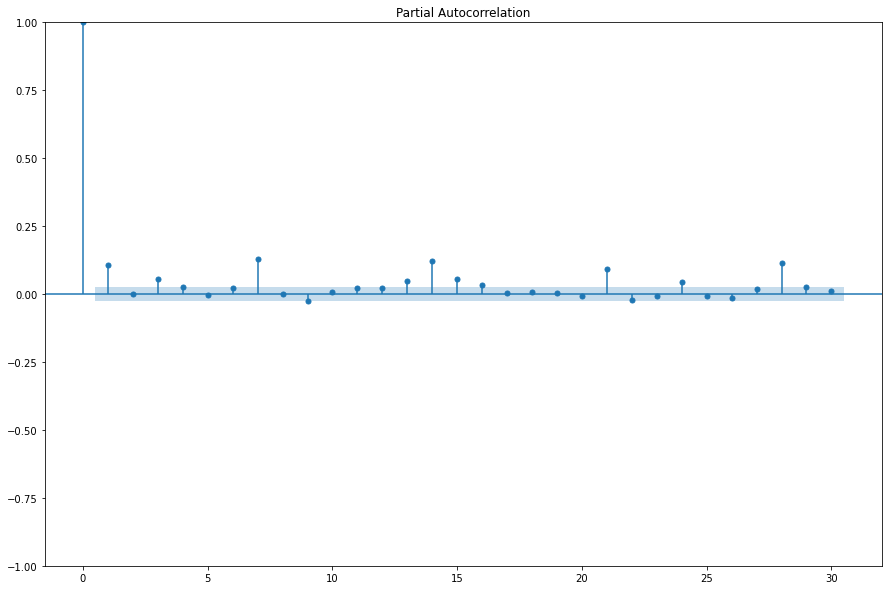

In [ ]:
graph1=plot_acf(residuales,lags=60,adjusted=False)
graph2=plot_pacf(residuales,lags=30,method='ldbiased')

graph1=plot_acf(residuales_2,lags=60,adjusted=False)
graph2=plot_pacf(residuales_2,lags=30,method='ldbiased')

In [ ]:
archmodel = arch.arch_model(train, mean='Constant', vol='ARCH', p=7)
ajustearch = archmodel.fit()
print(ajustearch.summary())

C:\Users\SEBASTIAN\anaconda3\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003161. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:     11,   Neg. LLF: 58482243071.65676
Iteration:      2,   Func. Count:     29,   Neg. LLF: -2131.889580589172
Iteration:      3,   Func. Count:     42,   Neg. LLF: -570.4235407713454
Iteration:      4,   Func. Count:     55,   Neg. LLF: 28445.703352819375
Iteration:      5,   Func. Count:     70,   Neg. LLF: 59276221.65320717
Iteration:      6,   Func. Count:     88,   Neg. LLF: 13398.8481373654
Iteration:      7,   Func. Count:    103,   Neg. LLF: 49022654.42234505
Iteration:      8,   Func. Count:    121,   Neg. LLF: 62.784154364362905
Iteration:      9,   Func. Count:    134,   Neg. LLF: 6379528933.845886
Iteration:     10,   Func. Count:    152,   Neg. LLF: 1416.076106950688
Iteration:     11,   Func. Count:    166,   Neg. LLF: 573146303.4383548
Iteration:     12,   Func. Count:    184,   Neg. LLF: -1154.3794307265766
Iteration:     13,   Func. Count:    198,   Neg. LLF: 141042.81356740452
Iteration:     14,   Func. Count:    213,   Neg. LLF: -151